# Debate Analysis

First debate: 9/29

In [97]:
# These paths should be updated so that no files need to be downloaded...
import os
import sys
shared_path = '/Users/sarah/Downloads/TwitterResearch2020'
sys.path.append(shared_path)
import thinned_tweet_obj
import general_utilities
import matplotlib.pyplot as plt
import numpy as np

import gdrive_quickstart, io
from googleapiclient.http import MediaIoBaseDownload

In [284]:
DRIVE = gdrive_quickstart.authenticate_drive_api()
file_objs_lst = gdrive_quickstart.get_file_objs_list(DRIVE, 'name contains "combined_tweets-2020"')

In [4]:
tweets_0930 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[0], print_status=True)
tweets_0929 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[1], print_status=True)
tweets_0928 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[2], print_status=True)

Download 61%.
Download 100%.
Download 45%.
Download 90%.
Download 100%.
Download 43%.
Download 86%.
Download 100%.


What to look for: 
- Popular hashtags
- Biden / Trump mentions
- Volume of tweets
- Certain keywords? (keyword extraction paired with sentiment analysis?)

In [10]:
from rake_nltk import Rake

r = Rake()

In [15]:
sents = ["my list of sentences", "i like dogs", "i like cats", "i like dogs and cats"]
r.extract_keywords_from_sentences(sents)
r.get_ranked_phrases_with_scores()

[(4.0, 'like dogs'),
 (3.5, 'like cats'),
 (1.5, 'cats'),
 (1.0, 'sentences'),
 (1.0, 'list')]

In [78]:
def extract_hashtags_mentions(obj_lst):
    hashtags = {}
    mentions = {}
    mentions_id_to_name = {}
    
    for thin_obj in obj_lst:
        if hasattr(thin_obj, 'hashtags'):
            for h in thin_obj.hashtags:
                if h in hashtags:
                    hashtags[h] += 1
                else:
                    hashtags[h] = 1
                    
        if hasattr(thin_obj, 'mentions'):           
            for m_obj in thin_obj.mentions:
                if m_obj['id'] in mentions:
                    mentions[m_obj['id']] += 1
                else:
                    mentions[m_obj['id']] = 1
                    mentions_id_to_name[m_obj['id']] = m_obj['screen_name']
                
    return hashtags, mentions, mentions_id_to_name


def sort_based_on_dict_value(freq_users):
    return sorted(freq_users.items(), key = lambda x: x[1], reverse = True)

In [90]:
hashtags_0929, mentions_0929, mentions_id_to_name_0929 = extract_hashtags_mentions(tweets_0929)
sorted_hashtags_0929 = sort_based_on_dict_value(hashtags_0929)
sorted_mentions_0929 = sort_based_on_dict_value(mentions_0929)

In [95]:
[val for h, val in sorted_hashtags_0929[:10]]

[1035, 993, 606, 460, 359, 357, 353, 339, 294, 289]

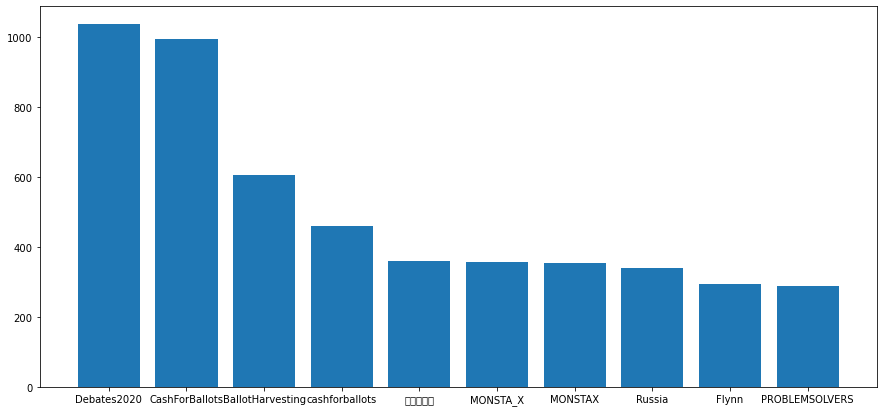

In [101]:
plt.figure(figsize=(15, 7))

n = 10
heights = [val for h, val in sorted_hashtags_0929[:n]]
labels = [h for h, val in sorted_hashtags_0929[:n]]

plt.bar(np.arange(n), heights)
plt.xticks(np.arange(n), labels)
plt.show()


In [108]:
for user_id, count in sorted_mentions_0929:
    print(mentions_id_to_name_0929[user_id], count)

# mentions_id_to_name_0929[1082334352711790593]

realDonaldTrump 18305
TulsiGabbard 7644
JoeBiden 6818
IlhanMN 5334
DonaldJTrumpJr 4403
JamesOKeefeIII 4330
BleacherReport 4189
Ilhan 4029
Jim_Jordan 3830
AOC 3790
SpeakerPelosi 3548
CNN 2770
ProjectLincoln 2521
TuckerCarlson 2256
EricTrump 2249
Project_Veritas 2230
bennyjohnson 2164
RichardGrenell 2061
KamalaHarris 1933
POTUS 1825
GenFlynn 1817
MSNBC 1733
DrBiden 1732
RealJamesWoods 1667
mckaycoppins 1634
CNNPolitics 1605
Yamiche 1559
HillaryClinton 1508
charliekirk11 1501
GOPLeader 1489
nytimes 1422
michellemalkin 1377
SteveDraz 1328
DNI_Ratcliffe 1293
RussianAlxnder 1233
jaketapper 1229
TomFitton 1226
GOP 1206
FoxNews 1178
dbongino 1173
SidneyPowell1 1155
CBS_Herridge 1133
RepMattGaetz 1097
marklevinshow 1075
seanhannity 1070
brianstelter 1057
LindseyGrahamSC 1052
NicolleDWallace 1042
TeamTrump 1037
DouglasEmhoff 1029
SRuhle 1012
Acosta 997
LouDobbs 970
RyanAFournier 952
Movies4Brandon 939
MariaBartiromo 928
gtconway3d 927
CBSNews 919
benshapiro 862
joniernst 840
senatemajldr 835
Rea

Godisbangtan7 85
UP10TION 85
joshgerstein 84
CNNTonight 84
parscale 84
PickardJE 84
CongressmanRaja 84
JamaalBowmanNY 84
cristianafarias 84
Shehzad_Ind 84
ChelseaClinton 83
Channel4News 83
nycsouthpaw 83
sandyleevincent 83
CallaWalsh 83
RepKatiePorter 83
Imamofpeace 83
SenBooker 83
_mfmf_3 83
kilmeade 82
Amy_Siskind 82
israhirsi 81
PreetBharara 81
senjudiciary 81
neeratanden 81
SeanParnellUSA 81
hotboyknj 81
NateSilver538 80
tracybeanz 80
GovRonDeSantis 80
RepJayapal 80
Chicago1Ray 80
RepGosar 80
CNNOpinion 80
natemcdermott 79
foxandfriends 79
USATODAY 79
mattyglesias 79
secupp 79
theMRC 79
BuzzPatterson 79
yogagenie 79
JennaEllisEsq 79
harrisonjaime 78
AdamParkhomenko 78
JoeNBC 78
Destiny3650 78
siwuol_ 78
WHO 77
KimMangone 77
DrewHolden360 77
trish_regan 77
michaelbeatty3 77
leftiblog 76
RepChipRoy 76
BetoORourke 76
emilysosullivan 76
miralachelle 76
NYCMayor 75
Porter_Anderson 75
Hickenlooper 75
sarahcpr 75
markkayeshow 75
deanofdublin 75
iHeartRadio 75
ossoff 74
ncmec 74
MaggiePegg

ImranKhanPTI 37
LetsTurnDayGlo 37
Tracie0313 36
my3monkees 36
chiproytx 36
donie 36
colbertlateshow 36
Kenny_Sowellfan 36
davecclarke 36
CNBC 36
NotATweeter16 36
cspan 36
JJohnsonLaw 36
TheFive 36
GreggJarrett 36
QuinnipiacPoll 36
B52Malmet 36
zzxyxy 36
CongressmanHice 36
FrankPallone 36
SenJeffMerkley 36
IWMF 36
MarcJSpears 36
yrnf 36
KimReynoldsIA 36
DanielYue7 36
ajplus 36
EricEarly_CA 36
KHomatose 36
lostsoul_apu 36
moreaboutnyyyy 36
JesseKellyDC 36
FUTBIN 36
allthatnate__ 36
EliStokols 35
djrothkopf 35
bdomenech 35
reedgalen 35
riotwomennn 35
foxnewspolitics 35
MorningJoe_ 35
TAftermath2020 35
davidcicilline 35
stealthygeek 35
premnsikka 35
ChristinaTasty 35
SenMikeLee 35
merlins_girl 35
JRinPueblo 35
SenatorDurbin 35
SolomonYue 35
trinareyes 35
taradublinrocks 35
MarkWarner 35
DonnaLynnNH 35
Techno_Fog 35
Pismo_B 35
kimKBaltimore 35
ProudSocialist 35
VoteMarsha 35
TomoMachi 35
JohnStossel 35
ProfessorF 35
RealMiniAOC 35
NHJennifer 35
BCP72 35
mikiebarb 34
NBCPolitics 34
MilesTayl

HowieHawkins 23
ElizLanders 23
3nigmatic_01 23
JamesWi04828269 23
swamp_nugget 23
blackishmonday 23
pablo_honey1 23
rashtrapatibhvn 23
Wednesday_KUHN 23
SecretsBedard 23
JoshuaGreen 23
tjBlueBeast 23
justinconway523 23
Philip_Elliott 23
RepFredUpton 23
Keptopolarbear 23
SquidRadio 23
ejeancarroll 23
SenCortezMasto 23
FBILouisville 23
hedasgrey 23
peteginsd 23
EngrsOfMNL 23
a___lorna 23
annamalai_k 23
PHaithfulGem 23
sahouraxo 23
btsvotingorg 23
AchmatX 23
CassandraRules 22
anneapplebaum 22
karaswisher 22
RexChapman 22
magi_jay 22
jason_kint 22
YashuaHawkeye 22
BidenWarRoom 22
NickKristof 22
guardian 22
HyltonRobin 22
88SEATTLE61 22
GMA 22
AJentleson 22
MelissaJPeltier 22
JohnAvlon 22
SandraSmithFox 22
Kittenkitai 22
WaysandMeansGOP 22
PhilEhr 22
ScullyBully 22
AriFleischer 22
SharonLNYT 22
DrNealHouston 22
AnonCassi 22
8finjackson3 22
o_covfefe 22
gregolear 22
nicholas_bagley 22
SVNewsAlerts 22
LilRichie420 22
PamelaGeller 22
hrenee80 22
SenToddYoung 22
AdamLaxalt 22
RoKhanna 22
Yvette

joemala_2020 17
RedPillBM 17
Vedmalik1 17
Ashton5SOS 17
maziehirono 16
lexfridman 16
ryanhall5050 16
FareedZakaria 16
allinwithchris 16
AcSK1LLies 16
MJGerson 16
inzaynberryz 16
mlcalderone 16
KAG2020ShdowPup 16
MichaelCoudrey 16
tripgabriel 16
ElectorThe 16
Chazer_N 16
BuckSexton 16
ryanjreilly 16
GregAbbott_TX 16
GayleKing 16
davidhogg111 16
GovMikeHuckabee 16
AdamInHTownTX 16
TheBeatWithAri 16
DidrikSoderlind 16
JustTheNews 16
JakvarAustin 16
BenjaminPDixon 16
SecAzar 16
DawsonSField 16
TrumpGirlOnFire 16
SandraDees21 16
NickTorfaen 16
FaZeClanKay 16
MAGAHULK2020 16
kevinroose 16
DavidLammy 16
brianbeutler 16
RepClayHiggins 16
DeniseInCanada 16
RepTedLieu 16
AugustTakala 16
worskia244 16
TimeIsRunningL1 16
RepRiggleman 16
IminHisbook 16
ByronYork 16
AnaKasparian 16
Zimmy71 16
SunEC123 16
MomsDemand 16
johncardillo 16
RepMarkTakano 16
Blklivesmatter 16
RepBeatty 16
gsamu53 16
RepCardenas 16
RepRichardNeal 16
123RHGreen 16
DepolableDuck 16
AudreyTruschke 16
WarrenDavidson 16
ECMcLaugh

taylorswift13 12
joseph89592941 12
Jjhammerlb 12
SocialDemSheff 12
BrookeFeraco 12
ginnylourn 12
ManUtd 12
aajtak 12
MexicanKing4 12
GoldLiger0X 12
CRHahne 12
TeamTrumpOnTour 12
maryamjp69 12
paultenhaken 12
amin_mhmmdzdh 12
Tom_Winter 12
antiyoupunk 12
CharlieGileNBC 12
Billbix04047796 12
TalbertSwan 12
killa_cam214 12
RepMikeQuigley 12
candleflyonline 12
Brandie57788309 12
sandstock 12
kag_nick 12
HezretiRashada 12
scottsantens 12
TVMohandasPai 12
heisrema 12
wanaoni_michael 12
RepEliotEngel 12
BLeeForCongress 12
joefromlegal 12
DougHarding7 12
RepMcCaul 12
frankiemeeink 12
CPEStevenson 12
WayneWoo16 12
BenSpielberg 12
StarPlus 12
KAASHMYCHECKS 12
akoseff 12
Travala1577 12
SimonPearson961 12
BuzzFeed 12
CanadianPM 12
20kMindset 12
amcarmichaelMP 12
10DowningStreet 12
VeteransAlways_ 12
liquidlaugh 12
DavidakaWyatt 12
truthserum4all 12
stephengrovesjr 12
BryceHall 12
danielPMERJ 12
Laurie_Garrett 12
JeffreyGuterman 12
LogCabinGOP 12
IGN 12
monstax_youtube 12
espn_macmahon 12
cnn_co_jp

CryptoZeinab 10
twofallingwalls 10
Bob452020 10
MorningEdition 10
pulte 10
its_sandrra 10
USinNigeria 10
USAmbPoland 10
johnysonthespot 10
AesopsFableFly 10
QPrayerTeam 10
BharatVasi29 10
jasonintrator 10
CTZtime 10
StephTaitWrites 10
ninaturner 10
MagaGlam 10
goldengateblond 10
tootgail 10
AubreyODay 10
Amitsathe001 10
cosmogirl413 10
Xbox 10
Wewillrocku66 10
cjnapoet 10
TJHproject 10
thandi_399 10
KamauMandela 10
CarolSchilling 10
TNYellowDog 10
ChampionsLeague 10
Dietdumbass 10
UPRERAofficial 10
_chookz 10
Lucky_AIO 10
dumbricardo 10
JohnFinnemore 10
colaafloats 10
BeauGilliam 10
TXTChartData 10
LAWOFATTRACTlON 10
doyou_bangtan 10
Alsadoun 10
jessicadean 10
kflahertycom 10
TX4dt 9
WashTimes 9
chicagotribune 9
Micaaasancheeez 9
HallieJackson 9
jasonrantz 9
JohnCleese 9
heckyessica 9
emilymiller 9
Zigmanfreud 9
OfficialKat 9
owen_author 9
matthewstoller 9
stevemoses_ 9
kenvogel 9
Sparks80079110 9
PopCrave 9
DavMicRot 9
limbaugh 9
red_red_rita 9
MarshallCohen 9
JohnLeguizamo 9
PinkBelg

JohnWMcCarthy 8
MCat7189X 8
naomiosaka 8
eclargotta 8
TeamCornyn 8
Spotify 8
NY1 8
lowetze1 8
MikeLevin 8
benwikler 8
CarolynBMaloney 8
NewAgeDemocrats 8
ClevelandHosea 8
FerrazzanoJay 8
selin__doruk 8
MagaKarma1 8
Tracy4Congress 8
OCGOP 8
yevaeyr 8
acehanna54 8
itssm2014 8
1213Shane 8
zuzeathebest 8
BostonMaggie 8
EdanClay 8
SpoiledTrump 8
DoomerZoomer18 8
orban_ludovic 8
BoykoBorissov 8
ratasjuri 8
HMcdoolittle 8
RuffHouseStudio 8
RepLloydDoggett 8
mavrek52 8
DaileyOfficial 8
Athena_Alkis 8
DaBubbleYum 8
RedState 8
JaredHuffman 8
ExtendPua 8
NorCalDemJD 8
__dylon___ 8
ScoonyDeus 8
bill_shine 8
volleypc 8
BucksAndBrowns2 8
QasimRashid 8
JDNews 8
santiagomayer_ 8
Mattrix8733 8
shawna_burley 8
henryrodgersdc 8
Tam_Resist 8
LindaLiberty9 8
CheriBustos 8
lwviowa 8
gazettedotcom 8
goSkargo 8
Chris_L_Park 8
johnnyboylane 8
robportman 8
AlabamaVotesRed 8
IvanDuque 8
JimmyKokinakes 8
charles_gaba 8
ScottMStedman 8
UsafWeber 8
NatDialogues 8
12Tarona 8
rabbit_nasty 8
FieldofFight 8
VioletMadne

ShwartzmanRob 7
ptrifbriansy2 7
uLusanda 7
heycumere 7
nKhaandol 7
anthonyfrost96 7
___Bh__ 7
QuealyJ 6
RandelLentz 6
BobLeyESPN 6
IronyDead 6
tonyboza 6
Jidenna 6
boutros555 6
shawgerald4 6
murshedz 6
Ronnie__Turner 6
AF632 6
titania_orion 6
StuartRoy 6
SelbJim 6
comcast 6
BeachcomberNC 6
joehagansays 6
marybl62 6
Cum_clips 6
RadicalLib 6
KingofShirgar 6
ppattt44 6
JLPtalk 6
aprihar 6
JonFort1 6
veterans_i 6
ProgressNow00 6
brat2381 6
DrewSpurling1 6
PKhakpour 6
Talkmaster 6
mollyhc 6
BDUTT 6
richardursomd 6
GingerGibson 6
tulsispears 6
cinvestav 6
Milbank 6
m_dyanne 6
AlfredJoe_2009 6
Bill19293640 6
justin_hart 6
azcentral 6
TARGARYEN888 6
larry_kudlow 6
karatdawn 6
BrianM13912759 6
torylanez 6
lunaf0st 6
FOX9 6
PoliticalShort 6
chuckwoolery 6
PJMedia_com 6
JoeFreedomLove 6
megantheeminaj 6
mfinnthepoet 6
scontorno 6
erikhalvorsen18 6
melissayf79 6
SenatorGraham 6
esrailian 6
KavonNel 6
AlanDersh 6
jasoninthehouse 6
hope2stayfree 6
JGilliam_SEAL 6
USAFreedom321 6
bh0314 6
kathrynlope

GovernorVA 6
DQ1607 6
TeresaEdelglass 6
Soumyadipta 6
Leo_Tweets 6
TheCryptoCandy 6
error_theorist 6
theSNP 6
getoutspoken20 6
TKollywood 6
Lynne22052094 6
ChrisJansing 6
OmarJimenez 6
Ianblackford_MP 6
NBCSWhiteSox 6
TheThomason 6
HuberHammerQ_ 6
20committee 6
mattmfm 6
AveriHarper 6
FUNimation 6
RealErinCruz 6
GretaLWall 6
v6Y1Nuh8mso1HLo 6
yorkiedooly 6
Hitaqqti 6
adrifadi 6
Ayamatsugeya 6
patriotickhann 6
kevinandrewtod4 6
heathergtv 6
debbieratto79 6
FREEDPeacock10 6
Cristiano 6
MeltingInMarana 6
704cath 6
JacquelineMcNab 6
shadygrooove 6
JudahsTrumpets 6
TwitSlvtBlocker 6
smilingCatassin 6
BOLDmedya 6
timpravda 6
AhiaIpob 6
coldxman 6
BMeiselas 6
erik_kaars 6
beyondreasdoubt 6
WellPRAgency 6
JuliansRum 6
AlexandraErin 6
jacobbogage 6
ClintSmithIII 6
XpresionOfLight 6
okWessler5 6
Daftarcom3 6
Harleyluv 6
ExDem_NowSane 6
kristatippett 6
aasif 6
tronnalld 6
weatherbee_lisa 6
NEPatriot17 6
FordWadin 6
TheVerge 6
Josejusejo 6
yousayblah 6
girlinseattle 6
NBCBLK 6
Datgreatnigga 6
Play

Progress_AZ 5
TravelsRequired 5
TravisAllen02 5
HubieFly 5
WildlandFirefig 5
DankoJesse 5
physicsgeek 5
State_SCA 5
fabiancordero_a 5
14Truth14 5
VoteBlueBLM 5
Chriscarts31 5
GratiasAgoDeo 5
Davidlaz 5
mikeparziale 5
PatriotCat66 5
miamivandynyu 5
themodalice 5
katgal2 5
Jake_West_On_It 5
Cameron_W64 5
flpatsfan99 5
Jczap650 5
lynchzilla 5
chuck4congress 5
alexwagner 5
AmicaAli 5
hourlyjmn 5
cjwerleman 5
CraigSh8 5
trump_douchebag 5
radicaltheory 5
almostguiltyy 5
twitchyspoonie 5
MirMAKOfficial 5
trixiemattel 5
murray_nyc 5
DoctorYasmin 5
HelenArmstrong5 5
AnOpenLetter001 5
badgal_ryryz 5
maria_mpr_ 5
MaxBlumenthal 5
lou_supremacy 5
bitchesbfightin 5
Great_Oyin7 5
bellaapoarch 5
David28787016 5
ryanoistacher 5
Mingmingyuui 5
onecak 5
Mphephethwa_SA 5
hughosmond 5
TomJChicago 5
YRDeshmukh 5
litskinayo 5
parkerhaniffin 5
Kevin_Shipp 5
OkogbueKingsley 5
Ladybounty2000 5
dangelno 5
greatmombee 5
Bethesda_school 5
ChigozieKenndy2 5
i60808 5
nrnjwasyilah 5
JasonRobergeVA 5
StewardshipAmer 5

MOVE_texas 4
SimonJonesNews 4
ThePhantomApe 4
JordynTrump1 4
NewJeffCT 4
AmericanAtheist 4
tbluvoter 4
suehallie 4
madisongesiotto 4
Nick_7907 4
usatodayopinion 4
gwenissocrazy 4
mekapan24 4
SLynnNB54 4
RafiKhan636 4
feistychim_95 4
verum29 4
hijos_capital 4
THR 4
DonaldJBigly 4
lmHardlyA1 4
Richzeoli 4
yeudiparra 4
angelafaulkner 4
nicole_vanacore 4
DeCopaConocemos 4
911CORLEBRA777 4
icdumbpeoples2 4
ImNotWallin 4
Deadly_Statins 4
TracyJan 4
azdemparty 4
beyonceaccess 4
SherOnHealth 4
ace_maddie 4
stallionpics 4
mnhousegop 4
Adam_Boyle_ 4
Fair_and_Biased 4
lunch_enjoyer 4
KIR_bigg50 4
mashcore4mums 4
AbsolonSecurity 4
NannerNeff 4
LisaTow17296966 4
TheGamblingQB 4
FCLittle1 4
TheInterceptBr 4
GlennThomasBand 4
FaithfulFortitu 4
JustMe43963414 4
Cait_Santana 4
ResitsTrump 4
CitizenCohn 4
theerkj 4
piercepenniless 4
CarlosLozadaWP 4
NikkiSchwab 4
robynkanner 4
Huron_Nation 4
hFbshHlAyQTEUqo 4
kilometerbryman 4
SkyNewsBreak 4
Ironfinn1979 4
SiobhanBenita 4
ScooterTrash10 4
BarstoolNewsN 

yellowredsparks 4
WEdwarda 4
karen_stal 4
LyamanYusifli 4
OLpayphone 4
NewYorkGOP 4
elwiener 4
nazeli_b 4
jankybrain 4
fass2da 4
Oil_vampire 4
AmberForIowa 4
CreativeMrPen 4
RedHoss44 4
KelberZalman 4
abbasov__vusal 4
TulsaTeresa 4
rslugs202 4
MSManufacturers 4
ShopFloorNAM 4
mdaworks 4
blinden0122 4
AliKaung 4
TechDanni 4
doomerzoomeer 4
Polaroid451 4
virginiafoxx 4
design__hole 4
RepRonKind 4
ASPyr97 4
PplFuture 4
DennisAndSpace 4
ArpyShamoyan 4
algalitsky 4
poppychop 4
mikemcbride0257 4
333Popeye3 4
NoMoonPossum 4
demsrdopes 4
bergan65 4
hongkon03674876 4
jenna_patt 4
DefeatJoni 4
yepronsaidit 4
edwardspamj 4
TheSWPrincess 4
low_riding 4
jackdecmich 4
HaleyLive 4
impackabowl 4
TrumpGays2 4
Hasan_JF 4
PopsFrank 4
lskurrus 4
fletchda56 4
Pecgalzio1 4
kishineff 4
SunshineandSha3 4
PeaceNowUS 4
TMobile 4
Marty_Shannon 4
China_TaskForce 4
jericson1963 4
ItisGregD 4
RainBadass 4
MayorJenny 4
jessphillips 4
BagdMilkSoWhat 4
I_m_Reena_CA 4
vonbrauckmann 4
SamHorn1995 4
Evil_us_s 4
repjimcoo

MDFBroker 4
drmwarner 4
BeardTats 4
cassandra_trask 4
Coffeebook10 4
vankapro 4
dabeard 4
kareful70 4
robsfriedlander 4
ConanOBrien 4
GetBrexit_Done 4
BearBertthe 4
Athletics 4
newton_conner16 4
TulipSiddiq 4
Lokidottir3 4
Teri_Kanefield 4
AlokSharma_RDG 4
zoesinger 4
Rockprincess818 4
iam_danijoe 4
amuse 4
SallyQYates 4
trish_zornio 4
LYANODE 4
PhilRevard 4
epicethanol86 4
notThreat3x 4
hollyann12311 4
langdaleca 4
jeronimoauribem 4
elrufai 4
ArtsyPabster 4
MarieCRosado1 4
BettyDesuJiang 4
STcom 4
JonsandmanTv 4
TheImmortalKop 4
EricHaywood 4
__Wesh_ 4
adidas 4
pam_sands 4
blainekell6 4
CarlaZambelli38 4
CFCMod_ 4
NYPD 4
therealshashya 4
KaiserNeko 4
Miss_Fedelm 4
doxie53 4
MugenSonic 4
ComplexSports 4
JamezCh 4
USDA 4
GalacticRedPill 4
flyboy_1776 4
GunnersLounge 4
gainsarimoots 4
TimbosRoses1 4
rjor1121 4
KuckelmanAshley 4
MaddyVBH2020 4
MattRinaldiTX 4
SethDillon 4
Crypto_Guy_UK 4
seankent 4
Caesar63BC 4
brightwin3000 4
DanLinden 4
kdurquiza 4
mjfree 4
natasharothwell 4
IndianaBone

MaxAbrahms 3
defjam 3
RadioGuyChris 3
LeiaRx 3
EStFan1964 3
republicleaks 3
PierrePoilievre 3
realityspeakin2 3
smacpher1 3
JackNationalist 3
GabbieKDrice 3
cybersaintt 3
D0wJ0nEs 3
FLman1980 3
BobbiefromIL 3
arayaactual 3
gregpmiller 3
demure_kitty 3
News12LI 3
ZiffyKat 3
Brasilmagic 3
bisping 3
reddogsusie 3
FlyoverCarole 3
Guardian_Elite 3
Quantico911 3
AEI 3
ReddogOHIO 3
ForeignPolicy 3
pdacosta 3
AmiBerger 3
murraythecat3 3
ProudQchick 3
CapricornTerms 3
arbo89 3
bbycairo 3
Joni_Looking 3
AverageAmer1can 3
dempstermd 3
WGR550 3
HarrisPoll 3
suzannefholmes 3
monte_3_card 3
GowerHand 3
Xr_real 3
SteveMatthews12 3
readep 3
economics 3
radenrauf 3
jeffhauser 3
susanmi96148849 3
mortgageconsult 3
CarterLibrary 3
GFRDofficial 3
JournalistJG 3
petracostal 3
mfarshusband 3
janalee65 3
MagaBotAngel1 3
blueskydriving 3
HowieWallach 3
tbogg 3
EricKleefeld 3
AlterBridgeFan1 3
LegalKant 3
ClarencDarrow 3
ohreallyya 3
fordm 3
_ShamGod 3
small1ldy1 3
DomenicoNPR 3
AngryInAGoodWay 3
HC_Richardson

Amontanamom 3
ughe_org 3
TsionYohannes 3
Lions 3
CorteIDH 3
sunnydecree 3
Italianmike 3
GerryDales 3
ebrotherton 3
CindiRight 3
Sumerian0 3
globalist_juice 3
MSignorile 3
SchmittNYC 3
DACisneros1 3
MatAtugon 3
sunnydelight 3
HonorDecency 3
HarperCollins 3
5angelsfrankie 3
hidelburg58 3
gamino_ethan 3
CASuperrunner 3
AndrewSolender 3
irritatedwoman 3
ceciliakang 3
kikidarsh 3
TOUK8 3
jimmyaklimowicz 3
PersistentOne3 3
ThreadBombrr 3
mary_stiglmeier 3
BuckyJoe1 3
FOXLA 3
foxpokerfox 3
hoje_no 3
mccunecicki 3
TinPotDickTator 3
eblake981 3
said_balushi 3
FayThompsonAuth 3
ConalCochranJr 3
ethannichtern 3
Smz2191 3
dougmarcus 3
Sassypaws 3
sadorsey 3
meganranney 3
MoGOPAntiTrump 3
Bonnievee2021 3
CarolineRoseGiu 3
datboikam14 3
ScottWRasmussen 3
nuttynetty54 3
SBA_SouthFL 3
BeccaMVP 3
depressedsixer 3
franjoe51 3
lilyambas 3
NLatUN 3
unGa 3
SwedenUN 3
USUN 3
UKUN_NewYork 3
RussiaUN 3
ItalyUN_NY 3
DavidCayJ 3
ArtieVandelay1 3
bungarsargon 3
NuclearBallsack 3
real_farmacist 3
TRADOC 3
joyndmo

ManUtdInPidgin 3
itsanubha 3
Helenhs 3
chadloder 3
_Goddessenergy 3
RiyushaA95 3
StacyLStiles 3
Ashley1_Nicole1 3
ChiefOjukwu 3
nntaleb 3
AlbertOrtegaES1 3
AurelioAraujo 3
L2ChangCA 3
FabioTalhari 3
PsyberAttack 3
peteymca 3
celliottability 3
skepticalzebra 3
SayEntrepreneur 3
kendallybrown 3
VillaFernando_ 3
Genderintell 3
ResisterForever 3
premierleague 3
IamPD127 3
kafun 3
ChrisSununu 3
MarcosQuezado1 3
mattzarb 3
thebling_vote 3
Hanna84Jo 3
F1MikaHakkinen 3
yellowroadpjm 3
aoifegracemoore 3
realTRUMPERLAND 3
PhilMphela 3
Sam_yungin 3
LozzaFox 3
InProportion2 3
carlheneghan 3
MindTendencies2 3
kavita_krishnan 3
Cleveland 3
France24_en 3
AloyEjimakor 3
MaziEmmaOgbonna 3
AC_Sobol 3
NamtanTipnaree 3
rpramoth 3
sfeanrdin_ 3
Redpeter99 3
prettyjoyul 3
ITV 3
zoom_us 3
carolmswain 3
StormIsUponUs 3
BeingTheShakti 3
one_n_site 3
OwnRules 3
VexKing 3
GeorgWebb 3
EdoIpob 3
AnalystHealth 3
rodbishop15 3
Willow33391 3
personalrespon1 3
najihahshahrel 3
lebonza___ 3
colincampbell 3
woochiewobble

benni1028 3
janforney1 3
tommychong 3
MELANIAJTRUMP 3
SBMcCallister 3
Meggaman2020 3
NickMerrill 3
PeterArcher37 3
BarbaraSchloss8 3
DJFreedomRocket 3
stephIDID 3
NovemberMatters 3
TooktheoathT 3
maxthesn0wflake 3
MelissaLeggett4 3
elmax21 3
TheBdubbleE 3
TheTrueAmerica5 3
Echo_5_Mike 3
LasagnaPatriot 3
ChangeAbout1 3
Spider_canyon 3
IntoTheShitter 3
IMundebo 3
sick_of_winning 3
apsmunro 3
mugecevik 3
kimmie350 3
StirMeBiscuits 3
8BrianVogel4 3
DoctorPAF 3
JDPRN4U 3
mspatriot17 3
RecTherapistVA 3
kimiam73 3
ehananoki 3
howcrazy 3
mkdorsey 3
clare_stagg 3
Prisoner0071 3
iembutler 3
MS4USA 3
stewardlynda2 3
PepeBot1169 3
newyorkerunion 3
Praexis2 3
hazechu 3
jimjamtam 3
DesireeAmerica4 3
kristy4congress 3
cathyanncarp 3
ty_said_that 3
Will_Bunch 3
debra0827 3
FestusHagan2 3
sleepyhollowbob 3
VanWagoner 3
piedpenguin 3
Andrew_Steward9 3
K_Schallhorn 3
Dogan4Rep 3
Rodericka 3
MissingKidsCEO 3
Patrici20972314 3
alyssadotmarie 3
JohnALombardi2 3
Manhattanplanet 3
Justinkuenzi1 3
KDuffySr 3
E

CatGwynn 2
lamide_black 2
RantsOutloud 2
IreneKenneth3 2
Dannyboy0135 2
PostGlobalized 2
wevarts 2
NishWeiseth 2
DerkGently 2
Massey0547 2
BMStudebaker 2
TheClaudiaBlack 2
poppyharlow 2
JayRod212 2
VC95 2
nberlat 2
ozm 2
CyndeVita 2
DRottiemom 2
biannagolodryga 2
RebelACole 2
lazaroumterror 2
thevelvetsun 2
Jaxm53 2
jl_weber 2
_htxmonstah 2
funnyjulius 2
stallionroom 2
Mike7590396 2
NickMar97001387 2
sserve 2
717Holly 2
ck8930 2
SummerSnowUSA 2
coctolstan 2
ShellyMcgough 2
VictorWhiskey72 2
FoFannaDiana 2
NeilDancer 2
xobekim 2
cuteniblett 2
BklynDin 2
accidentalbeek 2
_3lyh 2
kamaalrkhan 2
Don_Lako 2
BobbyL_AZ 2
FDSportsbook 2
BestofYessi 2
FrankBruni 2
ThePrintIndia 2
GovHowardDean 2
GrassBlade2 2
tohhstie 2
ugh_jules 2
MicheBangtan 2
SusanofTexas 2
eyokley 2
urcommieslut 2
BenMastaitis 2
MrWillRitter 2
MilitaryTimes 2
capital_sb 2
RuthSch64601169 2
_jassyonce 2
alj9811 2
X14Eagle 2
bundesbank 2
stallfortime 2
Jaquebelle 2
Chase 2
bustle 2
SmirkThat 2
ChrisCinciBiz 2
KnotlongN 2
andr

evolutionarypsy 2
JeffJongsma 2
ABBestphotos 2
BradHummel36 2
CeeBeesHeart 2
bradscott78013 2
sree 2
lhfang 2
wallsharry1 2
AmorSinMedidaU 2
AliceBr52829183 2
blairyposa 2
mammaTam55 2
thomasholleran 2
iambadal 2
CapanoStina 2
rajak101210 2
dujardin_chris 2
2simplyb 2
Jal3W 2
DavidMarkDC 2
GiulianaIgnaze1 2
JonathanDNeal 2
PhDnotMD 2
MeatballMom2 2
borscht_beltway 2
JamalGoldman 2
ESpahn2 2
AMOwensby 2
bpreeves 2
terrismallfry 2
michaelscherer 2
FortuitousMind 2
MCHS_golf 2
NotThatHilary 2
ChristinePThoma 2
sisrum 2
vivipineda 2
kate_sheppard 2
jseelybrown 2
VickiBrown19 2
Auntiechega 2
arthurmoledoval 2
nprscottsimon 2
leslsenior 2
JoyceCh93633346 2
ScottBarrett9 2
serveBC 2
darlingcrayon 2
BillTufts 2
johnfinegan 2
Renegade_Riter 2
SightsOnSilver 2
John11551758 2
MiguelM86386766 2
BrittMiller4AD5 2
JJ00923527 2
KendalKillian 2
MARCANDERSONNWO 2
Mashallah92 2
musculus_s 2
Trump2020Dj 2
TerriA408 2
BenoyBrad 2
CatherineLouck3 2
Blitz0921 2
trscoop 2
KarenDoe50_2 2
gnoteaparty 2
KimBrac

KJwatchingTV 2
milford421 2
DLGahres 2
TWarrior444 2
Bob4Florida 2
roehlstation 2
HippoCritic2 2
Leenagabeena 2
Beemo_B1 2
ImaQPatriot1 2
culttture 2
TruthorLies12 2
TPNN_ThePoint 2
devildoge9 2
greenwoodLknjny 2
BarrettWilson6 2
Carin05898938 2
TravelLeisure 2
TPInsidr 2
RW_Crank 2
samsa72088264 2
CapitalHillWDC 2
alialexanderorg 2
JohnCue17 2
ocjewishlife 2
10MTNDIV 2
poodlelove55 2
Temple_FB 2
PennStateFball 2
Pitt_FB 2
FrEe_ThOuGhTs_1 2
EmeraldFire1967 2
kristilade 2
loumay48 2
BHappy_4Now 2
jayrodpatriot 2
miles_commodore 2
RepRichHudson 2
TechCrunch 2
RetiredNikitaM 2
vivala_me 2
NovacaneTheMag 2
bobbie1525 2
Ridgesniper 2
PRich2009 2
Ericshere33324 2
fantasticlegs 2
MarthaWharton3 2
jaysmith101101 2
NewYorkFBI 2
BckfireHuricane 2
JESSEOSHOW 2
hfields366 2
TaylerUSA 2
brujeff77 2
4aFreeUSA 2
DazzlingAndy 2
pol_troop 2
larrykudlow 2
petenavarro0208 2
kolchak_s 2
joe_shipman 2
LisaVeitch5 2
EAKirkCuomo 2
RepTrey 2
FMCSA 2
henrymcmaster 2
BillSim06939676 2
snazzeo 2
Sorenzo4 2
Redwo

BenEmmerson1 2
JACS_JaumeACS 2
miriamnoguerasM 2
Sarawael200 2
political_busy 2
yunhoze 2
ct_nba 2
Sonofabutcher22 2
whitneyhaba 2
mgoodwin_nypost 2
BillyFreelandNY 2
JonPessah 2
luluto7 2
AndyP39469489 2
CjCohan 2
seeztheday 2
J_Bell38 2
yosephpaulos 2
commonsense258 2
jttiehen 2
judyannewolff 2
maw717 2
ChicagoCarol 2
BrianOD_News 2
BraveLad 2
tagruber 2
SandraW341 2
surge_to_right 2
haha_wes 2
variste_armon 2
CardiffCA101 2
cb1engaged 2
ShadowTrains 2
Simply4Truth 2
Olam 2
humenm 2
Shree263534 2
AnushkaSharma 2
TrustNo64383610 2
BabeTruth2 2
77SunnyAndClear 2
Blk_UrbanKitty 2
NNweather 2
EagleEyeFlyer 2
TaySixO 2
klmnphd 2
Jersey_Met 2
MurphyNiallGLA 2
TheRachelFisher 2
SamValley 2
LoveThePuck 2
EFSYNTAKTON 2
imtheirlight 2
PustorinoGina 2
few_yvonne 2
CzyzLoniac 2
LinaCoutinho1 2
AndreaADisney 2
LegalEagleDJ 2
CtotheJ_2 2
LeeAlumni 2
dollyliciousfox 2
SwishoMode 2
poldark1978 2
BCBtigers 2
mumphtoons 2
JJEventbars 2
bluefrogtoys 2
RagRugTextiles 2
GingerwebLtd 2
Mad_Hatter_Tea 2
Ia

GeraldKutney 2
KattyKay_ 2
TMIG2020 2
SquawkCNBC 2
JamalXXX_FP 2
jennylefcourt 2
dewzee1 2
JarrettBellini 2
goldenrya 2
ThomasC45840512 2
TobiasMarkus3 2
jeff_atl 2
JSotuyo 2
Official_TTFT 2
Trump_Girl_USA 2
katrina_wiser 2
EmilyRPeck 2
Scott_5D 2
Martinsuz 2
Hotel511 2
Mia2Q 2
bridoc 2
SimplyCeeDee 2
TomMagmaFlash 2
rokija7 2
InfowarsRob 2
Graja0235Raja 2
BonnieL27773370 2
BecciSommer 2
ITCnews 2
itsginnydi 2
SanaSaeed 2
NI_Citizen_69 2
drdrjojo 2
WoottenDavid 2
TheOnlyOlogi 2
LaurieHilles 2
TheJezebelFund 2
NYGuy13 2
pwee2 2
peachisyummy 2
magical_trevor 2
Pchuks_ 2
CindyinMemphis2 2
AJ_Cats_ 2
the_real_6god 2
museumofpr 2
NirensteinF 2
BreibartNews 2
UncleFecu 2
Sickee2 2
Nutsin1983 2
AlistaireRimer 2
JackBlackBSV 2
Ericthepandaaa 2
LEllerbe 2
bvtucci 2
SchlagerBomb 2
SDK21597925 2
jaydee602 2
EliManning 2
LoganBa52913726 2
CarrieMoonbeams 2
georgehahn 2
Zulutime44 2
OzPsychic 2
tallahoe 2
G_TheOriginal 2
Chicagodecks 2
anylaurie16 2
MaraDavis 2
Colonel_Ted 2
JemeleWilliams 2
XHawk8

DermotMCole 2
rockmyhearts 2
moriordan9 2
Catheri61839104 2
Devinpo65258911 2
JenniferVDL202 2
AndBrazen 2
Hypatia210 2
liakov 2
godgunsglory78 2
Latinos4Bernie 2
LevitskyGregory 2
nintyfan1991 2
Moh_AlBored 2
UltimateBeing01 2
P3N3TR80R 2
RonnieStand3 2
austinjedsell 2
corrigon_kc 2
TexasFsr 2
SeIpsa 2
aspiesmom 2
TalibovVugar 2
SahakyanAnzhela 2
Destinbeach22 2
megagujjar 2
CharisPicante 2
danabcle 2
JulieBe45533291 2
ReePicard 2
RepBonamici 2
hrdbacot 2
VincentFinkArt 2
SurfsUpBodhi 2
BabaYaga_eight 2
CawthornforNC 2
CharizardStan 2
EmericanJohnson 2
ZullyFra 2
archknight6 2
iboklassik 2
Lady_Liberty_0 2
_Sssen_ 2
Ivelisse357 2
das3335 2
porpoiseswallow 2
waythrow533 2
JohnRLottJr 2
Starbright489 2
chrismessina 2
TheLibe26078849 2
HouseAppropsGOP 2
RealPrincessJas 2
Spencer_Diana24 2
Antcon7062 2
HughGRecti0n 2
moreenlittrell 2
FOXCorp 2
MJPlitnick 2
369HELEN313 2
DrStran19734266 2
Linc6080Common 2
JamesDoss50 2
carlosforelpaso 2
Lil_DMZ 2
StacyasMom 2
CsamyUs 2
Dichotomiser 2
ArlLe

Artsy242 2
ACampaNajjar 2
newzealblog 2
TyphoonLou 2
YHahami 2
ReSista_Barb 2
UnderSecPD 2
CoralSeason8 2
CA_Dem 2
DanaRohrabacher 2
jhaskinscabrera 2
RenaissanceCou1 2
ChevrierAntoine 2
EUSR_Rondos 2
AU_KwesiQuartey 2
AMcPhailUK 2
JBorgstam 2
RobertRubenking 2
TimONeill49 2
midspiker11 2
famRinger 2
alka_kanaya 2
Brahkunin 2
adamcbest 2
david_darmofal 2
AmericanBusAssn 2
sdhempe 2
NebraskaDems 2
TheSpoonyOne 2
CaptainElvis3 2
CTrevorNelson 2
DeeDeCrist 2
rickyr128 2
tyler_casper 2
TheApproach 2
Debra4KAG 2
faris4life 2
theoaklandpanda 2
pattykazUSA 2
psad19611 2
marymancini 2
CADISTRICT33 2
kateKennedy17 2
jttkemp 2
RepJoseSerrano 2
RadEmpanada 2
alliemarie777 2
rwrabbit 2
abaumli 2
hannahfrfr 2
the_tiggster 2
AegisTaskforce 2
NomsayinPolice 2
_francesscaaa 2
littleamers 2
hnnspam 2
Keomaste 2
otto_thorpe 2
ATree02645601 2
lefty_old 2
foxwrangler 2
newsone 2
kady 2
larbost 2
AlpacaLibby 2
vahebaronian 2
ryschel 2
Combsthepoet 2
SenateApprops 2
bewilderman 2
Todays4me 2
AP_California 2

chanodesigns 2
Nikkityknack76 2
JuanManSantos 2
WonderKing82 2
Babyeneedy 2
jbhappyguy 2
naciodigital 2
SenKatyG 2
MimiHearts1 2
MoniTheePony 2
doktoroflies 2
Trackmann 2
Gordito_Perrito 2
AmitShahOffice 2
armygreens 2
Mystara99 2
thepaleblood 2
TheFirstShy 2
ericuman 2
UrLovelyflowers 2
CubanFromThe8 2
PhillipDenton 2
lizcourserants 2
Doxycyklina1 2
KTVU 2
revmahoney 2
hk_watch 2
BeeBabs 2
Steve_Sailer 2
axidentaliberal 2
white_proudly 2
meharbhutani 2
Advaidism 2
Marvel 2
EV1YL 2
DrJonathanRosa 2
wmaye84 2
joanbague 2
CCLBlanquerna 2
calebsmores 2
viejojudio 2
um_e_salma 2
Sufyanbk 2
hurd_hurd 2
KhandaniM 2
_____Wimpy 2
TheGrayzoneNews 2
ArvindK90735550 2
PotterWorldUK 2
sanjeevsanyal 2
eminencefi 2
yusai00 2
RonniSalt 2
Vic_Rollison 2
Callie66326831 2
MatttGFX 2
KySportsRadio 2
Xoana_Ra 2
TWITMO_INMATE 2
doitqbaby 2
GruvedawgP 2
DougieFreshii 2
JimHane56042190 2
vivekagnihotri 2
stellz_paRi 2
PradeepBFanpage 2
No_PlasticWaste 2
jupdobairro 2
gayarabul 2
DougHageman 2
SuriyaismTelugu

ed_grimly 2
PetahJane 2
heyLazy_ 2
crpfindia 2
Yfm 2
Angolans 2
afronation 2
ieralee 2
espnmma 2
IjoydeepRoy 2
XboxSupport 2
_niyyy 2
Holbornlolz 2
lovtechno 2
modderman_rick 2
SpongeBobCatz 2
shelbyseuphoria 2
NAkufoAddo 2
_timhernandez 2
johnnjenga 2
pencilart_sam 2
AndreCronjeTech 2
cherylvivian4 2
PoliticsPollss 2
PiyoLaurant 2
Mmorin_informa 2
NicoletteGlazer 2
MayaJama 2
RhonddaBryant 2
AamAadmiParty 2
caminosmadrid 2
faliqfahmie 2
APhtri 2
ArnabRepublicc 2
ekiloui 2
PARKedfairy 2
ismail_yasa 2
cworley2007 2
ukkuntryboy 2
iLEPNa7cSpbrs1L 2
AmeenahAT 2
duragplug 2
policia 2
momacla 2
InclusionLondon 2
mommajessiec 2
TheOfficialSBI 2
MSANNCOOPER 2
synz_leg1t 2
CASHBROS_ 2
rieeellucas 2
CarolynStoner5 2
EdConwaySky 2
bencsmoke 2
Bracharlesgh 2
imrealasim 2
MabasaRodney 2
CharlieMase1 2
ESPNcricinfo 2
Omo_Naira 2
Yoyo970211 2
ohmeowzer12 2
humbertotweets 2
nnenna_philip 2
smilemorefolks 2
MzwaneleManyi 2
IVANAALAWILUNIO 2
MadameGilflurt 2
CormacKinsella 2
Aruwba 2
mrsmith 2
TheOldPat

JimmyVielkind 2
Rung_manaja 2
KatieForChrist1 2
JonesRE 2
leecheary 2
DrewThompson40 2
heav3nIy 2
jungkimmin18697 2
Toure 2
somerset_young 2
JustinBradley88 2
ColumbusGov 2
MikeSington 2
heidiandpona 2
TweetCop7 2
FrankLaRose 2
nicolepasteur 2
DCfegan 2
QweeniesW0rld 2
Brownriggcreate 2
AZHkeri 2
objectivemainer 2
Ballpark8 2
claypaulnobles 2
cathyrady102 2
kevindqc 2
NewsTamarian 2
bower_gm 2
MC94171896 2
Esquerra_ERC 2
lilpoolish 2
Roninspoon 2
RepubBillCan 2
meistraw 2
fellowapp 2
maamnabs 2
DanielPipes 2
pressefreiheit 2
WizzardOfTime 2
Hugo99_ 2
MKramerTV 2
Andreaaphyl 2
CarlBeijer 2
edmondguidry 2
AviKaner 2
abc_es 2
BeckyIB 2
johnaw19 2
coley_martyn 2
Scavange1 2
Convolutedname 2
MeanwhileinCana 2
YeOldEarthling 2
jbtalkingheads 2
LiteraryVienna 2
Sanskritii_1 2
Abbie_Road0718 2
satanic_temple_ 2
DIveyREPORTER 2
CivilWarOTD 2
ElPasoCWRT 2
ShilohNPS 2
indictments0 2
HessRobert 2
QadamsJohn 2
TimDuy 2
brennerbarrios 2
boakyewesley 2
MikeD2K24 2
Davispolitics 2
donnaimamTX 2
steveb

Trndo17 2
beinlibertarian 2
markets 2
aussiegirl3333 2
DanMuskin 2
MarshaWarfield 2
DrHilaryJones 2
RaefDLF 2
IesusState 2
BlueKnotOrg 2
shelley3950 2
b_kohlhase 2
marinavibu609g 2
TheJadeEmpress 2
StichDaKurnakga 2
Venice_Homeless 2
GGlocksX 2
_leolionheart_ 2
Waakzaam 2
thegreater_evil 2
Urdchan 2
JeffSander12 2
MrNiceGuyHaHa 2
troisoak 2
irizarr2 2
lindyli 2
Joe 2
4diva63 2
___________ 2
kristy_stroh 2
JohnLithgow 2
LesGara_InAK 2
GraceMurphy2 2
RAZ0RFIST 2
lisareynaloe 2
Redcherry311 2
4448canta 2
RepairRepublic 2
TheTimDeFelice 2
EileenMarieSar1 2
fourfingabandit 2
TrustWalletApp 2
cynrl1 2
CGAdamo 2
EamonnHolmes 2
LinneAlmer 2
IAkining 2
BruceVeloor 2
GolfGirl_Love 2
shelbytsmyth 2
BigBlueWaveUSA 2
CylantJustice2 2
Ivan_Is_Back 2
Flipboard 2
duffygirl8 2
Maltomash 2
JR10170033 2
ByrdTeddi 2
JerriGreenFor83 2
Bob93023415 2
lotsofuss 2
Luka458 2
CaramelCatsby 2
DeplorableKen 2
john_prazeres1 2
NighthawkBegins 2
CougarUsmc 2
SgtMajorDavis 2
StephenSpeaksUp 2
CylantJustice 2
PMatote 

sallykohn 2
WriterLDudley 2
IdahoLady7 2
CathySiever 2
krissieowens 2
EduBoisReymond 2
Gh0sT_Tr0uBle 2
FreeButHated 2
biglambouski 2
TyrenePamstein 2
RAMansour 2
Standing4TheUSA 2
WolfmanJoe2_0 2
jeffusa34902563 2
45_Trump_2020 2
bistromath2013 2
BreakingBrown 2
BruceHaynesDC 2
mw4nc 2
KR_KAG 2
arv176 2
JL4USA 2
MMCCLV 2
Lou17U 2
PPete45 2
drbob63 2
latelateshow 2
CharlesHalcomb8 2
sheridsnd 2
JulieSmithM 2
Robbiem92289403 2
Lei_Neverland 2
Michaelma68 2
ChrisAlbertoLaw 2
arappeport 2
usnews 2
AlysonMetzger 2
latina661 2
LewOberlander 2
Blingstonhughes 2
ready_pen 2
JaseDuckman 2
bosshogswife 2
fglaus 2
Jentezen 2
TheHighCommand2 2
vintagecpk 2
MasonTBecker 2
MsPacNWer 2
elindburg 2
Gatekeeperkenny 2
Incatnito1 2
metoraph 2
Sandyk5251 2
BananaEsq 2
Decreevy 2
John_Mar_016_ 2
amy86644737 2
loveyacunt 2
mmk_inc74 2
OV_Ood 2
KarenAverby 2
trodriguez77 2
Politics442 2
Dhs64dhs 2
KevinDeWine 2
AmericaDuped 2
hellolady_white 2
EmptyCarrot 2
kekefortexas 2
LaneJh 2
4elissab 2
Doot30975921 2
j

pitchYaGame 2
KatWomanUSA 2
RobinRoberts 2
ReaperSZN__ 2
baejinyoung00 2
Dior 2
K_Billboard 2
ai_jared 2
Sparkle_Moony 2
JoshuaMLong99 2
TCPalm 2
snoowoopy 2
U2D14 2
knockknock0408 2
UnusualPoems 2
thisquietcity 2
HugoGloss 2
crystaIoops 2
CBF_Futebol 2
_ricciiirivero 2
namseokbase 2
avrilbenoit 2
IzaReal 2
RobiManna 2
PiyushGoyalOffc 2
MNageswarRaoIPS 2
KhaleejSurveys 2
imbeatriz26 2
MonsterlandLily 2
jakejakeny 2
Draws_When_Gay 2
nttsthetic 2
OccultTherapist 2
MsKajalAggarwal 2
Kwesi_Picasso 2
Anonymous_Prox 2
LetloveandLaugh 2
SI_WVU 2
SIAllAmerican 2
MadKing1981 2
AtlanticCouncil 2
ACScowcroft 2
DamonMacWilson 2
NnjaPotato 2
cymrurouge 2
IZONEISLOVE 2
CPRewritten 2
cwarzel 2
KingNasirXXX 2
noviaini 2
PresidencyZA 2
rolandgarros 2
Oledobrasil 2
leandrogisa 2
LydiaRamli 2
champagnestorex 2
FF_MuTeX 2
astros 2
Island137 2
l_stone 2
ivan8848 2
ditchmitchffs 2
Iain643 2
SXMUrbanView 2
yourapscallion 2
abhinaymaths 2
DaylieKartunes 2
ruchigoldy232 2
taemworks 2
TheTravelCamel 2
HeidiSief

iambuterastann 1
BloodyChuck 1
judoyoongi 1
yanquetino 1
Angiesez 1
_PIL0TJ0NES 1
UmbriaPiu 1
xandergraphix 1
digger_pro 1
spicynice_ 1
PersuasionBlack 1
WillH 1
onionsandpeppe1 1
careymoore615 1
JacksonGalaxy 1
RomaniaWow 1
Fraser_RG 1
theternalbtss 1
miacerino31 1
SpringerEthics 1
gvcccigang30 1
FiersaBesari 1
MelindaAghnia 1
MelChap0 1
onduhungirehe 1
daftduck45 1
JesusdeNegro 1
SecretAgent_86 1
KaraQBell1 1
uTobian 1
JohnAndresRiley 1
richjwood 1
giyuuseless 1
Jusaaa_ 1
JohnWreford 1
PatrickThePi 1
Frank_Perez 1
kamranpasha 1
SustMeme 1
felledcreation 1
Bill_Meck_IV 1
mikeampd 1
SpiritAirlines 1
LottieWoad 1
bullshitbeware 1
BTSareHumans 1
SaratogaGenki 1
dostert_michele 1
chibichimy 1
alenmecan 1
lourdiazz 1
arobach 1
KellyRipa 1
RyanSeacrest 1
4everlasting_m 1
lifeofOG_ 1
Iaurcindy 1
Painthisice 1
RealJackHibbs 1
MeganPags 1
TwatterNazis 1
reddotinaustin 1
HalfwayToHobo 1
JohnRidgway1 1
shanekealoha 1
jemequerida 1
JenH0821 1
water_mountains 1
LauraTrombley1 1
rhjameson 1
FlorDLo

holland4228 1
ClistonBrown 1
BMMWorldwide 1
MajaliwaMgala1 1
frozenchoko 1
JacksJustice 1
Hoodie_Jeriel 1
imissthebigwoo 1
lapizxi 1
AfreenZeb 1
keithlnagy 1
samuriinbred 1
hanlon8mike 1
dmp62073316 1
C71778967 1
mattrodierphot1 1
BrietbartNews 1
jedimom1 1
SilvestriWoman 1
gsl24fps 1
NGSS_tweeps 1
CompromisVLC 1
isalozanovlc 1
wheeler281 1
WorldofMe2 1
fotogarrido 1
carcarolina456 1
Paddunk 1
cbdmd_usa 1
shademaid 1
pushingstrings 1
jsgaetano 1
rollca49 1
LGAnimalRescue 1
RDR_NYC 1
DDFurever 1
DDAnimalLeague 1
BettyMWhite 1
WagsandWalks 1
PriscoJean 1
CarolLaRue 1
Honda753 1
bardisgoat 1
BartierKobeB 1
triloqy 1
CHAMPlONSHlPS 1
ssoymlk 1
YNot20933461 1
thebadseed2 1
paulsxrudd 1
memorille 1
EliLake 1
inresista1 1
marydudziak 1
adamctharp 1
shayndenniz 1
schroedertony 1
mbeloc 1
ZachWahls 1
Burnsy0821 1
DoughnutPanda 1
SimplyALemon 1
AndriaMcClellan 1
SleepRenewal 1
PeopleRWeird_ 1
jeri646 1
RealNotSoDivin2 1
BluegirlinaRed3 1
johnrpatton 1
moodyradiochi 1
FollowMal 1
CzarofM 1
Tappy_1

TraderJ95886811 1
pmartell63_ 1
sllertzman 1
DatumMark 1
hahnalytics 1
GaiaPanMa 1
EBGforM4A 1
Stoptheinsani20 1
BrianCraigShow 1
scarylawyerguy 1
mxrenee_ 1
voyousebas 1
GilbertLynnda 1
MauraTwit2 1
JoeyRese28 1
tysonbrody 1
snboyle 1
vartan84 1
CooperSunshine 1
namujk13 1
samantha_chang 1
check_yellow 1
Newporter6 1
Lizabuhamad 1
meghan_mortimer 1
ZandarVTS 1
bruin817 1
ericbroder2 1
popdevout 1
Ad_Analytics 1
SteelSwift 1
Johannes356 1
PoPville 1
Tokyo_Tom 1
mtobis 1
ErikMConway 1
cityatlas 1
AdamFrank4 1
KenCaldeira 1
Revkin 1
olavelg 1
RBrulle 1
KevinClimate 1
richardabetts 1
thalia25123534 1
RountreeRonda 1
Dfiz14 1
EStrieby 1
wingnutfarm 1
Clare32585009 1
JohnGib28171194 1
AshleyRindsberg 1
amandacm_g 1
swampsteve 1
susanarant2 1
LauraDonovanUA 1
FrisbieKarleigh 1
SidneyCaradine 1
MonafrmMiss 1
Sassyonemeis 1
ripplenstillh2o 1
SandraNavidi 1
shortyshustla 1
duglish 1
codermb1138 1
marylouisemcgi7 1
vimsy70 1
Theotropho 1
OTC_Bitcoin 1
VICE 1
aliasvaughn 1
Kaymrsk_ 1
Greenteach38

elainebrant3 1
WakeUp2Politics 1
Adultweeb94 1
babsben 1
HartKariann 1
MNBonnie 1
GSBradley1 1
USAO_AZ 1
Martinibarra66 1
ssuttell 1
aleliaw 1
LeggettOpal 1
beyhivecombr 1
HipHopAwards 1
Cpo10za 1
SoloChills 1
WorldsGonNuts 1
TheWorcesterQ 1
KathypKathy 1
CaraLTaylor 1
policy_g 1
BowTiePolitics 1
KristenBell 1
Valda09443420 1
bobverona1 1
FoxxFiles 1
crewdsonstudio 1
448supply 1
GaryLegum 1
JholiBaba_ 1
acmom62 1
itskellyd 1
6XeHrlKGGfVSwgS 1
EJPointer 1
BIOEAF 1
itssafc 1
DumpTrump4life 1
Shann_ME 1
LeeAtes2 1
Jim_OConnell 1
StefFeldman 1
SixTrey8 1
TheBiggggGuy 1
MarathonerNYC 1
shramaweeb 1
hornetgate 1
Ange_Amene 1
1Beautious 1
DomShow1210 1
flapezoid 1
guninmybirkin 1
minajstatss 1
NatalieRMarquez 1
ToddMurtha 1
praxisbaby02 1
NebraskaMegan 1
robxrtprint 1
sstevens2003 1
rweagley 1
mms5048 1
karen_kelv 1
MeganHanlon4 1
2xfo 1
YngwiejMalmste6 1
CaseyCat 1
susan_krubl 1
TheHat2 1
MReenock 1
LilMissMuffinsx 1
Smogonthetees 1
utopianindigent 1
DCjusticeseeker 1
OhMagaMan1 1
MB3252 1
a

discovirgin 1
DreddSnail 1
Jim_Cornelius 1
k1ng_Fenris 1
trishsis 1
pressp_photo 1
Xanderschultz 1
JohnWMacPherson 1
jonathandarman 1
itsavibe 1
lizzyaacosta 1
acostamagaok 1
itskimwebster 1
LauraLitvan 1
BardiBentley 1
valor4us 1
harleydavidson 1
Caden3123 1
josephzofnat6 1
ferngully44 1
allyschweitzer 1
Strack_C 1
RaidersHLP 1
CWar12 1
KaylaAdams___ 1
harpersbazaarus 1
SOFTNCXNT 1
campbellsl 1
Califgal49 1
sot1977 1
J_Eidem 1
JJordansJacket 1
blossoming_soul 1
cozypowell 1
jschwabish 1
JessicaHullman 1
Michael19661985 1
emir14710 1
BigOrangeClown4 1
rpeppin2 1
bdholtzman 1
miffythegamer 1
RM00N0 1
ekb45 1
SwishDoesntCare 1
CAIRNational 1
ULL 1
StephenFarryMP 1
Ankeny_Hawks 1
AOC19691 1
meralie25 1
LuisCar96802010 1
SoozleMcDoozle 1
OnikaPromotion 1
alexanderbolton 1
cynthiaccox 1
Merijeek 1
MrCollinsOpus 1
Dian5 1
DorotheaDickey 1
Redpenguin20 1
dorianthegray1 1
conrad_dp 1
Red_Wave_4_Ever 1
drfilomena 1
SMasonGarrison 1
Anna18621489 1
Hijazteka 1
DebbieLew60 1
SoggyGod2 1
MadManMeta

Jenn5Str8 1
Thinking_Images 1
dangerdg 1
SavageDrums 1
GuardFreedom45 1
Studio59Designs 1
Jim71469172 1
EngagedPatriot 1
Kikitics 1
BurnsvillePD 1
LakevillePD_MN 1
SavagePoliceDep 1
strup2823 1
nesara2Q2Q 1
2tall4u2 1
vs_alekseevna 1
claudia_GBTUSA 1
JonHealy10 1
BeachDude_FB 1
bitzbelle1012 1
rsovia 1
JeffManas 1
GungaDin25 1
mawby_mick 1
sootytweet 1
mike1949r 1
qotsa 1
MPR 1
Dittothat1 1
bjohnson3000 1
benjc81 1
johnson1975brad 1
SFTravels 1
guavate86 1
_achilles65_ 1
jamesholden007 1
Joey93617809 1
SavageBroohah 1
Here_to_Teach 1
vixenvirgoo 1
eilgar 1
AchinekuTersoo 1
1040bay 1
KYGOP 1
blueaveo07 1
Buddhatious1 1
ThereseCh 1
K1lli4nTom4lone 1
America1stNinja 1
votetrump202020 1
MichaellovesUSA 1
azessie 1
PootHead105 1
VinodKaila 1
charmainenick 1
rolson3831 1
PattiAllan1 1
SAKINTAKE 1
DavidWoke 1
AmendmentNo1 1
StaceyM78844177 1
XE0SIS 1
mob_ocracy 1
Centient 1
BabeReflex_8 1
wdamidoinhere 1
ALTUSNPS 1
OptimisticPes11 1
wildforcongress 1
Blackstonecomms 1
SteveBurleson13 1
Christ

PrernaJagadeesh 1
raydowd 1
Tonya_LovesLife 1
rhettoctober 1
DemocracyDefen1 1
kwkinnersley 1
HiItsMeHaHa 1
GrainInEgypt 1
dukesails 1
HawgTexas 1
EltonEdgar 1
EstergrenSue 1
shabbyqueen87 1
jgcOCANADA 1
Drummaiden 1
cannotrunfast 1
MelanieBreedin2 1
Navgirl2 1
BPeppered 1
MWM2020win 1
Casey20J 1
BigDTM 1
socueme 1
rosea_tony 1
TalkShowAmerica 1
OlyStuart 1
TimesUpGop 1
deon_usmc 1
lalegis 1
LouisianaLtGov 1
LaLegislature 1
MayorBroome 1
OzzieWestMI 1
MarieBeford 1
bfoxen2 1
WarmongerExpose 1
suzetravels 1
Andycheny 1
timgrein2 1
ReinceNiebuhr 1
99woodchux 1
DclareDiane 1
critic_swedish 1
TheMrJayBrown 1
Mjr95266565 1
Galaxi_oz 1
zenbull1 1
Ginger_Mighty47 1
eyeznthehorizon 1
JohnCon36370580 1
john_67a 1
MarieFrederik1 1
MorganMayfair 1
ryanmaxsandoval 1
abq_united 1
incognito51 1
AmosCatalyst 1
henronelly3 1
wizkidayo 1
manlystezzy 1
NJTVNews 1
HillNJTV 1
drgradio 1
PostalInspector 1
CivilRights 1
anna12061 1
MSMcKinney 1
Mizzou 1
CharlesDeRose3 1
burnt_toast22 1
stopsign22 1
TheAmish

mariejoh7 1
xmssweetnessx 1
BruceIngrassia 1
EllePea10 1
LawyersTrump 1
FBIBoston 1
DAVILACOLON 1
prwolverine 1
AZPolice 1
AZVETS 1
denisewinsock 1
joe_leftist 1
MrGalzraVoid 1
Frankie35318399 1
dr 1
poljunk 1
tlwels74 1
vetsandfriends 1
deenie7940 1
RedSquirrelsYo 1
Mztr_X 1
DanPatrick 1
MicheleCDavison 1
EntheosShines 1
jimdwrench 1
ayecarajo 1
CollierForTexas 1
VOAIran 1
jenvanlaar 1
nealson7 1
tempever 1
xrftester 1
jacottrell51 1
RogerSanchez11 1
arter_richard 1
joshjreynolds 1
tweetraychang 1
pointsnfigures 1
davebudge 1
WBEZreset 1
meshawnmaria 1
KathyBerdenGOP 1
TheeDocHolliday 1
bobbie_dh 1
mfmvb1636 1
DearDiandra26 1
Magamemnon4 1
jasonmiller 1
obrienc2 1
techstoa 1
gloegirl 1
wabisabi89 1
tigersounding 1
PamelaEvette 1
1stLadySC 1
scmedicaid 1
SteveBenjaminSC 1
CityofColumbia 1
MrThanq 1
CovfefeKatie 1
tx19dems 1
JodeyArrington 1
IndivisibleKS 1
ilanagain 1
paulgenome101 1
AMiller59987060 1
KFaisl 1
FuukPelosi 1
JustBrittney26 1
ImLaurieS 1
TomTrig1 1
KhalidAbe1 1
bismuthcit

uniguide 1
BasedMelania 1
adolfo_libardo 1
gcncr 1
cnstitutionprty 1
JoeDohn34161990 1
DirtyDunkyNY 1
LisaDesabrais 1
briansantamaria 1
SAPHAinfo 1
cee_dub 1
JohnDet4100 1
BrianP07 1
unlimited_truth 1
680NEWS 1
txredsox 1
XRP_stuart 1
londieplus 1
boomcat583 1
WAndTheSpecial1 1
TinfoilMama 1
brinicole1127 1
adamgreeney 1
carolinagurl817 1
rgf26 1
GaetzIs 1
rrcmom 1
Tammy17500314 1
supermills 1
steven_metz 1
marz60363933 1
Gigi_Elhenawy 1
anonymoose2142 1
missbrandii 1
DampierVickie 1
Jean010160 1
johnvmoore 1
BEW35901793 1
moore4890 1
debross123 1
TTonyhenderson 1
Clara_Belldios 1
chublake 1
Uberficker 1
JoMajority 1
ZJ51068143 1
RICHBICH 1
malcolmsimpson 1
sandrasimmons 1
jrmachado36 1
cbrownstown19 1
Americanmama923 1
RicTweets 1
realbasedkirby 1
NathanSeys 1
DoD_IG 1
Succeednow 1
FreeSpeechIsOu1 1
PatReed68150035 1
SuzyQtrue 1
BurmCast 1
Cardiology 1
lsbrigge 1
TuttMcCracken 1
ogcoffeethatpay 1
JDrizzle29 1
jadedinalaska 1
Najeebster1 1
selenecarl 1
mcandrus 1
_andrewism_ 1
schwande

QrispusAttucks 1
DrKimSchrier 1
townhallproject 1
nyyfan25 1
PhineasTGage 1
AmorGaia 1
KamalaSlave 1
zoeytoast 1
kguazzo 1
cweiser 1
rlr5132 1
dnd_pu 1
BottomsforT 1
JasonClark829 1
RMichelle1437 1
MightyQuinnUSA 1
MotoXGraphs 1
Hogwild73 1
zavenj 1
halfbubbleoff 1
MargeOrielly 1
ClayHiggins 1
TrinaSi88411418 1
mark_matth 1
AnnLHamilton 1
TLRayWrites 1
PegalaB 1
CharlottevfordN 1
BeagleGuy13 1
tzbauknight 1
LaurelCatherine 1
Isaiah5_20 1
barsoverthere1 1
richardpaynter2 1
erniehat 1
DrDawnGee 1
RightWingJesus 1
Canadawakey 1
kathywhiting1 1
stoptrump_ogdg 1
JeffreyGoliver 1
rob11563 1
jaysonbuford 1
Girl4Texas 1
KrisSmi10922272 1
nema 1
Lepidolite19 1
PrissyCrow 1
Bibim_Naengmyun 1
LauraPaskus 1
Stewey444 1
cashsteven1 1
Rebecca84841883 1
raymoon0319 1
LillyMa10131944 1
_GreatBike_ 1
JimmyPhoenix4 1
madhubani2 1
launnasmom 1
dawnbelue 1
Patrici76267702 1
nixon1788 1
blesamerica 1
the_bashjackson 1
debi_orchard 1
AnnieMarieBarry 1
BrandonERoop 1
covidfamilies 1
RubeBait 1
MydoghatesMe2 

DaisyFuentes 1
RebbeSMZ 1
jeannick_odier 1
cestancz 1
ananas2468 1
JPW23957989 1
dbactnow 1
danawithers1 1
kirchbabe 1
Nightbird716 1
elpais_espana 1
kathleenroeberg 1
gloveisoff 1
joelyrobbo 1
thea_burke 1
jack03223643 1
straiN_CSGOO 1
GarySinise 1
RealSamRogers 1
jmichelt 1
margs50 1
_ShaneOBrien 1
BoyGej 1
rhainman 1
acecafelondon 1
ReallyLuckyGirl 1
BradParscale 1
Paige_Brook_ 1
jkefla 1
Rassenha 1
omoneytheboss 1
EarnestMuhwezi 1
OpnSrceElements 1
BFmicrobikinis 1
sainzsainzz 1
BikiniFanatics 1
LadyJusticeIran 1
billhogangolf 1
prima_zhanna 1
poscwty 1
ncla1ere 1
Jenn_BatesMM 1
Erick78744036 1
Tim00270807 1
jonchibnall 1
MikeVolpe16 1
TinaDav65305167 1
runewake2 1
Hadituptohere5 1
mpeachdorange 1
Coqui6190 1
TwinmomSue 1
bmoschetti 1
blackbird9z 1
JlSUNGlE 1
levraireignier 1
harryteabag1 1
funnyrodrigo 1
ShayManko 1
ShadowBannedUSA 1
commodore997 1
tarrimarkel 1
joyceon97390955 1
na52g 1
PompeyHutch 1
AreCapes 1
offroadrj 1
nottco 1
Suzanne_deMello 1
Jo_Lloyd8 1
del_db 1
AndyLittl

een_pri 1
crypt4rd 1
FranSandovall 1
hectorabadf 1
luisyepesb 1
hidroituango 1
103_crown 1
joaniel47 1
sheedemilio 1
SPeitsch 1
Catheri64942747 1
iffycanfly 1
SusiQlovesU52 1
gigpapachaji 1
Cjones554 1
Kfish66621 1
irishfanofcher 1
RoseGhislaine30 1
10peeps3 1
Mika20110576 1
JimVandeHei 1
Jonatha31767802 1
ObamaPlsComeBak 1
kissaka 1
KaliTravel 1
beckyexploring 1
tangoandrakija 1
jenny_travels 1
SteveKubota 1
Adventuringgal 1
Best_of_Tara 1
Ross_Hutchinson 1
karla_thomason 1
WBAWomen 1
GurudevAkshay5 1
AllbrightNFL 1
mattklentakk 1
KevinJeanes 1
iMissBarryObama 1
badlanre25 1
tubarn 1
Zeekncashe 1
jkb1905 1
AdorabullyBadge 1
Treacle_Vizsla 1
DavidWilding271 1
AlmatheVizsla 1
olive_blacklab 1
ChampionWebb 1
michaleen 1
gemaroha 1
xsmalarkey 1
leerawrs 1
AlexWarhurst 1
isaacfreddie09 1
USJobCreation 1
TModernJukebox 1
SueBlue20l 1
Cult_Arya 1
NeighbourfoodL 1
DjDouly 1
happysnarkygal2 1
ShannonEffinger 1
MsQnonymous 1
redmcgraw1 1
shazmike05 1
BoredomJoe 1
LiberalCHAD 1
KayRockley 1
Jade

snuggles_mc 1
mj_lee 1
Gwhiznv 1
thedoggeneral1 1
Jimmy_McJohn 1
jilltaylor680 1
AlbertaDaddy 1
LongIslander57 1
DIXON_Magic 1
VisitTallinn 1
yeehawchuu 1
GingermanJohnny 1
jeannebcs 1
DeGroffCraig 1
thaetan 1
chaneysystems 1
Johnathondoe13 1
Gotherrific 1
MelissaUSAIs1 1
Cozy1950 1
natlibscot 1
katezut 1
JC_WillieWill 1
teddyhdotson 1
ismaellopezco 1
xseane 1
lvslmedia 1
Nancar123 1
stanwhatley 1
michaege 1
hoetschenreuter 1
Binzohra3 1
mrzamzam19 1
kellymorgan_3 1
SHDFZim 1
CholeraSkanque 1
MoeBhatha 1
strwbrrsxwtrmln 1
mannydallastx 1
BrettBeee 1
lovethemfoursm 1
JordyFootball 1
Paul61093444 1
gradumacated 1
Sophronisba 1
SirSavant 1
Ready_for_us 1
Idgaf_Alaniz 1
LmRyle 1
hemapas 1
dudefrommpls 1
Carolin33390348 1
itsadoodleparty 1
steveboobear 1
kiwiharrrry 1
joylynbest 1
bruce_lugo 1
ValerieViban 1
Is_Daphne 1
PARTHA_5432 1
aka_natrat 1
copperwormUK 1
Bulaoneandonly 1
westdorsetrick 1
rendle_tina 1
GhostTatts 1
TheRockFairyHQ 1
VeeBear 1
MananMathur21 1
folahan_jnr 1
Capt_Aliyu 1


Ebuka 1
roxydavis99 1
4RealLeft 1
WTOL11Toledo 1
13abc 1
RM__Omar 1
HoustonStacey 1
EdmontonCRHC 1
YHZweatherguy 1
mass_ave 1
SueEgan68 1
LdoG3217 1
doofgeek4011 1
booksamillion 1
beavis617 1
stan_srged 1
rikkiratliff 1
JessicaSiriusXM 1
JulieBanoff 1
TaraTisch 1
JBeans_15 1
Mathematasian 1
guang_lie 1
souffyyy 1
Susansearnett 1
sebgaete 1
funy_farm 1
chacha1847 1
PACyn123 1
cnnross 1
NVCPrairieBoy 1
darrelln 1
Howard230 1
spiritquestmoon 1
AvaMoor34816208 1
OhioGal10 1
fbmjuice 1
Conniepae 1
VetAgainstGOP 1
DebJC00l 1
L_A_Baker 1
jtopper49 1
nancyusa10 1
myeuphoriaabts 1
BurnsandAllen2 1
Jensonthefloof 1
JLaboss6565 1
VOG2020 1
REMATTHEWS2 1
Zachhayess 1
willcarling 1
ChrisRobshaw 1
Rushgurl 1
Uncle_Mau_ 1
vickiecoxx 1
morleyvon 1
julesbuddle 1
PamFromPHMI 1
classickev_ 1
chitown_bri 1
IJS03422635 1
LFreeburd 1
poguephan 1
royler4466 1
Irishgente2 1
pidan 1
jenniferallison 1
BharatPatriot1 1
outerspacemanII 1
DebStorey3 1
fpetrino 1
Tyrel_Pitts43 1
JJPitts2 1
kitwood14 1
ajitanjum 1
a

john_henry68 1
Chestterp 1
robferdman 1
RazSimone 1
chrisstewartesq 1
CurtisSliwa 1
marklarflash 1
sillypak 1
EllenBWriter 1
SolarPowerEU 1
GodSaveUs 1
dan_denali 1
confusedraptor 1
oMgitsTTF 1
TegrityTexas 1
DaProducer413 1
jstrong_20 1
StevezakB 1
thundergriffon 1
momentpunch 1
libertarianfilm 1
TavoMIA 1
littledocmorgen 1
LebumNotTop50 1
treacletots 1
SoCalNative60 1
juph0ria 1
CarolineWillar3 1
ShelaSmith3 1
_TheBryceisrite 1
Lost_Beta 1
Kennykwh1120 1
sax580 1
ccofvet8 1
elspethpenfold 1
walk_sound 1
GatesKathy 1
kerryon_kerry 1
cleosmyboy 1
GameExamined 1
FosteSherman 1
RobinatALbeach 1
JustMe52438013 1
EmptySeatsPics 1
atheist_in_nc 1
sunbaby65 1
temptresscollar 1
Samaneh82263127 1
asianculturevul 1
fastgirl600rr 1
boomshakkaalaka 1
MonicaHesse 1
SherjeelPak 1
PeteHeineken 1
OldLady09831661 1
ccrissyd 1
BritishRaider69 1
Magz310 1
unikgirl11 1
Thesearethedamn 1
Razkles 1
OhRoyalOne 1
sergiez 1
YvonneGetcarter 1
bassninjas 1
littleglob1 1
oski74637581 1
fsy260 1
ldrinkh20 1
realc

authorlmendez 1
avelino 1
ChefdDds89 1
AndersonMurra17 1
ScottWa91433575 1
Jimw223 1
PrincessObieWan 1
aFemaleFuture 1
abbienormal9 1
greenspacetrust 1
JasonEWarner 1
Sahar05057092 1
Alyssa0lu 1
ChhillieHill 1
Daddy86877091 1
Brianhuffrun 1
JuiceWilliams1 1
MitsubishiUK 1
sianannalewis 1
JacobCLittle 1
DallasFlamesFan 1
mazzyberry 1
Philolithia 1
Billtheicon 1
mackieoria 1
gemstone481 1
mirmileadvisors 1
phoenix329 1
1onewon 1
Gearman55 1
joneilmaine 1
fatcat39 1
PeterBerger_ 1
shellynorr 1
ShawnaDanae 1
JamesWh65721504 1
JordanXavjor23 1
VLicked 1
splitthoseaces 1
Roberto86719940 1
highasJR 1
madammusic1 1
eric 1
DmlmtnSwinger 1
heskarlholmes 1
Stugotz790 1
mbelanger227 1
RubyFiction 1
DimiMitch 1
SernsenNSFW 1
CashClue 1
DChandleyFOX5 1
cbakerswaggy 1
lucks_eterna 1
italiangirl1441 1
PhntrrtcDXTM 1
KatCantAnymore 1
kojikabu 1
dahmady 1
CryptoNacky 1
jpvcsjda13 1
DuszaElizabeth 1
GuthrieGF 1
Geohistoria 1
Stephen_Johns0n 1
csin1957 1
danfornace 1
_Kubisek_xx 1
OfficialMLK3 1
LeftBankB

Sciencelover04 1
PayDownTheDebt 1
amazingraceart 1
WhigsnTwigs 1
_Axm3d 1
YorkshireSteve 1
IloveElonandTe1 1
coskier61 1
tesla_master 1
teslavibes 1
CybrOwl 1
AdamHoov 1
steph_ann_ie 1
texasmom2many 1
Studio_Michaud 1
becsisblonde 1
RandyLegette 1
NaomiSunny121 1
JimmyPh09047481 1
JohnMic41690427 1
Teamsters 1
MineWorkers 1
odawa49 1
claudcastellon 1
TyJuanOn 1
awholelottapark 1
IshqFM 1
DarshanRavalDZ 1
matt6053 1
PantomathResist 1
Mieczyslaw_Sti 1
laheyssweater 1
KannoYoungs 1
77isles 1
TommyWellsABA 1
ashsoles 1
OneMichaelWhite 1
CtheFirefly 1
BrotherHQ 1
NBCBrianWilliam 1
annielaulainen 1
SpoxHHS 1
ScottThuman 1
KellieMeyerNews 1
jraccess 1
Jujucatty 1
footboyuk 1
FootParadiseRT 1
FootSniffah 1
GoddessFeetRt 1
happyhakke 1
HOSoles 1
idepsa 1
JustAnRtSlave 1
JESSEWATTERS 1
FlawedArchetype 1
Easterndmondbk 1
BetsyDeVos 1
HernThedon 1
HindiHitomo 1
Shaddilay 1
ronrak 1
chaseyoung_____ 1
csbanterPFB 1
imsdg14 1
BGugelman 1
DimetriosV 1
KarlHunggus 1
ManLikeAyman 1
NovemberRain100 1
App

crwooters 1
GurGulabKhatri 1
KobeM_17 1
TonyPBria1 1
goodbye56789 1
Barnacules 1
spiesjeff 1
theTerribleCece 1
wolfiexobx 1
GincanaP 1
Pholdy1 1
KKQ72 1
Mattear73 1
YourBoYJc1 1
JoAnn049 1
Bdecaluwe 1
Bexar_Democrats 1
PeterGleick 1
mbulmer10 1
BBCPropaganda 1
ItsCarlosSoto 1
CalebGovoruhk 1
sp4ceb4r 1
Hannah3219 1
caneryorgunn 1
GrimKeeper_ 1
medfordpads 1
SBels89 1
reactiveoss 1
rolandkuhn 1
DebArndt17 1
IDoIttt 1
BVB_ESQ_III 1
JoAnnLawrence56 1
shaikubaid 1
EmgageAction 1
johnRL73 1
do_kinder 1
DavidMalpassWBG 1
KGeorgieva 1
RealLoveIsKind 1
Karmenmaam1 1
ShellyKW6 1
glenoglaza1 1
LordSeshy 1
EricOosterbeek 1
freshoffstill 1
mauldin006 1
amyisarealgirl 1
XxKaiAkXx 1
shahidpfikar 1
caitiegreen 1
futasunstrider 1
SuueBeee 1
postliticalbli2 1
BrianBrenberg 1
cihparker10 1
lauraingle 1
CristinaAlesci 1
Antwiiii 1
AltDept_of_VA 1
AltWASONPS 1
Nerissa_RDH 1
SwampFiresPots 1
CherylO85 1
Torri_lynne 1
em5J1LZ5JrKt1HS 1
collabchem 1
StruggleFaceTom 1
WGNTV 1
ABC7Chicago 1
fox32news 1
WGNRadi

dumbwhore4prez 1
TETempleton 1
Sabre__007 1
infinitebritt 1
EliBurton_ 1
LolaC29231110 1
TheSciBabe 1
GA69943508 1
LeviMarine295 1
quiltsbyliz 1
TraderGuy17 1
bloo127 1
DicinAndSpicin 1
KingPiranha825 1
HartenDance 1
Talk2DocAnisha 1
Rubysayzz 1
GeorgeWill 1
BackyardPolitix 1
kenis 1
LastLaugh619 1
ChampionLigma 1
RebeccaRoseRcvy 1
dylanobrien 1
LisaJohnSammons 1
MerProgressive 1
AndrewLongWang 1
EchosOfFreedom 1
Eagle_Woman_ 1
greysanatomy112 1
Suidae_Empathy 1
pottebonneville 1
TripleJoker 1
AsanderrDgr8 1
Guy1431Fishing 1
kalspelletich 1
MollyM12658847 1
allegro572 1
RanjanAshish98 1
sunnysideyards 1
JFiguer1 1
timbahontoast 1
Jensenfive5 1
themavennews 1
Rosa_Fender 1
geokem7 1
StevieSosaBC 1
2000Schick 1
SheriffClarke 1
iAndrewPowell 1
tinyexcalibur 1
StoxMan1 1
readingafatbook 1
DROPCOFFIN1 1
Tmeyer2008 1
chrispaint411 1
Myinfo75008888 1
hawkgrrrl 1
bjonesbrown 1
Raddmom 1
KellyRek 1
jmorizwagner 1
ppppolls 1
kevindandy1 1
2Left4Sum 1
expatlvnv 1
ForceOfGaia 1
MerrittKelly1 1
Chu

keith_winship 1
Sannana3166 1
CleaningQueen6 1
D01693919 1
USMCMA3 1
WakeUpCanada1 1
moreno617_koki 1
WhenSummersGone 1
GraceSm16250397 1
Mholly01 1
racordoba 1
CaptainKerj 1
tswain057 1
schwartzbCNBC 1
gopmillennials 1
GOPMillennial 1
JazzieIntrovert 1
CardboardJoni 1
BLinderLaw 1
mikepodss 1
DisapproveI 1
WesPDX86 1
lichajz 1
Airahairick 1
EricStratton77 1
Limonsillo 1
RuelGolden 1
KeysRetired 1
kawaii_peachh 1
PatriotGinata 1
KeyMasterSuzi 1
HARSavesLives 1
ginny_58 1
Reverend_Wes 1
NOPDNews 1
NPagnotta 1
CallMeCiejeHero 1
bbolt24 1
dpoke44 1
RexMantooth 1
PressSec4 1
OuttaArkham 1
Nimble_Pumpkin 1
MarkTazzioli 1
suchan104 1
ImUnderYourBed7 1
Marcos22364787 1
BegoodSilence 1
Im_Cloudbusting 1
H4ppysandwich 1
Snuggles171 1
FuzzyF3 1
GGinCHS 1
LymZiegBartSea 1
melmeldc 1
Davido1848 1
markcmallory 1
BrandonTBanks 1
lablover115 1
c_sandwich123 1
alicia_deliciaa 1
DyanSohn 1
jamielynncrofts 1
OhmsParty 1
Steve_G61 1
Lisacecile 1
robertrobq 1
BeeG1978 1
WisConservativ1 1
TeCruz 1
valeriem

nyjnyrnymnyk 1
ChandTurakhia 1
GermanyDiplo 1
REBIForum 1
ToddBohannon 1
PeterFishkind 1
eFuseOfficial 1
ASUS 1
Ralph_F_Mariano 1
Tu_Ingrato 1
JDMcIntyre 1
TheTakeaway 1
Eugene646 1
HellenicLeaders 1
parentsmagazine 1
HuffPostParents 1
ScholParents 1
People_Parents 1
OklahomaPatrio1 1
PnwLuna 1
peppercorn_1 1
christi10006880 1
NoMoreB90014935 1
saymore702 1
margaretcox2299 1
Iptra1 1
Write_Sense 1
bstepien 1
trinadb59 1
asteaux 1
LexyLoveJLT 1
NOMADD11 1
shamelessslyme 1
OhioRepublican 1
ErinLeighG 1
BobbyAnal0g 1
aabl57 1
lancstandsup 1
kppotatoes 1
RanWiz 1
joshpeak 1
BritCrampsie 1
PaLegis 1
BigGuwo05320193 1
1417pmd 1
AmericanowT 1
hickory63 1
PohnnyJotsmoker 1
Shelton4Senate 1
mf7ga 1
FlutterbyXOX_ 1
KJL30782434 1
RachelHazzard 1
Adventrienne 1
Dave_H64 1
MochaDasari 1
ourdemocracytoo 1
profdans 1
MAllaneous 1
khaelian 1
xomb0ne 1
Americlown14 1
Schrader_Adam 1
ginou1010 1
LocalPoliticsis 1
nutrageus 1
MelPhelan 1
floriduhblues 1
Dbcooper9Steve 1
Minnesota_Born 1
proudRedKansasn 1

chocchildrens 1
JinxBell1 1
Chris_McCann19 1
AirlinesDotOrg 1
marciacrypto 1
JbkJbk1234 1
Jeanette_EU 1
Jeffreyalvey 1
JudiciaryDems 1
Zeppy32815542 1
cr14carlson 1
Bullsranch99 1
ld_liane 1
LoriMic72550475 1
nempacboston 1
PegGluntz 1
KarinaClaudiob 1
VinceRowan 1
MatthewR487 1
SofyaAngelz 1
CathyShaver9 1
FCNL 1
WinWithoutWar 1
vikingphan444 1
GodandSin 1
MollyBrown28 1
_Tom__Anderson_ 1
JWesterberg 1
Fill3rup 1
monty077 1
GCE_US 1
FlakedAndFormed 1
GVLDem 1
DesnoyerRobert 1
CaseyStengel7 1
leslie_scheper 1
MrCobaltCRG 1
sami 1
DavidKrayden 1
TonyToucha 1
KyleSco46358381 1
DCobra 1
Cabrini24 1
meredithurban 1
RickWahler 1
ex_pmc 1
flyngrl4u 1
RepSarbanes 1
AramHakobian1 1
nknash 1
nickaic 1
TrumpWontWork 1
PhredWrites 1
Jr3597 1
lorent5709 1
ShoppedDickyV 1
BRUCEKOK1 1
uncivilobedient 1
SavvyCivics 1
THOSEWHOKNOMAAT 1
CLF 1
Lpuzzle6 1
sandn6163 1
PeaceLibLady 1
BreatheSharon 1
ThirteenLady 1
caviabella2 1
Skylab71179 1
Doreenvega11 1
goconstance 1
RealRyanWorkman 1
ganglywhitegirl 1


DevinGrandma 1
XercesXD 1
YanniBet 1
RedRoarOrg 1
StopTheBS15 1
JaneBrenda11 1
northcalgreens 1
OWHnews 1
wvgazettemail 1
JillEBond 1
LINDAVO08477657 1
WellGotDamnMane 1
Loricosmic 1
pi22ed 1
stevieanntas 1
slandry2002 1
Gene03426771 1
CrispyyJuless 1
PassTheSalty 1
ARomirowsky 1
empowergracewi 1
BennieGThompson 1
FightersPatriot 1
kshabby3 1
MenVoters 1
ListNever 1
LemerchantP 1
Traveler3906 1
catlady111310 1
Apritions 1
barr_at 1
AlgrenQ 1
PCadfael 1
BadgerLoveWI 1
SarahRiggsAmico 1
tee020202 1
GasolineJoy 1
AssistingU 1
movancilny 1
mk_manns 1
leslie_pender 1
LRobinsonWagner 1
rubythroated 1
BoggisNews 1
aprilpetrey 1
GregoryMakles 1
8BitRabbits 1
RoLwillwin 1
trelliage 1
FranklinPalmer7 1
emmert_joe 1
ldcamerlin 1
LoydGravitt 1
conmomma 1
Will28726756 1
monroemk 1
bobbynahas88 1
FreeThi87761130 1
bcoleintn 1
travis_neff 1
alaskapublic 1
rmiames 1
JSmiffey 1
karen_loebig 1
kjking53 1
NYCPDDEA 1
Domidest 1
Lazydazyn 1
NicoleA15181383 1
aguy_pnw 1
ZacharyBass91 1
BKTrending 1
Register

JuditVarga_EU 1
vikkuuuu 1
vipinrocs 1
will_OC_Ca 1
Bruce80HD 1
agenderwillow 1
SoniSayani 1
Severre3 1
ReseteraTakes 1
itsjoekent 1
TabsiraArchives 1
futurexhope 1
aceofhiiros 1
cobrakqi 1
jhnhellstrom 1
TheJose8A 1
Dodgers4life76 1
EstherAnnePaul1 1
AranthaiMurugan 1
__isha_ 1
abasiclady2 1
KayNgonyama 1
Anfva 1
Jo_Ker2469 1
Skidog1111 1
AddieStan 1
SPJWash 1
MEenUTuLiKa06 1
thetrudz 1
pukindness 1
vikasbhaker_IYC 1
Rkellly4eva 1
a1_keraaa 1
TerrestrialTwit 1
wadamelonss 1
Policy_Exchange 1
drmauroof 1
taf_afrika 1
CBItweets 1
Coenove 1
Fcoutant 1
NvelleAquitaine 1
more2mm 1
MisterCoat 1
svetlanagpiano 1
ismii_bal 1
ddfortrump 1
AlexLewallen1 1
TAEXVSAM 1
DNGEROUSZ 1
EmmanuelAcho 1
TheCryptoDog 1
gomurciaspain 1
ProfVemsani 1
BetaSnuggles 1
TatevikGrigor13 1
PeterC36408520 1
BelindaJones68 1
rationalbitch 1
elliemail 1
hardenuppete 1
WhistlingWhist 1
Tsuki_the_Wolf 1
ringringn90 1
itsJustice4SSR 1
hannieieie 1
Black_Action 1
Rechiecorpuz07 1
atulsinha02 1
ShannonTheDude 1
_Ngk_NGK 1


silvia23__ 1
nwl88444048 1
str8mastermtl 1
SlimeyySmurff 1
UnpaidComintern 1
psuedofolio 1
sushmitadevinc 1
cancelcies1 1
mercuriobryan 1
gurleensethi_ 1
Hamza_Uzairu 1
pongosapien 1
JlH00NED 1
chvnatownn 1
ivanperpetuo 1
realmadrid 1
c8lin_ 1
Basicmoves 1
dabiodunMFR 1
ameerkhannnnn 1
iam_deson 1
siraj1617 1
CurateByo 1
jedinudge 1
__RockySwag__ 1
garethicke 1
Junius57946088 1
BTS_History613 1
HaskelJedian 1
EvanMerari 1
forpetersake 1
sa_mum 1
RefilWest 1
KhabirM 1
SenatusPrincep 1
Laman_as 1
chanelmalfoys 1
_MissMpho 1
Mcloopz_ 1
_Thato_N 1
Am_Blujay 1
MoistWaftles 1
rekindel 1
ur1andlonely 1
maleabuser 1
Bryan_certified 1
IndigenousXLtd 1
jesomi_ 1
bebezack 1
victa72770 1
ZlGGYSTONES 1
strawberryrohan 1
VLNTNES 1
arwenlothbrok 1
Lay_OffMe 1
goodthingsliker 1
SarangBerkeley 1
RAHULKU73209237 1
2018_gd 1
ArjYou_ 1
iamlaryn_ 1
CuredByTheBLood 1
GauKhoeb 1
ferdischoch 1
BLANKMA19298050 1
PVreter 1
CDA89134852 1
AdvoBarryRoux 1
SivuthuMandixo1 1
Jas_preet1984 1
Spleary2 1
zamirghumro 1


UKinEgypt 1
UNinBangladesh 1
ThailandUN 1
Tigerjamey 1
AnsNzhx 1
regul_ilerget 1
goodideaco 1
Sharmajikaputtr 1
MMU_Graphics 1
n1ckstirling 1
RaymondEsq2 1
LeftHandStu 1
moocim 1
AileenMaYcon 1
MissPavIichenko 1
LasVegasLocally 1
madeintyo 1
tclementsuk 1
Prantik06118200 1
marry16_kjm22 1
s_amememe___ 1
ecofamiliesEB 1
eigenbom 1
AmandaDannielle 1
noelitoflow 1
TheSassyChic_ 1
Pehlidafahai 1
JonGarbarino 1
ChewieCatt 1
Q_wa_ 1
arvindg1970 1
imBhupendrasinh 1
NCPCR_ 1
GujaratPolice 1
swami 1
Erudita96 1
LoudreShippers 1
romofashionhub2 1
BuddyLabyrinth 1
Mark_A_Reid 1
Deedee68878525 1
sharon4122 1
CrusherShazz 1
Gargi12289806 1
IrfanKh98294964 1
Newbie27576401 1
ARTICLE19Iran 1
WhenImElmo2 1
yskanth 1
fireboy01111 1
Peter_Nimitz 1
Jumaima_Nwa 1
derone27 1
richardhills777 1
juiceandgino 1
DMKanpur 1
cyberabadpolice 1
CyberCrimeshyd 1
FNuetei 1
DavidHundeyin 1
ruhaniyatkhwab 1
theraiseofaking 1
lyqamaravilla 1
truthsp3ak 1
DocLiza1 1
RockySt33298954 1
America 1
PaigeBMacdonald 1
washingto

Jen79er1 1
gsboutout 1
Says_Once 1
SidrraKanwal 1
DeinNachbar420 1
MobilizingAll 1
Orelindel 1
mlleaimee 1
_DimphoM 1
PsychologyDoc 1
itsmoonbyule 1
LionRoar197 1
AK3Wonder 1
ritika_somaiya 1
41_zainab 1
BillCorcoran5 1
WEFoodbank 1
HaykanushAyvaz 1
KKM6 1
cherxxxxoxo 1
MancTotter 1
A_davies1989 1
timolarch 1
Dendiejen 1
jeffschlueter1 1
mythreeboys66 1
SushixMahi 1
Glayol24650870 1
zarajones812 1
gnomoeoffice 1
MancCiteh 1
AmkeCebekhulu 1
EliLuca1 1
jguynn 1
Ridhima43053917 1
hero_daniels 1
_mark_topps 1
boollizz 1
QAHitchcock 1
hannahrosewoods 1
greg_jenner 1
unkkn0wn 1
KWyszkowski 1
PALLABD95137804 1
AxisBank 1
The_Nenye 1
BtsIndian123 1
LVUnitedTRENDS 1
IvanaAlawi 1
quiero_arroz 1
realzoestrimpel 1
koostrawberryx 1
corneliasjjk 1
M_della 1
barbosadobrasil 1
g73566009 1
ProsaicView 1
JustPunforfun 1
MaamSyj 1
gabewinn 1
hildabast 1
BruceC76 1
appledaily_hk 1
julia30405060 1
sizuku21002651 1
FUN2020 1
benglaze 1
EyesOnPERTH_ 1
imagesbetty 1
avaritious 1
AidaCortesll_01 1
cbiindia1 1


FredBluedog 1
1BearTruth 1
rwhateacc 1
TheresaRobertsQ 1
arindamlfc11 1
rekha_9999 1
SexualAmateurs 1
demons_hidden 1
king_madi_ 1
WRahMada 1
YogaRiandana 1
MataNajwa 1
wincvlts 1
MacTheGingerCat 1
GoldenQFairie 1
michaeljashmore 1
benpeyton007 1
beau_brains 1
brocharliz 1
HopeDiedIn1969 1
sporting_343 1
FLLSpain 1
fortheakhirah 1
ranjeetspecial 1
ARanganathan72 1
hayhud 1
moonrisefiIms 1
ChrisRi80029765 1
ActionVZ 1
HJamesPinkerto1 1
Em1rOrtega 1
pkk 1
FetoGercekleri1 1
EmniyetGM 1
suriye 1
Imani_Barbarin 1
mikaelftme 1
hasansaeed6 1
keisfuel 1
itsYoungKtoYou 1
strawberrykwoon 1
KarlousM 1
jungpals_ 1
KelvinA14532759 1
NightSkyGames 1
thega1nz 1
JohnEtheridge79 1
LadyLionberger 1
milessabin 1
dwightdthompson 1
Philip_Ellis 1
mcrubiocam 1
Moonbyul_19 1
Rizwow 1
nat_forrest 1
djcuppymusic 1
Jpaves1 1
Omah_Iay 1
LastAfricanWeeb 1
grant_capree 1
carlton_road 1
vp_pauline 1
PeterBoneUK 1
bds_angelo 1
MarkMan23 1
GoswamiSraya 1
consciousadnet 1
BWGovernment 1
ValryLeBourg 1
GNatharin 1
Maiz

Imrimr_ 1
FrnCava 1
timoberthold 1
HiMaintMinmalst 1
WillCCunningham 1
AMYAD4MS 1
MattyAngelNZ 1
JessiNguyen97 1
DanaJ8675309 1
jazmineleanna 1
NahedSAtallah 1
TarekMMajzoub 1
1061KISSFMDFW 1
chinaina 1
HunterIsobel 1
StarGirlRica 1
ShaneAParrish 1
PROUDPATRIOT45 1
KittyLists 1
shaaaaniquee 1
BridesBlush 1
j4cynda 1
Sidishafan101Ms 1
29Mattos 1
anglscry 1
storybyleo 1
Hoppers71 1
michaelbate23 1
SwipeWright 1
myles_morris 1
Wolfclan437 1
Alexcafeh 1
NYCVotes 1
RajeshM77491501 1
VMehhta 1
mah_agarwal 1
mayankp30324279 1
CFMA_1 1
manoj15193430 1
JayramMore19 1
AbhiJag29609528 1
NarenJha3 1
EmbraceComplex 1
hoffieboffie 1
LNER 1
DavidHorne 1
Quixotic3lixer 1
tessgonzalez 1
cooltonhodgson 1
mossos 1
sararevi 1
abrazosgratis 1
nick_crenshaw66 1
Collin60008875 1
LadyKenai 1
Nick_L_Miller 1
MortalcoyleMi 1
lxrryxstylin 1
Steve_Adler 1
AmabelTafoya 1
profesterman 1
MarcTennant 1
NorthKenLC 1
ViswanathanAC 1
Blast_Fr0m_Past 1
pauljxms 1
JGayjor 1
TweetheartAlexa 1
Roosters1975 1
ForLapua 1
filt

Leandro8209 1
damian_from 1
INCMinority 1
aitchsquared 1
franksvalli 1
Ankhassa 1
StarLurcher 1
LisaFrideborg 1
FarleyP 1
TomSheldrickITV 1
andybell5news 1
KOldtimedvl 1
DebdLun 1
Swellthy 1
bowsario 1
QuiteSeriousNG 1
Justlikehoney57 1
MonicaJ31371354 1
dibidibidicked 1
june_heinz 1
hubbubUK 1
ZeroWasteLeeds 1
fullhynsk 1
GunsDownAmerica 1
bingcrosbymusic 1
jt_mag_os 1
okshyan 1
RSA_Kay_ 1
j_osvath 1
MoulanaOfficial 1
AyoOyalowo 1
toledo4pete 1
RacialProfila 1
raqidoodle 1
CourtneyAubert 1
lewysj 1
PastorRandell 1
FrinFranZimZam 1
Images_1 1
ultimate_kombo 1
GuinnessNGRPlc 1
mash_warp 1
DrKarma_MD 1
DestanyMartine1 1
funloviingdiva 1
FabulousVPOE 1
withdiamonds1 1
AssyrianSR 1
WilliamCrozer45 1
kcamp3 1
Buckslayerwells 1
SXRXXM1 1
WhisperMute 1
poleemploi_paca 1
IndustriesPaca 1
survivalforged 1
allyPOUM 1
RiotCareers 1
Craig_Ski_Love 1
jerrymmoss 1
Colemuthoni 1
MattFUTTrading 1
Mistakobz 1
Sargardon4 1
LyricsArtPH 1
DavidMilley22 1
lester_2213 1
3rd 1
lowkeyalbert 1
ste1jones 1
Mina

modrnhealthcr 1
SmithsonianMag 1
rentgirlfriend 1
PatrickLenton 1
NikhilDev25 1
TripathiSneh 1
AnamikaSingho 1
PrinceProvidenc 1
JournoJon 1
BBCRadioSuffolk 1
goob_tv 1
Enviu 1
kimak 1
mcr_tribe 1
roun_sa_ville 1
skypodcast 1
dancox82 1
grantaddy10 1
CANIJUSTSHOCKU 1
TubbyNortherner 1
helennots 1
cedricwoodhall 1
LouiseTilbrook1 1
khfan1989 1
juicekan 1
Y4Nature 1
PFDairy 1
MVCsports 1
ahnjesus 1
karthiktds 1
Okay_then_leave 1
Brahmos59 1
DelhiPolice 1
PortalMigalhas 1
_maseehaismail 1
VicariousHearts 1
ernestine_k 1
glasthomebury 1
Bimbotwits 1
jaden 1
sugastoon 1
TWrestlingGirls 1
UshaNirmala 1
tob_naissur 1
GeneralofGodsD1 1
ekingsbury 1
Aggio12 1
zbyszek31436231 1
ACzarnobaj 1
Jacek40486203 1
dystansowany 1
Monika_Polska29 1
AlexWhite981 1
tomaszuczkiewic 1
LOONYOSWORLDOFC 1
soycorredor_es 1
Fotorunners 1
SUBETEALCARRO 1
danielarce_ 1
AnnaKaplanForLI 1
physicstutor8 1
Willem26588156 1
Eclides3 1
bcc_404 1
FXXFIGHTERZ 1
lesleymelende 1
TimNoEgo 1
clginer 1
GuardZak 1
charmedkkookie 

ChelseaHarry_ 1
PATRlOTAS 1
LVolente 1
mikaimikai_ 1
m15h4 1
hijackblues 1
konotarogomame 1
hinata_koko_rin 1
BlurtAlerts 1
MindfulOnline 1
marykay50572512 1
PaulDereume 1
Strawma28951248 1
SOLELINKS 1
PamPitbull 1
ProfBlacktruth 1
4_lifep 1
LivingInferno06 1
Drysdalez3 1
madeleinewhat 1
PrinceArihan 1
BeautifuIPoison 1
chukaobi 1
tnt_trades 1
MmmkayDo 1
QuriousEnt 1
thinkimreal 1
mcrae_lynn 1
GarciaAller 1
ManuelBartual 1
elconfidencial 1
tercalivre 1
bookwormwmb 1
stanley_geoff 1
Muhammad0378671 1
msjudy760 1
minasoliman 1
cpsoc 1
LilJoePunches 1
shipman96 1
TSUedu 1
GM 1
IllustrativePp 1
qurasofficialjp 1
moonstake 1
GeneneGreene 1
MonroeCoCASA 1
dejidovee 1
eleacoon 1
MollyChurch9 1
tee_spoonie 1
Qwobbyclint 1
cadbury5231 1
SSRJusticeVoice 1
CityPartnership 1
rockcandymountn 1
HereRuthie 1
Keveyem 1
claytoonz 1
ActivistTdp 1
knongsoben 1
Quenty1 1
AkubudikeAnn 1
explicitlyme_ 1
Philz_adamz 1
Watson2038 1
Famouskellzzz 1
KaraboMorule 1
camtu_ho 1
layzhang 1
elmagasopipe 1
soukatsu_ 

EntityMays 1
SteakAndIron 1
dhaker_ramdev 1
VapiAshram 1
ultzhans 1
kanuori 1
GovernoMA 1
randomoutburst_ 1
anamorganborgan 1
telesurenglish 1
JoeSKLee 1
jaeshanginamoOo 1
cnzeigler 1
wsvn 1
soleboxuk 1
autisticaspec 1
politybooks 1
Crimson_Mayhem_ 1
azsgirlygirl 1
VernsKid 1
NovaCreekChan 1
Vega_Bond007 1
WheresMyArk_23 1
Woodsprite99 1
STFUandStayAway 1
niimeofficial 1
Nejehd3 1
PsychoLalisa 1
MohitKu70713145 1
writekashif 1
tDimWitDog 1
libbyjones715 1
irisruby89 1
Danadanaacnh 1
TravisShady 1
FuckingName15 1
bratzdull 1
ScoutFi16129725 1
bohorquezdiazx 1
Matador000 1
SophiaLoveBot1 1
simranmanjeeta 1
gugachacra 1
WiburSootParody 1
Defunctland 1
MathHistFacts 1
Jaguars 1
cielo_rusinque 1
MetroMayorSteve 1
LeeSpaner 1
ArminNavabi 1
kkfusion 1
JaiTDP 1
PattabhiRamK1 1
karma_in_jail 1
SquatGang1 1
dannymacc71 1
Artekkerzz 1
koeunleader 1
Michelle4God 1
thisisapril00 1
deboradrumondsp 1
enigma_timorous 1
Svucy2K 1
stevjo9 1
FriendsOScience 1
marijn_poels 1
uriksoo 1
soleitem 1
kpop_edit

_armmiaa 1
eugoogly 1
badguei 1
strayrachan 1
Jota_POV 1
tylapeace 1
JAIMYIREPLAY1 1
liyaadestaa 1
ThePROffice 1
SulfuricCherry 1
TipsEvolution 1
TWreninator 1
ShesHopeful34 1
SmutLisa 1
DDuggan21 1
CJFerguson1111 1
j4mi3p 1
oseyi07 1
sleekpharm 1
troubleperson1 1
Ayoife11034763 1
ogundamisi 1
briarenee_ 1
halfway0there 1
Serinaa___ 1
tvp_info 1
SrishtyRanjan 1
crushedpuppie 1
BooBooStinkyPoo 1
Irish_Fan89 1
LoLoRo2020 1
RugerBncurtis 1
Oswin_Coleman 1
eirini_louka 1
cravezah 1
deliratrix 1
Ayomidejoe 1
thetundeajayi 1
wakawaka_doctor 1
zy121883 1
eukarolinni 1
soperfeitas_ 1
soasgostosas 1
h0memadmirador 1
oxnar_sex 1
luan84937182 1
hotmodelsOMG 1
camgatasbrasil1 1
AdultBrazil 1
ADiLorenzoTV 1
PIXweather 1
Nick_Trump7 1
SARGENTOCHALA 1
FuerzasMilCol 1
PoliciaColombia 1
BenGmHarris 1
RewardPortal_ 1
Jason_Horsley 1
TAETAE_PH 1
Bleue_Hour 1
Liampcahill 1
elgobsucram 1
JohnLayfield96 1
trixrabbitkin 1
justine_jagger 1
IamDallasLyn 1
monica_clare1 1
gabbsciannoo 1
GATpenguin 1
RiotAzuBK 1

hamailsays 1
paulreiddublin 1
Ryan_n_Laguna 1
SeanHesterEsq 1
PrettysmoothM 1
Moneyball4Gov 1
Results4America 1
ASK_Esq29 1
craasch 1
keri_seavey 1
_unknownquant 1
flancian 1
Omar2020175 1
sidneysittonU 1
legendary_qt_ 1
aluquema 1
m_hellin 1
LauraHayesDC 1
mddmux 1
elltuita 1
silvadeverdade5 1
FabyMonarca 1
JayP_Jr 1
MobBossTrump 1
RhodyJames 1
KathleenWeidma2 1
becauseofyou 1
_BriFields 1
SilverioElienai 1
StevenAlleyn 1
pinkbitchy 1
MsSeanaShipper 1
nathrainha 1
peakpilot 1
nahmias 1
ryyeryye_15 1
yasnaH_ 1
chaipilado_ 1
am_isaac1 1
booghy_ 1
yrvora 1
arielbovat 1
HFSchoolDeaf1 1
AthySingSign 1
Renna333 1
DESTINEELYNNFGM 1
MariaMahtab1 1
EbubeObinnwa 1
HamdunAbubakar 1
Billbrowder 1
thisLAJenn 1
Frippin2 1
Lolaqueennn 1
AutistLvsMatter 1
LokiJulianus 1
Tiramisuu__ 1
whitegirltvtted 1
algiolio_ 1
IHateEv3ryThing 1
Tdavvv 1
blockchainbois 1
SleekWhizzKe 1
frenchiefrylive 1
TheEniolaInc 1
Inquilabo 1
PAY_BT 1
ysabelacrf 1
Carnifici 1
Mirasek 1
Mily116 1
Tee48274602 1
julieannainpa 1
Do

Louinom 1
Killinpasty 1
Will_holliday1 1
dowop_robinson 1
Gtfofebx 1
warrioroftrut 1
Turloughmighty 1
temipost 1
AndrewS29545426 1
Traitorlicious 1
tiffanytalks20 1
SkylarWasTaken1 1
results4dev 1
haliwilliams4 1
Manu962k 1
Dealer_Gaming 1
lauracranexo 1
rashadrobinson 1
whatsongamepass 1
Official414 1
kidsmoove 1
Matthew7Stephen 1
astrocurls 1
DrDoyleSays 1
scabslut 1
bobjoyce27 1
BradFieldWx 1
PublicHistoryUL 1
HistorianKarol 1
Its_JustLovely 1
deliciousbrii 1
CynosGohegdae 1
Isaac64DC 1
GavinMcCormic15 1
Yugi_Hoe_ 1
shofu 1
ZackG1982 1
TheRealBlockFi 1
Symphony 1
AdobeXD 1
MargaretDunne13 1
Merc_Roy 1
AfricanChild___ 1
Mes23161 1
KhurramDehwar 1
bmicheal1981 1
quarantinedmom1 1
shadowofhich1 1
migov 1
MichiganHHS 1
MDHHS_CME 1
MichEMHS 1
BroStreetJoy 1
Deplorable_Didi 1
spellcaststudio 1
ksPiotr 1
nangstef 1
pat_laffreuse 1
DebBurgess8 1
rocielart 1
mehrdadnegahban 1
PatristicsFan 1
DaniCroci 1
ChiefEditorMG 1
leloveluck 1
QueenBekz 1
FreeNow_UK 1
NatureComms 1
PearlPillay 1
maxine_

jj4mouse 1
hikwr 1
catdgferreira 1
Xmpv_Wiley 1
petecoyi 1
DRussell76 1
faithful_sally 1
tarfiaaa 1
JTOBrown 1
WhyNotChaos 1
gatr_girl 1
BearPoker2 1
beaver_emma 1
Madisox43 1
nekware 1
therealcpeace 1
xorodrigo_ 1
TaylorGundy 1
heyspendies 1
arizonapbs 1
tedatpbs 1
sanjitizer 1
piss_girI 1
IbrahimQayyum12 1
_hiJAYk 1
YaeTrippy 1
Jsmithjax 1
coriadell 1
JohnDalyBooks 1
henna_hun 1
SteveWCarlson 1
sbkaufman 1
JenniferPanning 1
health_advising 1
Tidbits2Mull 1
oba000000000 1
cecil_jonez 1
SATenant11 1
Thabelo_PSAF 1
PMammuso 1
billionaire_sec 1
villannella 1
PierreTherrie14 1
WokeAnonQ 1
KIVUNature 1
Delta_Pops 1
JackJsherebkin 1
kwankwasonrogo 1
deadacated1 1
AurelianoGJr 1
najibweeder 1
IseunLuese 1
EmbacubaNZ 1
JamesGLA90 1
paigefinnn 1
BackedVC 1
ZJynxxx 1
elbetbazooka 1
PANIKED856 1
alexcutler247 1
Jigawa_Connect 1
Patriot_Dfender 1
ArchieMegHaz 1
DuchyofSussex 1
colinmadland 1
in2thejuniverse 1
nekoinator 1
360i 1
theskinnypop 1
Davideg89779289 1
andie1105 1
mcash 1
AudetDaisy 1
th

JayMan471 1
IanStraus 1
edog4 1
djpaultaylor 1
TonyWil29738019 1
GhostVirusX 1
Adams4SecState 1
he_is_savage_ 1
Yashiiism___ 1
mhautexo 1
royalmcpoyle 1
crystalkei 1
DementiaUK 1
IshvalanTrash 1
tim_bridel 1
Indian_Bronson 1
ChapCalledPaul 1
magacat2018 1
vzlanosconbiden 1
StassiStassi 1
KysMomom 1
Jasiri_TEA 1
JaX__45 1
urcloset_gamer 1
MattUhlin 1
PMislinski 1
dejahnism 1
Eduardo00125219 1
Svenssonkristo1 1
Littlegoblin17 1
rad1sms 1
joytime2020 1
Jzzonni 1
ArcticCircleSys 1
chrisphin23 1
3nityAlchemy 1
angelneptustar 1
RassiArt2 1
Lynntendo64 1
adagamov 1
fmarcalvaro 1
AlinaPetrowaW 1
ARybinska 1
jbart1055 1
shmitzysays 1
Senlin_Fa 1
DomezTV 1
_hospitalsoul_ 1
Kxxng_pj 1
euses2020 1
ZainR 1
steveportigal 1
carolynporco 1
flooffiee 1
BrentToderian 1
JSadikKhan 1
UnfollowTrump 1
jasonsfolly 1
guilhaas 1
solmesj23 1
YrakiwYnolapan 1
MateuszGruzla 1
InesAgnieszka 1
Polsport 1
BogusLWAW 1
BorekMati 1
cezarykrysztopa 1
ogorekmagda 1
mabhusulagc 1
KP5ive 1
johnsheehan1962 1
slimbodyworship

lildivades 1
BobbiKillaBee 1
B4rnee 1
Kirsty_H220 1
Msihlezin 1
ndabandaba_shai 1
luvforusa 1
Fernstv1 1
realhahnsolo 1
coonavass 1
island_dre 1
ronwhyimhere 1
94FINEFALLS 1
marek_zelinka 1
sem_nome_jp 1
BlueJayBird0 1
LibDemsOverseas 1
Nahbichhh 1
AriannaDantone 1
namra1 1
TraceyMedia 1
adamboultonSKY 1
tina_kag2020 1
GoddessXoEllie 1
theroomstops 1
financepapi_ 1
PalomaValenciaL 1
hchicass 1
IPVanishCoupons 1
gyimiesexiest 1
therealdekay 1
nevbav 1
ThereseDonnell7 1
NCStinn 1
urLIFEwillBLOOM 1
mel_med_larson 1
TreadXl 1
Qruxy 1
CYBERPOWERPC 1
pccasegear 1
profekc 1
Gingrich_of_PA 1
lyssanicolemama 1
thepinksthinker 1
MorrHesk 1
Bere543210 1
VanDeYolks 1
jung5ook 1
ExoGamingFTW 1
jessiestasloca 1
jus10castelli 1
Paulmig87825243 1
TantumVero 1
traazbolgang 1
ItsNotBait 1
LeightonCopley 1
realGirdedLoins 1
peters1162 1
GasmiaMohamed_R 1
ach_choo 1
Errafloater 1
lwtflIower 1
maxalex66 1
BishopBarron 1
richimedhurst 1
ChiomaLoveKanu 1
Neqok_ 1
RnFreedom 1
ScottECarpenter 1
lanadelvi 1
Tan

pollpoliticalgh 1
PunkinDyer 1
sherillp888 1
Cianaf 1
MiracleonIce112 1
jenn_elias 1
TUnderground_ 1
KevinSvenson_ 1
Pcia_Noticias 1
terridahl05 1
piink_dolphin 1
Cat_AMDT4 1
GordoMonstruo 1
WCPeters_1 1
shawna_kayz 1
hrsands2979 1
RILESSER 1
KKYUTROL 1
FayKing37690453 1
Revolution_Eyez 1
peterktodd 1
RelpekCuckold 1
MissF_mufc1 1
Adaolis_a 1
PragyeshDhungel 1
_Ben_Franklin1 1
NATSUKKl 1
khokaine 1
HolywoodHatesUS 1
gotPHONICKS 1
LaylaBrock8 1
TomDRogers1 1
LillianDiem 1
VuDieuMiXao 1
AmjadAyubMirza1 1
neelakantha 1
rockerGRITS 1
KTNV 1
Ifenkili_ 1
nnabros 1
ScottMcMurtrie3 1
DRAnderson7 1
J0seS1lveira 1
THEVPRlNT 1
SchwartzCat18 1
KessenaO 1
BobbyPantuso 1
tyrafrausto 1
barbarareb1 1
bottom_seokjin 1
juformici2 1
fluffygbm 1
soundsmythprod 1
CastratoWannabe 1
BarnOwlLiker 1
plovesdogs 1
comboverwhelmed 1
grace_2e 1
Brandioo_ 1
imanimaek 1
kthorton 1
Stew4Trump 1
HDparx 1
PRedFluffsYou 1
GuyWithManyHats 1
AnaLlao 1
_risaedwards 1
seressia 1
reniellauv 1
SantiagoSernaOs 1
sethmills 1
Cr

Carrieinnc 1
wRaldri 1
myfox8 1
AustralianLabor 1
Zefram_ 1
magabritt 1
AndrewLiptak 1
GregBoucher93 1
PolitiFact 1
connormyoung 1
MinibossDesign 1
9thSage 1
sudo_alpha 1
ExposeBiden 1
vvinall 1
dommedeluise 1
HonorAndDaring 1
NoharSah0 1
cartamaior 1
amanda_mars 1
deannalovecraig 1
beermanTom 1
landon_gossett 1
cassAbloom 1
desjudicata 1
libs_crying420 1
ayoobchill 1
GoldiLockzzzz 1
_PrinceMohamed 1
SuryahSG 1
lonewolfBuilder 1
BolsoMito380 1
CMOS76 1
Nelba_MG 1
edbott 1
jerojasrodrigue 1
ColConBiden 1
AmericanWitch7 1
js_pittman 1
ElectRyanDorsey 1
highvhype 1
Lasgidi4L 1
SParnis 1
lovatochora 1
KarynSpencer 1
Thomas_FF23 1
dynastysociety_ 1
alissakmclean 1
chanelnoirx 1
xvJillVRE3vx 1
lilwaltsunicorn 1
moneyswoosh 1
Hapiiisha 1
ChookLisa 1
EthicalHackerXs 1
tyreeksevening 1
ADOREN0THING 1
itsmymillertime 1
notkristiane 1
DemocratsOnly 1
NellPiper 1
ArmaniNajae 1
FishsEddyNYC 1
yaelahcan 1
AresStopell 1
christos_ioa 1
JimMichaels_Dem 1
princessamiira 1
Empath_g_app 1
toastrebel 1
Wil

wealthyhealthyy 1
IndieRedede 1
jeegeronimo 1
taylormedinaaa 1
jeremyjdantz 1
mrs_caewing 1
JayneMansfieId 1
tijanishere 1
FPS_Gaming_YT 1
iambrillyant 1
KimberlyyeetE 1
AidenR01 1
pnc_pamperz 1
DiacriticObelus 1
NDentalWorks 1
FaranKrentcil 1
MadeofAwesomeCG 1
kshitijhthakur 1
sluttywifey1987 1
ethanbdm 1
jennieslyrics 1
PiperPerabo 1
VeryBadLlama 1
fstop414 1
hammsensei73 1
blackunicorn 1
kdhanjal12 1
fighteer1 1
cleantechnica 1
kevnyc_ 1
Enrgizd 1
aamaadmi89 1
Vaibhav_AAP 1
VipinRathaur 1
BBCKirti 1
SabhajeetAAP 1
Amitabhthakur 1
skies_fallin 1
bxssant 1
nedalikefeta 1
_SexyBisexual 1
Fight4NC 1
350Mass 1
JLozanoA 1
FullerGraeme 1
zdoficial 1
RealYungmoz 1
zgedlop 1
GURURAJK22 1
PowerBoysss 1
WeAreMarchOn 1
SquidandW 1
viicioreality 1
Meirabb 1
afraidofwasps 1
ElleElleAre 1
thatacostab 1
RachelCollyer3 1
legend_strap 1
karibar88678414 1
_cassielaj_ 1
REBELBeatsBoy 1
salah_Dumbah 1
MizRebi 1
samiraawudu4 1
Raw_Gold2 1
TheWayWithAnoa 1
itsz_kayy 1
wfaa 1
aminyardjosten 1
OwenORourke7 

ron_gaul 1
VFuska 1
MCanBzkrt 1
putmygamefaceon 1
RNative2 1
acp6599 1
whitebunnyq 1
Crucial411 1
ed_lamon 1
DianAandDennis 1
Fahad3312 1
kparveen2005 1
BEVHOWARD40 1
jhdiscovery 1
LASUDC 1
lminajjjj 1
laurmariemey 1
JoyantaKarmoker 1
Michael10plus10 1
toeknee63300576 1
theCodyChapman 1
sachikojohnson 1
AndradaArk 1
SallySueIam 1
CasualDarrell 1
UncleGemmy 1
RSDerek7 1
AdvocacyMD 1
ralphsmotorbike 1
FLMrs4TRUMP 1
Agent17Plus 1
Jacopo_della_Q 1
In66gal 1
MaryGraceMedia 1
GrumpHatesTrump 1
DATJK5 1
SlightlyOffens 1
gary_killington 1
lagertha66 1
DemocratFed 1
Crl68970399 1
JumzyRau 1
DumpLiarTrump20 1
voddyvu 1
Damiansport1 1
SusanKentMN 1
EngineeringN8 1
GlantonholdenJ 1
JSeckley 1
tradefutur 1
endowify 1
PoliticalHillb1 1
PossePenn 1
donchatham 1
Cori13LV 1
KappuccinoB 1
StevePasquale 1
kdaudt 1
JimNashMN 1
mr_akuma 1
darkcloudkilla 1
kuphotography 1
IanHarling 1
johns2801 1
MondoMundo2 1
DavidTennantPod 1
clouds_edna 1
ashupasu 1
KitkatNurse 1
BrudwickDacia 1
CatcusR 1
yaho_patty 1
Ca

FryGerard 1
SupermansWifeF1 1
JamesHghm 1
Hyatoh 1
ReportGovtCrime 1
phunchicky 1
WestCoast_Anne 1
harvet4me 1
anscalum 1
uraeus1618 1
JujunluluJudy 1
Treezie 1
Ishouldhelp 1
TVMarv 1
213NeverLanD 1
bmaz 1
Nachete_Chevo 1
MonstaXEurope 1
candimilo 1
TobyWalsh 1
Drudysseus 1
bigbettyblack45 1
GodelieveTT 1
MariahTrends 1
TheFisherofMind 1
AKIRANSAL 1
SehinSehina 1
abriyea 1
sehina 1
SJL11972 1
irishwordpaint1 1
hallieflanagan 1
Mosiahmosthigh 1
Anteportas7 1
joeforwisconsin 1
darnell_moses 1
_NickSpencer 1
CSmall088 1
DarthSpader747 1
renee122169 1
StonZMGMT 1
LAPDHQ 1
SantaMonicaPD 1
f7xU8bI5aICo5ky 1
MultiPlan_Inc 1
Cigna 1
AnthemInc 1
UHC 1
BCBSTX 1
NetshiheniMr 1
RussellPiazza 1
FPiednoel 1
adv_australia 1
Victronix 1
Pink 1
Swrobles 1
DJBlackzitoun 1
zachchoifoods 1
ancienteastIRL 1
vinnyobrien 1
welovewaterford 1
WFORD_Treasures 1
VisitWaterford 1
TedJ46533226 1
wd_dobro 1
LizziUlmer 1
CivilNetTV 1
Rustyskies007 1
KrisGibson13 1
702YankeeBabe 1
rlongman1 1
SampaJinpa 1
SPAB1877 1


crummy_trader 1
stgnarumi350 1
EstebanMichaels 1
PalicaJ 1
woody_500 1
jdanother 1
moefcc 1
skane2600 1
Sxevenn 1
progressiveact 1
lidgett_gill 1
VoteReagan 1
DuncanMitchel1 1
Adorkable01 1
DCreed017 1
ZenSatori5 1
x_smallbird 1
pjbbuchanan 1
Kimkmcdaniel1 1
cala_1111 1
drew0388 1
TiffMarie39 1
Bossincmn 1
RidzwanMahazan 1
Troll_PTimur 1
DaveStylee 1
Blackbird_sky 1
EugeneDouglass 1
wakeupcall1776 1
ResistLoudly 1
silentnQmQre 1
michaellevine2 1
BartMFlyn04 1
AnarchistRonin 1
CChang1124 1
Trashpoollove 1
___Veritas_____ 1
LaneShaydi 1
AdrianWapcapIet 1
MJ5903 1
PadillaPeps 1
Brands_Hatch 1
Manley62 1
SusanLynnS 1
CharlesJoughin 1
Thinker46994071 1
Astroliner86 1
Petejackson39 1
2L84DMothership 1
USVeteransCorps 1
USVETSHouston 1
TruthandArtTV1 1
Sonny36572215 1
BustyMuse 1
Cianjo_AA 1
PamelaMcKenzie 1
leblebi_demir 1
Guy123Xrp 1
Miss_Liberty89 1
NTribalone 1
calling12001 1
MFishbowl 1
Renny920 1
PTU958 1
barack 1
wonaski 1
OneWorldOrder 1
MayorGimenez 1
peepooh1 1
CCarrGOP 1
thefactual

2momsrule 1
RadioFreeBR 1
rmgoldman1 1
RepublicanSwine 1
KAG43210 1
HavasuBenG 1
DramaticSkye 1
exhaust_the 1
jules1327 1
kennethjakobsen 1
julshenley 1
susanabenavidez 1
zaph0db 1
DrJackKruse 1
jotay682016 1
Gotham76 1
radrc 1
JudgeJohnCarter 1
Byran88509532 1
buford1313 1
islandskris 1
middletonbrasil 1
lintoinette 1
MagdaAlexander 1
Sluggos1Sluggo1 1
HerbertRTarlicJ 1
HaizmansBrain 1
RedSand55892344 1
BlueFutureNow 1
grudge_reporter 1
sergioheld 1
thegoodfello 1
DraperRobert 1
shafeeutrt 1
Noble_Hassan 1
lynnetully 1
12poppyaCheri 1
ImagedByDesign 1
alamedamark 1
ReSisterSteph 1
Pauline43675941 1
FrancescaIT3 1
KeatonpbC 1
DanGooding27 1
jaywhyelle 1
Casper09531036 1
VoTe_TrUmp_MaGa 1
Kellblog 1
pkslayton 1
docklesshuman 1
ACRStriker9 1
CLEfanatic312 1
myraalex 1
SOMD_STEM 1
lissandady 1
realJayRiley 1
evesully50 1
dahl_dutch 1
loyloychoc 1
herman_maureen 1
DefineAmerican 1
theYoungCenter 1
NIJC 1
ilctr 1
icirr 1
TricialeaT 1
susandtom 1
Thrinworks 1
evanserytv 1
SpecNews1RDU 1
BigB

HTribolet 1
veaghantacos 1
RomeoAlpha68 1
RAYBERTU 1
TRIBHUW51153706 1
JoeConason 1
N_AmerSolutions 1
Wil_Johnson1 1
RLSantuciJr 1
jwmeade1 1
ZuulOfSD 1
seanym007 1
JerryBowerman6 1
MayumiNarako 1
RiversM18 1
angelicamaybe 1
Hezerminator 1
Beebesdlang1 1
eaglereborn 1
Stepan1505 1
bakedinapie 1
ETTC19 1
aaronvandorn 1
ASoloWolf 1
Divinity11 1
HopesMom12 1
TULK12 1
PurpleJesus_ 1
Catherine_2344 1
HrvCan 1
graham_kt 1
ProfSybill 1
iamJxWoods 1
FireTrumpToday 1
larrycharlesism 1
XahraBKumbo 1
SEDidlake 1
NicsNeliton 1
dougbishop53 1
shimoda_don 1
VanessaStAlbans 1
LisaBlycker 1
GhostedHippie 1
Pennysplace 1
jackpandol 1
RonMooreJR2 1
realTonyCaravan 1
Aghababyan93 1
jljacobson 1
prescott9171787 1
Beverly77912679 1
RepKevinBoyle 1
DianaFloss1 1
LCasino64 1
gaywonk 1
PapaShango_74 1
UG0TTRUMPED 1
FirstGeekGirl 1
25Woman4 1
NickiBobbi1 1
GhostCanarys 1
txt_mag 1
WmJefferson70 1
robertgriffin5 1
LogicalLove1 1
PammysParcels 1
mehtap_ceviker 1
UncleMac076 1
loqui_verum 1
CharnaS17 1
OES3e 1
du

Jillian1008 1
bigmikeobrien 1
Mokuluanui 1
Johooklo 1
booboobunster 1
galousin 1
jo_syd 1
masterfighter8 1
yadayadayada45 1
lcollinsp 1
MomJcm 1
kimmyer63 1
DaeJordan 1
ACH28008685 1
snoozin19 1
MM_USA_2020 1
JennyTXDem 1
stevenshehori 1
realcoley1 1
salutethebeard 1
VoteAngryNow 1
Njbeacbum45 1
Narek_HK 1
bluemoon724 1
omontherange 1
ArnoldChavez360 1
Iwontbackdwn 1
liberty_mn 1
patriot_patient 1
conewaffler 1
AllanChhay 1
douwsteyl 1
rdcrawfo 1
Omegaman1969 1
Bury451 1
ForTimScott 1
LorieSuez 1
AbominableRuk 1
JohnathanPerk 1
Ruperthucks 1
Takeajoyfuljump 1
Mare_res13 1
JY975sRemote 1
QVC 1
getgoing100 1
BigDaddyDore 1
PayLab1224 1
Imcatt7 1
Corrville 1
RealGOP3 1
AnonKristen 1
lalauraru777 1
sav4efc 1
lisamyoho 1
twistersage 1
jackcorn420 1
SusanJaworski1 1
antitwist1 1
twicetersage 1
ProofBlog 1
teamsrkfc 1
albelrie 1
BDChristianPat1 1
musicaamazigh 1
HoteySancho 1
emmasgtbrown 1
MissionForAZ 1
CDill6 1
DianeBernaerts 1
daniellecashat 1
atwaSDOK 1
daleethompson 1
DarlaDarla614 1
Th

WhatfingerNews 1
OFTadvocate 1
OhioEA 1
Oapse4 1
BenResists 1
CarolinaGirlDJT 1
jupiterose123 1
BFranklin2017 1
jim16919077 1
greenanddwight 1
Goathead19 1
hwollman53 1
Ephylyos 1
theRealJ24601 1
TheSpockgirl 1
hvyhttr_Dave 1
Bongobangr 1
Leans_abit_left 1
jamiesmarlow 1
NotCharlieKirk1 1
todd_desjardins 1
michelllle22 1
perryclark_kc 1
_JaceX 1
jimmyjames_di 1
NoLabelsLarry 1
steven0938 1
adogspurpose 1
DennisQuaid9 1
Libralover75 1
moses23049113 1
JusticeJColeman 1
flexit82 1
npinnau 1
elheraldoco 1
BIC34555093 1
BThomas3333 1
hereforpotus 1
kingRio 1
RW3_stan_acct 1
NavyGilbert 1
CigarDaisy311 1
SanWren 1
maryjohnson617 1
DonkeySnort 1
cca_becca 1
Thomas_IL_ 1
randygdub 1
OuakamA 1
stevekloscak 1
johnbeamon_ 1
surfsup_69 1
KTsCrystals 1
JackieFarnham 1
Jeff_in_RI 1
holycrosscrec 1
holy_cross 1
tmasonmi5 1
elijahgoodgame 1
kick_eu 1
mantel_james 1
AlfredWintle 1
SirJeremyLondon 1
hulkachu_smash 1
GeneralElec 1
ApatriotV 1
ScouserDredgie 1
shawneklund 1
MightyKreskin 1
midsizemammal 1

Geoff_Casavant 1
Smorcingson1 1
lorimakesquilts 1
alyseb1980 1
Maymammoth 1
TimesJoyous 1
USADeepState 1
DeplorableTD1 1
We_R_an0nym0us 1
USAPatriot_Girl 1
SharonP92453996 1
Darc__Vader_ 1
RealGeneralZod 1
sisu_sanity 1
slothsintrees 1
sherrybolley 1
thorsson_john 1
OBerrara 1
DanaBak50247388 1
rileyporter20 1
DenverBizGuy 1
Shadow6319 1
EdPedro7 1
SilenceDoGoodPA 1
speerwerfer 1
nycmari2u 1
PatriziaRametta 1
SteveeGeeVee 1
jmvOnlyLove4All 1
RRocksss 1
MaldonadoBBC 1
SenAmyKlobucha 1
DeniseNellieG 1
christamacrux 1
libertygal12 1
clylealt 1
CapNKirkland_1 1
SBescanski 1
glennlux 1
rjmponsen 1
Mayday4Truth 1
arelab13 1
fullcircle40 1
ctmercer80 1
PackMama92 1
jojobirdie29 1
loudproudTexan 1
HuckPalmer 1
BestBitter6 1
sheelmurray 1
JohnOrnaO 1
AllAmPatriots 1
PamCollier2 1
CocoThePatriot 1
johntoosmart 1
jcabalquinto 1
grupoextratouch 1
mary_daugharty 1
Reuivn 1
shrikeworship 1
DrNguyenVanPhoc 1
PresidentJohnM 1
brandongc2021 1
GeoMarshall3rd 1
UniteWomenNJ 1
rdrhwke 1
kleensamsonite 1
j

pattipetersonny 1
deesbarbara 1
Angela_Griffin 1
louistheroux 1
MarcusRashford 1
paulinelong 1
FloridaTweeter 1
thomas_ryne 1
BernettRandy 1
JohnnyPCouch 1
BladesDori 1
PTRH45 1
Jennifer_Fink 1
EducateCT 1
ErieMom 1
MosheVee 1
th_pan 1
HermanM36169986 1
WilmerAlcalMu_ 1
dblewis2020 1
wxyzdetroit 1
JamesDJackson15 1
BeavDaniel 1
SleepingGiants4 1
TJ2020landslide 1
KellyKurek2 1
nateterani 1
JimPolk 1
Shaunboyce5 1
2to1odds 1
Monicam1309 1
LennyPalmisano 1
DisbarBarr 1
GSheralee 1
Aleeyu_Fago 1
Adamusaabo 1
AdamubalaAdam1 1
rainmann251 1
AuthorSpice 1
neildallas1969 1
JoeMurrayLaw 1
JoeSanc41592516 1
JohnScola 1
SerpicoDet 1
dougpoppa1 1
BeverlyBlueWave 1
lakechristar73 1
AnitaSt62077960 1
DebLouLit 1
MaryEllenBella4 1
twmadden4 1
the_yogi_bear 1
tonyvelas 1
TressaHamilton9 1
Vets4Joe 1
jailloyd74 1
Bekijo1 1
coco_marquis 1
SDUTdyer 1
nanato4kids 1
Robe3866 1
MKiid29 1
bellavita333 1
TrippyFood 1
backpackerjp 1
ValeryScott50 1
SaucyHeathen 1
AshBadazzz 1
bulliegirl1959 1
trumpaide 1
shan

iCarlyRusher 1
dominos_india 1
lvlyvmk 1
J_Lane20 1
LeBronFactory 1
TenZ_CS 1
trumpsabrat 1
jiyonneyyyyy 1
LeoSul22 1
wowothman 1
tadkins613 1
sncloveshaped 1
__LikeMike 1
DFW_Dee 1
GayPorbleDad 1
prianka_meena 1
Chetan45606237 1
SatyamT00595425 1
nityanandraibjp 1
Ranbir_Crpf 1
CampenDeAmrica4 1
JamesBossman8 1
fefydislikesya1 1
ashleylynch 1
toJamesConnor 1
theNattyG3 1
RIKKIBLU 1
KatyinIndy 1
foodjinnie 1
IgnatiusRiley4 1
TheRealistNow 1
Byakko_Lee 1
Static_TXT 1
wavyemma 1
toreno__ 1
keepstrugglin_ 1
JesseCharlesLee 1
Sakuscoochiee 1
daenerysowl 1
haydenizer 1
HumboldtB52s 1
GhanshyamMitt16 1
PohlDeb 1
bpyoutubedata 1
cmpriest 1
FlamHitman 1
fred_trumps 1
Taywitdakayyy 1
AilaniVette 1
madelainepetsch 1
LUMIRAESS 1
sillybloc 1
jackieeeeeeg 1
A_Encinas_R 1
aristeguicnn 1
proyearner 1
atharkhan 1
Vonage 1
gUnify_ 1
officialCORVUM 1
DialpadHQ 1
goclio 1
cwalker123 1
jack_newton 1
MattF_NorCal 1
LogicalFallac18 1
trollBigotry 1
ATEEZ_UK 1
mikemillerstar1 1
hecklerforever8 1
acrmcr 1
mar

wawaskittletit3 1
SosaBibby 1
_3rd_Derivative 1
PlattDad 1
Ali_Davis 1
ccat0516 1
ValorantUpdates 1
7chillsuks 1
ThyagiR 1
wuvgulfie 1
AdityaKharband5 1
Mul__Ti__Pass 1
JennaGuillaume 1
jeshyr 1
RidhimaTripath4 1
RomeskoP 1
jokowi 1
Takviri 1
tjapoenglaut 1
OperaJane 1
Shivpra22 1
SaintRampalJiM 1
CSK_FanTweets 1
allthedoghair 1
EDNKHDuh 1
CarolGWilliams2 1
GrimmRoy 1
josellemenes_ 1
sweetestkirsten 1
cloudbangg 1
ellemaybox1 1
makednos34 1
nmitarakis 1
OffRoadTim 1
Thejeepboss 1
SaraGraceAlone 1
IamLordoz 1
wjepapillon 1
outuhcontrol 1
cop_ish 1
malleksaturn 1
TranslateRealDT 1
Correctietik 1
dreamactha 1
FromCaliko 1
HawaiiSB 1
Thistlebristle 1
newbury3186 1
Comrade_Me_Bro 1
GameMinimalist 1
Dead_Mannequin 1
48_quotes 1
PeeWee91197678 1
divineclstbeing 1
USAmbMongolia 1
JohnCan99 1
AlBTwitting 1
AngelaJ84884786 1
WYibo_0805_ 1
2di2d 1
LiamTheBrewer 1
lisafirminr 1
stacnra 1
hopeslwt 1
jon_bois 1
Wasifbal 1
GautamGambhir 1
Smwhereat4am 1
pool88 1
teeparkss 1
TOIMumbai 1
prakash_twetz 

_nalexander 1
Takkaridonga_1 1
the_mastermovie 1
Kridha_rocks 1
ArtFromJohn 1
SavinTheBees 1
lexannehalama 1
WindRiverGolf 1
sthembete 1
blakeseely 1
rmondello 1
cdespinosa 1
bornforjeon 1
Tyronefield2 1
Article1066 1
stopittaehyung 1
Pandochy 1
iKaurRimmi 1
nanettej85 1
veedripp 1
agenda212030 1
NSFWaga 1
VixxtQ 1
DaneshMike 1
anmol_ambani 1
lsrsclb_ 1
a35mmlife 1
Jewel4Trump 1
enhypenjayj 1
pipermcq 1
melissa_dinolfo 1
FVCKINGM2M 1
EscobarrrMaria 1
naughtybear2019 1
MSGLpeeps 1
mangobeach 1
lonechallenger 1
sunwooify 1
ImSlotheK 1
TweaksOT 1
JacobFud 1
josue15O 1
SharpArtbyDawna 1
dudestir127 1
Twicefunding 1
mayureshkrishna 1
SunilBNJha 1
lostboy54 1
lovelybyulyi 1
91SIMPRINTLT 1
KJGeorgism 1
queenfatimaa 1
Kendellm07 1
THEKIBUMPRINT 1
Qriticalpath 1
BennyBoygr 1
TeoLD_Vacuumerz 1
TankofJank 1
SuziKaGyan 1
BrianJDennis 1
jdesmondharris 1
NumbersMean 1
buoyancyforce 1
ayoobe60 1
Dresden_Nova 1
HelikaonJoshM 1
markandeysir 1
Tauseef70853901 1
ewanorandy 1
tesssummers98 1
PMWatsonOBE 1

merchantmariner 1
morni 1
StZaryn 1
sony9sony 1
luviexxx 1
LossPost 1
a_neimi 1
unhcr_ch 1
mogoa_felix 1
thefarahjo 1
180223 1
SamsonLi7 1
SynnexMetrodata 1
DreamboatCream 1
hajnarus 1
matsucockwa 1
ykyabalongo 1
MFisher1274 1
StopFundingHate 1
Smokey29773580 1
kumaramit06 1
IamNaveenKapoor 1
pawankumar86kg 1
NuelaNuella 1
justOlowo 1
elgordobipolar1 1
BringHenny 1
allanfsilva 1
actualadultJD 1
PFC_FoodSupport 1
DaddyStanley_ 1
Pausitivity2 1
lisa_pkingsley 1
D4BbuJlKKXOEL4R 1
ChristelTapar 1
chickniken__ 1
DaneMichael13 1
keunopee 1
cabungcalliza 1
parakayjahlang 1
ElizabethNibiru 1
forgivemelvrd 1
MIamhereforever 1
9xvzy 1
pepin_diana 1
God40k 1
shiiiiiitty 1
flowerforthesun 1
SonnyAngaraNews 1
seunlopez_ 1
teesh_aay 1
WatesGroup 1
jusalotofpain 1
zouchinii 1
ItzMasayoshi 1
Shiphtur 1
xChocoBars 1
starsmitten_ 1
majornelson 1
lamonbeebee 1
crusaders1898 1
waltermzembi 1
NewsHawksLive 1
generalafande 1
zanupf_patriots 1
kindapettybetty 1
ElaineCMills 1
SMCQCIMC 1
Ravilious1942 1
TheFr

GetCollege 1
NYMilitant 1
The_Nishadhraj 1
fanbangs 1
MuthoniMaryanne 1
Jupinapapi2 1
HITpol 1
ciara_ghun 1
PalestinePDP 1
WorstOTPLee 1
Mxksos 1
StannisTheGod 1
YamatoMebdi 1
Soyboosted1 1
vlad_castillo 1
paoloamores 1
Mt_Innes 1
sundarpichai 1
jamesbenge 1
arju_ji1111 1
SakshiBangar27 1
CHVRCHES 1
strwbxseunie 1
HyperHydr0 1
RomboldL 1
ManUtdWomen 1
lollymashk22 1
sabonzy 1
dogallchobhair 1
frogtruck36 1
AugustEve2012 1
CeeferCrafts 1
BoroFCcentral 1
BabiesNiJelo 1
NBCLA 1
AdasWelt 1
net_drifter 1
minasfoolish 1
FizzVsTheWorld 1
FotoCub 1
gguksilog 1
QATARTEAM 1
RichardRed0x 1
ACTPolicing 1
ACTPol_Traffic 1
StaceyALee 1
nutrlvodka 1
EkMathai 1
lovelightperry 1
CannyInsights 1
quorralyne 1
RudosaMusic 1
TheTurtonsTV 1
RehawiAb 1
AtheistAus 1
same_script 1
sheylimarr 1
Dhushanth6 1
vijaytelevision 1
bdquinn 1
TDanevirke 1
dane_geo 1
HarrisSamaras 1
vvanwilgenburg 1
_NocturnalBean_ 1
Capital_Artist 1
wodieskodie 1
kanashimitsuito 1
amandatapping 1
belleamelix 1
soph_leeds 1
ChristianWhi

Arestegui 1
Rainbow7lol 1
RoyaNikkhah 1
gendafooll 1
helenczerski 1
TahilGolu 1
VisitBritainBiz 1
lcysmth 1
__pleaselouise 1
Digify_NG 1
VW7772 1
Sheep2Wolves 1
TaylorEdwards99 1
hoot_watchful 1
brach_02 1
ScribblyB 1
Ajamie99 1
SwetaSinghAT 1
Manekagandhibjp 1
miayalynn 1
imCourts 1
stpiindia 1
SooyasTurtle 1
freyjja5 1
tomforwi 1
NRL_WestsTigers 1
Black_Buckskin 1
NationalForests 1
WCountryBylines 1
Chinmayi 1
konnichiwaZzupp 1
kaori_oinuma 1
JrNTRDieHardFa3 1
SmokyMtnBoy1 1
holeofholland 1
NafeezAhmed 1
TikisBruh_ 1
heriakabane 1
lextalioner 1
playbookplus 1
Incest_Fuck 1
perlikspictures 1
osbalt_ 1
HG2films 1
DivyaBhadauri10 1
drdwivedisatish 1
SiaCravee 1
Sia 1
MassAdvisors 1
frandunn71 1
barkhatrehan16 1
GlowingPonyta 1
lostagainb 1
SECNAV75 1
fitz52006 1
theNewsfox 1
Chilla_rie924 1
1vd71Zsf88Y0vBh 1
ishvark51274210 1
Ostrov_A 1
Kenny_Wallace 1
Nomagugu_B 1
KitOnTheCourse 1
charliefordgolf 1
LostForePod 1
AndrewColtart 1
FilthyLipout 1
prodbywoo 1
iJaadee 1
TelePolitics 1
gone4g

jisadunaka 1
2p_bday 1
SPOFarrell3 1
jacquie_1959 1
uni_kuriki 1
jmo911 1
fabMab915 1
rafiniazikhan 1
triesfromkicks 1
billy__buttons 1
MJEagle23 1
millerrobin331 1
gonepecan11 1
IrredeemableGa2 1
AphroditeWVU 1
CarsenFan 1
Real_Arnab7 1
KurtisBfishin 1
CTVToronto 1
rpg7twit 1
KingOnAire 1
negaoeder 1
fabiobahu 1
alexzeiro10 1
N0TINTERESTED_ 1
Kirsty_V2C 1
ebenshapiro 1
IslamicTongue 1
Babygirlshine_ 1
ala427 1
TPThompson2 1
SenawangTV 1
ClaireHKU_Fan 1
Conscie14910363 1
BBCDanielS 1
medialens 1
AbromeEd 1
theonlypasika 1
Adi_AdityaGupta 1
lovecarindustry 1
OntarioSafe 1
Sflecce 1
bbacani 1
IAGorgph 1
kasphilippines 1
FishyAhegao 1
angelnmbr 1
diov1s 1
russellcrowe 1
grasshopperay 1
GymnasticLoves 1
illusionturns 1
GautamTrivedi_ 1
LebzMashego 1
jeonsbloog 1
YSYSBoutique 1
suleskerry 1
LynnSharig8 1
AnaisKru 1
WeirdButRare2 1
aleixsarri 1
rv_neil 1
hiiamAyush 1
Rob_M1971 1
PrestigeIsKey 1
mattkatz00 1
Awakealivenc 1
FuzzySkeptic 1
WomenvoiceNG_ 1
zoru75 1
nystaticx 1
nnmroha 1
mpr881 1

Europarl_CAT 1
DavidSassoli 1
workingjoe1 1
fadeurlies 1
jnkloops 1
cosmic_compost 1
Mustangmama12 1
samuel_blm 1
golopoker 1
NatalieRoos 1
sharon_zehr 1
unionsaustralia 1
JohnRHewson 1
KerriTwigg 1
koojungmokr 1
AD_caraway 1
iDiminies 1
dodo 1
AnML02 1
chimodel2000 1
max4thrill 1
TopHatStudiosEN 1
Seedbgpicture 1
MarieGarus 1
moonchildmin_ 1
Aye_prettybrown 1
HurricaneHam 1
MmamaLlama6 1
phimewkhaab 1
HarrietSergeant 1
SopanDeb 1
MiguelJones_ 1
supermoongirl9 1
FrenRight 1
superstarwonwoo 1
AngellJaunnae 1
ChantLFC 1
LLCJONGSAN 1
rizzlercherish 1
April1day 1
aarongreenberg 1
konqie 1
PoliticalGeni15 1
edwinsifuna 1
AnchapakulaM 1
PWAMTUBE 1
Bb_goldenB 1
chrisoxley10 1
winter_canada 1
davekarpf 1
finefumz 1
GarciaJunior09 1
The_Herbert 1
bigcannn 1
brownnniie 1
ReadySetJessie 1
amylawtonmusic 1
mattybenbrook 1
HDMikeL14 1
CameronCM1145 1
Demosth20800991 1
jenniferwadkin1 1
wonderbreadnop 1
NoneOfy88049470 1
KAB656 1
KCandtheBoys 1
bsquare68027934 1
djsantero 1
Halalcoholism 1
TyHobsonP

ChuckGarfien 1
TheBigHurt_35 1
OzzieGuillen 1
_jackhartley14 1
AmellaR20 1
FrDidymus 1
zhavialeee 1
MalcolmMusic 1
loudmouthman 1
uhndraee 1
Appyg99 1
ZuckersEunuch 1
i_yogesh22 1
deespeak 1
TrondyNewman 1
petsit16 1
clsnewhall 1
CrankyBelle 1
tee2mvch 1
Kiyabubu 1
Waaaaaayynnee 1
WI__SZN 1
guiltypleaures1 1
BlackJezus_FGC 1
EDodamusic 1
TheRoyalBurrFGC 1
drlorileeoates 1
k_malza 1
CarolynDurand 1
ArufeMichael 1
disalch 1
GingerLady6 1
nichokuzie 1
justpaulineq 1
AbdullaLoula 1
Tazz1972Tazz 1
robinboehm 1
brandyfan322 1
FoodLion 1
Lola_rose_only 1
jewel_patriot 1
WayfarerDev 1
LabsSkull 1
HayesPope 1
IronFelix17 1
alimjanovitch 1
CaslonRichard 1
peevangelion 1
ParesseuxGaron 1
KawasakiUSA 1
when_called 1
AminoMayhem 1
_jjolee 1
fourscoreand6 1
Kangaskhan6 1
Last1OfTheBest 1
TM_Eubanks 1
chiraqstrong1 1
danieljadue 1
draupdi_mamta 1
jonygitar 1
JeongwooWolf 1
2525NiCoHaNa 1
sosochan_2000 1
aqua_mew 1
liavibesss 1
daliafarhana 1
Dema632229 1
tim_cook 1
SammyMBK13 1
NanaB39Forever 1
skott

shamiksharma 1
gokulr 1
y2kMAS17 1
MikeShoreline 1
JaySilvousplait 1
wxshark 1
star_lightacnh 1
davidwmueller 1
Cmdr_Hadfield 1
sorafirstlove 1
Modifan_BJP 1
anujakapurindia 1
KirstinWilcox1 1
ShivaBagheri 1
JJRodV 1
bookworksbyday 1
TheEzinne 1
usatodaypodcast 1
AnnahBackstrom 1
Fasteagle101 1
BruceInMich 1
yoghurtshop 1
UFFLEXStation 1
ENHYPEN__ID 1
HelenBranswell 1
CarthansErik 1
ScarabArmor 1
skaijackson 1
aishambuhari 1
MrMEME81228 1
pizad_sura 1
Twiterislame2 1
wtfwasthat76 1
DavidSm00380055 1
VeloUK 1
fantasy_fot 1
msgibby077 1
keefstuart 1
sweetsgrandma 1
tannarue1 1
MichelinGuideCH 1
CKostow 1
OC_Conservo 1
Milesmielaway 1
BOPDancing 1
sainsburys 1
waitrose 1
AldiUK 1
LidlGB 1
therealjaiswan 1
EeshalFatima5 1
CozzaCoffee 1
bsmitch007 1
6abcadamjoseph 1
seuIgisfeed 1
jasonfenske13 1
MacklinHogan 1
Fykoo4 1
JesuskaneTR 1
MargoMagik 1
Taeminbundles 1
CapitolRecords 1
RobertGiguere59 1
MissIvyFindom 1
vivian_loves_it 1
nvestorjeezy 1
Jetroo8 1
DakotasTruck 1
TillyAnn57 1
persistmo

ESPNDeportes 1
Meli941382431 1
iamRashmika 1
wicket402 1
senichinya 1
JerryPrevoLU 1
DownsTuksBranch 1
MrChibuezeUchem 1
BenjaminSolak 1
Ghostplasm 1
zoobstool 1
TracyEdmunds 1
TonyWeaverJr 1
AngeFootball 1
SIRodriguezNY 1
Deedy2201 1
Antipolluters 1
jbarrpartarr 1
samuelxgarcia 1
Spfannenschmidt 1
IAmMicMars 1
GrantSSC 1
Extrachelle 1
LouisPaulThe2nd 1
BpTrigga 1
ODEONCinemas 1
TXRangersBBGAL 1
davemagill 1
vasuchhabria 1
nitin_gadkari 1
CoachMikeKlein 1
yessirtns 1
Varixesse1 1
makerofnoise 1
thalamian 1
drbvaler 1
theNameIsDRIA 1
yungloe__ 1
RachelBriere1 1
Piers_Corbyn 1
RosniKarki6 1
YearOfTheKraken 1
ShivkiP 1
FreeYoursIndia 1
ivishakhaMishra 1
rocks_114 1
jtiku 1
kaur_ravindra 1
Shindak3 1
pahuch 1
GujjarAshok20 1
jitin_bhalla 1
meh_thinks 1
dyofn 1
BennyDGinger 1
_iNEEDaBAKER_ 1
RSLC 1
Yanni 1
ComposersEd 1
colinjriley 1
CoMA_NewMusic 1
jadieexx_ 1
dzyrejones 1
Sprinklr 1
albertarabbit 1
Tzeporah 1
Glen4Climate 1
TheSphereHunter 1
since_b23 1
AngelaDavisMPR 1
MPRnews 1
TheFirst

negatively_red 1
Mike07127677 1
YayFauCgo2 1
quintabrunson 1
nicolasmsarries 1
nicoIe27 1
TweeterTeej 1
KEEPFALLINAVERY 1
soulkhan 1
TheRealKeean 1
DreaHumphrey 1
Lynx_Eyes 1
tlakomy 1
yellowchilliii1 1
HooviK 1
LizStats 1
StillTours 1
iresport 1
nitingokhale 1
tusk_music 1
sofingusa 1
cbrennansports 1
Maarcos_salez 1
crisvivi5 1
Honeybee606 1
jonmachota 1
alon_levy 1
zzzzzzira 1
FootstockChat 1
puntryd 1
NeedsReform 1
ACgrants 1
Maveric01258917 1
1SarahAnn1 1
666killchopdel1 1
Dreamboum 1
Facu22xT 1
AriBunBun 1
y4smm 1
yesthatken 1
yunojng 1
dontbei 1
panboi2525 1
Natures_Voice 1
marvinolaes 1
wflnurse 1
jess_jede 1
amaradangeli 1
spittinchiclets 1
AroundTurin 1
Merihdemiral 1
pathieuabc7 1
MHALSports 1
Cyanclonial 1
Jimmyburger23 1
DavinaWoodward 1
WWEXOL 1
TrashTalk_fr 1
Jmj90143082 1
jonronson 1
Mc_Driver 1
chosensomto 1
tstvafrica 1
TheSocrateej 1
OnePlus_IN 1
OlafScholz 1
ForumNewEconomy 1
stevewardpoli 1
RealLPoslaiko 1
dailybeanspod 1
Siya_adwaniji 1
Rixpoet 1
BestGingerbread 1

LightsyGaming 1
JayStunZ 1
brax_beth 1
ShslSquirrel 1
F4IRYF4IR 1
Jaouija 1
wornoutmumhack 1
1Fubar 1
stralenderouge 1
luanaraujo90 1
Switch_the_Play 1
Engrugby7s 1
KateLouiseRowan 1
pdnimilhoon 1
ruthbrarian 1
Sam_Winn 1
The_Maintainers 1
Mohanraj_Suriya 1
ElvinRyan_FF 1
ngatia_mose 1
r6toxicbarbie 1
inlandemperor 1
ogseagull 1
jribas 1
TadHarsh 1
ININ_Games 1
DirtFarmerJeff 1
blkbballcoaches 1
DSNYNewscast 1
SmeltingXVI 1
MAguero786 1
omaraian 1
CraZed77 1
Phoenix62069195 1
954jeffx 1
EA 1
EASPORTS 1
adilmughalp1 1
Jenny_MommaLion 1
BrownRosssy 1
Straight_Sass_ 1
traceyjohnsonn 1
brriilynn 1
MrMsider 1
TomKendrew 1
MeoniYouTube 1
AFCVEGAN 1
Pepe19Jackson 1
arsenalbarclays 1
realMaxCastle 1
EmoFoucault 1
colliethecollie 1
MMAjunkie 1
TMarretaMMA 1
MikeBohnMMA 1
lainitaylor 1
naominovik 1
Attractions 1
pmhcs 1
ahmadiwoman 1
jazzychad 1
iRepTeamHEAT 1
footballisfant1 1
RiVish_ 1
Bulerious 1
LPSG_com 1
othatsraspberry 1
HallsguyJake 1
marcoo_83 1
Palmeiras 1
SEPassessoria 1
subsurface_li

xmichanx_ 1
sajener 1
FCBarcelona 1
kurtural 1
BabyCakezs91 1
Quigs0369 1
Poundstretcher1 1
ConnorOboyle97 1
BuzzKill 1
millerjj660 1
Graveycat 1
CletusSpangler 1
Johnife17 1
lovelightGod4u 1
JBHinOC 1
comehithercreek 1
murie38059534 1
olde_democrat 1
CryptoStache 1
cryptolocally 1
mansanchezgz 1
jui_prince 1
dumbassornot 1
Fernando_Duarte 1
Kevin_A_White_ 1
xueersupremacy 1
baabykayyy 1
Lilmesshead01 1
ArtOfZue 1
EilMac3 1
murdo_fraser 1
GEdelDrake 1
spkikibird 1
cliffping 1
DermottAnn 1
Luisaolvera2 1
jackiewolf24 1
Silent_Goddess_ 1
JujuSalaam 1
VixenDivine 1
flasportsbuzz 1
ObinwannemNews 1
athleticscast24 1
AnneP_NC 1
Desert2theSea 1
jrome58 1
SawamuraDadch 1
ShellyElter 1
ozgravityguru 1
APSphysics 1
Tanguy_lrx 1
mmarianordin 1
senatorjen 1
1greghartley 1
JackMcDavid2 1
HyunjinisaBABY 1
SWAGDAD80 1
debbie_dease 1
ScottRobinson83 1
Darth_Tobito 1
cocktailhag 1
justmeeeeeinnit 1
MagoRetsus 1
sacwriter 1
VivianDsena_FC 1
drdesrochers 1
Vito53429394 1
nulltensor 1
Froggy_rules 1
bren

DanaBrookeWWE 1
THOMASSABO 1
thelionswire 1
Chloe06mom 1
theyorkshirevet 1
My5_tv 1
daisybecktv 1
CannonHallFarm 1
RobNicholsonCHF 1
AnneChampion1 1
kaviya2u 1
sumpter_sarge 1
helenprejean 1
yasserlouati 1
VillainReport 1
DaniiiGeo 1
ShiDavidi 1
yoroibraun 1
Mumbomania 1
_Goodfellasco 1
JanetteSpeyer 1
MarkG_Medina 1
DalefootCompost 1
Arrizabalager 1
SeIenaxririi 1
GavHasServices 1
denny_robert 1
jung_sisyphus 1
Matthew91978 1
Thomas_Astruc 1
RandyBullen2 1
danaminal 1
x27_apparition 1
RespectWallSt 1
ncdominie 1
AliceCheerSquad 1
AliceISD 1
coach_kress 1
jwaitt_ 1
CallofDuty 1
Draft5gg 1
ThalaAditya 1
droopCBW 1
G2Patitek 1
jackielidubwi 1
SteveWoodsmall 1
Archer64234817 1
New_Colossus_ 1
divindaze 1
FranMatiasBueno 1
SegedunumFort 1
JewelsYounghart 1
whysomuchnoise 1
LiquorAndBurn 1
brandonorselli 1
b7andonnn 1
DTuggins 1
NC0223 1
girlslucky7 1
AmazonFashion 1
SnarkyBrian 1
DrStoxx 1
Time2Coach 1
Kikiii_kb 1
nadyaginsburg 1
joeyblower 1
gatorrespectr 1
MalwareJake 1
bpm_blind 1
kirkm

YoungBlackJA 1
cynical_koi 1
squatchdawg999 1
Purplepickle20 1
Desmond_Mfd726 1
joemercury 1
AMalloryD 1
childishbvtch 1
harriesstruggle 1
EmilyPember 1
DawnNute 1
TheOXGod 1
ChloePa44749267 1
steelherepod 1
SylverXeonicYT 1
therecklessguy_ 1
JordanChariton 1
worldonalert 1
MarcellusESQ 1
PaaChicharito 1
Citi973 1
JasonZacharyTN 1
SandyBe56935052 1
BenHandelman 1
StephGradyTV 1
Stokum 1
Reyonceeee 1
chuyybruh 1
RollingLoud 1
JuiceWorlddd 1
bdchen21 1
MysticLuna8 1
ADFaunceLawFS 1
FirebirdsVB 1
zazafontaine42 1
Catz41561Sharon 1
HalFurman 1
KeithSmithNBA 1
NRAS_UK 1
SuperSatanSon 1
GlamRatchet 1
roo_ryder 1
Strategy_Bridge 1
Hi_ghPriestess 1
petridishes 1
ravipathak59 1
PaulTassi 1
Philip__Quinlan 1
ChessyHour 1
RobertPaege 1
empopson 1
ChartsKarolG 1
loufreshwater 1
LolaAnne13 1
Schuldensuehner 1
PeterMDeLorenzo 1
Laurapatrica0 1
redpandawaifu 1
SHICAGroup 1
peter_lavoy 1
DavidYepsen 1
AmerMilNews 1
kitten_academy 1
SwiftlyManic 1
SunSharkSasha 1
_fapin 1
AlexisSanchezEC 1
fxp123 1
Cam

SpeakingBee 1
JonnyRoot_ 1
DriveMe2AFrenzy 1
MiamiOHClassics 1
headass_deadass 1
zacharyherz 1
Ash22598783 1
artistfuly 1
CrisBotinestean 1
Kingkeraun 1
Fredericoo11 1
sniperjoneshon 1
hsnardo 1
MabelLaraNews 1
AVenezuelan19 1
tulipgrrl 1
Rollin50s 1
JoeyRamone70s 1
JimiHendrix 1
AnarchoBob 1
DavidgeIkari 1
angie_eeee 1
daveTgeek 1
Svengelskamann1 1
Zeeunofficial22 1
DrMohidKhan 1
ClareGerada 1
amateuradam 1
logenn_ 1
simpsonsname 1
abelonuche 1
Plannedemic 1
ro_bynne_ 1
mdcdmmc 1
lov_urch 1
MyMindFull 1
calmecam 1
jasonl9 1
kittibarnett3 1
EmilyRodmell 1
antyllvs 1
fvlcrvmtrivmvir 1
sbrittonturf 1
WesternSundowns 1
StelliniTweets 1
TR_FUT 1
gum_mp3 1
Steelersdepot 1
PokemonMasters 1
ncnative46 1
TeamRubicon 1
AriAria46963395 1
Ben_Uchiyama 1
42x1n30hP 1
TheRalphRetort 1
OfficialDLive 1
dingvictus 1
ijonevans 1
dwn205 1
TheDarkness24 1
starariele 1
tfw_nocomics 1
RenZIsHereKiddo 1
piss_dyke 1
DeeCook56114103 1
BarryJenkins 1
Dinho_Sep7 1
hairywaterboy 1
ZachDiamond_ 1
B_Nasty21 1
TheWa

georgiedent 1
FlorianBelanger 1
bryan_trader 1
Tim_Matheson 1
NudistTwinsFan 1
HaleMark 1
thejpgvibe 1
GratefulDead 1
caroleradziwiIl 1
HappyHooker1157 1
GeorgeL92724713 1
Jason_C_Ross 1
f_raulu 1
Love_Deluxe1014 1
grumpygrizzly92 1
Soldadin_vitin 1
fvalemus 1
stenzmeister 1
Usefulnotes_ 1
PurpleM2_ 1
joshclementspic 1
surveilz 1
Xyxxy15 1
VinoTavolo 1
VikCBC 1
SiloAAOlis 1
theresec55 1
GD_Renderer 1
InnerslothDevs 1
dudamaarqs 1
InboxDollars 1
DissiOfficial 1
HChelette 1
LisaNaArtStudio 1
miaouxmiaoux 1
deerhoof 1
USSOCOM 1
saviaivas 1
trashsaves 1
Joshy_1967 1
eops 1
SunnyDayUSA1 1
streetgrind_ 1
NBC26 1
NBC26Today 1
JohnnyAmerica64 1
GodddAnime 1
FlowsYT_ 1
Gp37794056 1
ctvwinnipeg 1
312DARIUS__ 1
Heelspurs00 1
Red_eyedjedi 1
Flo96038381 1
netculture 1
HaleIndy 1
USkumbaya 1
thaiscoutinhoCV 1
MayoClinic 1
Chondraki 1
AllotmentCat 1
Orlsmitty 1
ChampagneSharks 1
oshun_xo 1
nahumkennie 1
MentirasBolso 1
ddannynnn 1
Parise113 1
Theo_Gonzalez 1
RedactedTonight 1
susan_j_eaton 1
nowyre 1

Heatherknows2 1
Chriseldalewis 1
ClayComix 1
ThinkUnseen1 1
MELODY_7MK 1
sincereleigh_me 1
Yuri92290187_el 1
dipypapa 1
mang0anti 1
ivieani 1
gabyd1233 1
taniya331459 1
Wesconsin 1
OfficialCMH 1
amandaseales 1
roggggi 1
SoupandtheCity 1
BrightsInterfan 1
_Lyrics_4 1
SFDonnaM 1
realtytvqueens 1
MeaghanBLynch 1
codypepperoni 1
stormreid 1
VAMPMIZER 1
StevenZWang 1
afemeje 1
JccJ394 1
daniel_BR8 1
paulomathias 1
bag0fbiscuits 1
SebiTheHunter 1
anthpo69 1
Nina_Sumac 1
Sword0616 1
boystenniscoach 1
PdoUnionCrisLP 1
shyguyrm 1
MedicSBK 1
McCarthyMark95 1
kiwi_lights 1
jjb0261 1
iChrisLehman 1
uhshanti 1
TheNeott 1
ferguriffic 1
SunDevilVets 1
Krxti 1
CathyWood24 1
illyrianwarner 1
Skoog 1
anuarsllhdn_ 1
hedayats__ 1
cecilvyse2000 1
janekleeb 1
Wynjym 1
dannahy_tina 1
DebbieS00060220 1
KathiuskaFonsec 1
GirvinElaine 1
SpayLisa 1
MissesBun 1
aluhrs13 1
DanielHRLC 1
kimacquaviva 1
BobbieHasNoPres 1
alxis_j 1
lilmanderssss 1
PerritoLiberal 1
jbm17_ 1
TaggartRehnn 1
TABYTCHI 1
TimoteoRyan90 1
bur

In [106]:
tweets_0930[1].retweet.__dict__

{'tweet_id': '1311153248116637701',
 'text': 'Tonight was the first time Biden ever publicly spoke about Antifa and he used the opportunity to defend them',
 'hashtags': [],
 'mentions': [],
 'user': <thinned_tweet_obj.tweet_user at 0x7fe713001850>,
 'retweet': '',
 'in_reply': '',
 'quote': None,
 'quote_status': False,
 'favorited': False,
 'favorite_count': 13688}

In [48]:
def extract_text(obj_lst):
    trump_text = []
    biden_text = []
    debate_text = []
    general_text = []
    for thin_obj in obj_lst:
        if thin_obj.retweet:
            thin_obj = thin_obj.retweet
        
        tweet_text = thin_obj.text.lower()
        flags = {'trump' : False, 'biden' : False, 'debate' : False, 'general' : False}
        for w in ['trump', 'realdonaldtrump', '@realdonaldtrump', 
                  'biden', 'joebiden', '@joebiden', 
                  'debate', 'debate2020', '#debate2020']:
            if w in tweet_text:
                if w in ['trump', 'realdonaldtrump', '@realdonaldtrump'] and flags['trump'] == False:
                    trump_text.append(tweet_text)
                    flags['trump'] = True
                    flags['general'] = True

                if w in ['biden', 'joebiden', '@joebiden'] and flags['biden'] == False:
                    biden_text.append(tweet_text)
                    flags['biden'] = True
                    flags['general'] = True

                if w in ['debate', 'debate2020', '#debate2020'] and flags['debate'] == False:
                    debate_text.append(tweet_text)
                    flags['debate'] = True
                    flags['general'] = True
                
        if flags['general']:
            general_text.append(tweet_text)
        
    return trump_text, biden_text, debate_text, general_text

In [49]:
trump_text_0929, biden_text_0929, debate_text_0929, general_text_0929 = extract_text(tweets_0929)
# r.extract_keywords_from_sentences(text_0929)
# r.get_ranked_phrases_with_scores()

In [56]:
r.extract_keywords_from_sentences(debate_text_0929)
r.get_ranked_phrases_with_scores()

[(269.0198581253218,
  'menos mal que el moderador del debate presidencial crist wallace prometió que sería lo más transparente e imparcial … https ://'),
 (196.42167764445938,
  'puedo esperar el momento para que aoc esté ahí arriba en ese debate ganando algún día'),
 (180.27799343393303,
  'el país más poderoso de la historia del mundo discute en su debate presidencial si usar'),
 (175.69417293233084,
  'lo que ha hecho usted ha sido un desastre para la comunidad afroamericana ", expone'),
 (173.8980444947107,
  'se desató escándalo al conocerse que el ex jefe de la cia habría admitido u … https ://'),
 (156.67166666666665,
  'bolha na lista de emails trumpista já recebeu um email afirmando que ele venceu'),
 (126.69343844727028,
  'biden bromea en redes con dos de las insinuaciones de la campaña de trump'),
 (125.9696185197148,
  'primeiro debate entre donald trump e joe biden pela presidência dos estados unidos na … https ://'),
 (123.09235980072918,
  '¡ el manejo del h1n1 por par

## Link similarity

In [115]:
from urlextract import URLExtract

extractor = URLExtract()
# urls = extractor.find_urls(tweets_1018[0].text)
# print(urls)

['https://t.co/fNY7OEj1aK']


In [121]:
import urlexpander
urlexpander.expand('https://t.co/BQB1QWe6ZE')

'https://www.cnn.com/2020/10/16/politics/barrett-questionnaire-supplemented-kfile/index.html'

In [135]:
# tweets_1018 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[0], print_status=True)
tweets_1011 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[7], print_status=True)

Download 94%.
Download 100%.


In [144]:
def extract_urls(obj_lst):
    urls_dict = {}
    for thin_obj in obj_lst:
        if thin_obj.retweet:
            thin_obj = thin_obj.retweet

        tweet_text = thin_obj.text
        urls = extractor.find_urls(tweet_text)
        for url in urls:
            if url in urls_dict:
                urls_dict[url] += 1
            else:
                urls_dict[url] = 1
    
    return urls_dict


urls_dict_1011 = extract_urls(tweets_1011)
url_popularity_1011 = sort_based_on_dict_value(urls_dict_1011)
url_popularity_1011

[('https://t.co/TYurYAN56T', 877),
 ('https://t.co/WVOc7nKbXb', 824),
 ('https://t.co/MKXVYHrir7', 573),
 ('https://t.co/5vKIzbZBlQ', 483),
 ('https://t.co/bEX589NA46', 415),
 ('https://t.co/XiLSXqLgY6', 310),
 ('https://t.co/hiyJ1hRA3K', 293),
 ('https://t.co/r3GYtUdklx', 288),
 ('https://t.co/vEDY7kjIz2', 282),
 ('https://t.co/e48DVilpuH', 255),
 ('https://t.co/r6VNwJVgWt', 254),
 ('https://t.co/5Mfs1DzHU1', 239),
 ('https://t.co/qni8PjJB4v', 212),
 ('https://t.co/12A7hsHPt7', 207),
 ('https://t.co/T7pCaC5SqY', 202),
 ('https://t.co/4pLAfsCVmU', 196),
 ('https://t.co/30tOsC3mA5', 191),
 ('https://t.co/YGN6Ht6LmW', 186),
 ('https://t.co/xTl3diqhsf', 181),
 ('https://t.co/G1G39Mvopl', 178),
 ('https://t.co/kRLrjkYYDx', 166),
 ('https://t.co/IO5HnAlB8q', 165),
 ('https://t.co/Xw5JHCH9Vl', 158),
 ('https://t.co/jnPmVOLSeO', 155),
 ('https://t.co/EjiZ2GQrJJ', 155),
 ('https://t.co/QMfmgqUGEG', 154),
 ('https://t.co/ehZ9Fi6ByZ', 152),
 ('https://t.co/1GgJmIB0gx', 149),
 ('https://t.co/RBY4

In [145]:
def expand_urls(url_lst, num):
    expanded_urls = []
    for url, count in url_lst[0:num]:
        expanded_urls.append((urlexpander.expand(url), count))

    return expanded_urls
    
    
expand_urls(url_popularity_1011, 100)

[('https://twitter.com/i/web/status/1315106212543975425', 877),
 ('https://twitter.com/i/web/status/1314998881126625280', 824),
 ('https://twitter.com/i/web/status/1314951552499683329', 573),
 ('https://twitter.com/i/web/status/1315042342823485441', 483),
 ('https://twitter.com/imanijyne/status/1315034532752617474/video/1', 415),
 ('https://twitter.com/i/web/status/1315025440021467137', 310),
 ('https://twitter.com/BleacherReport/status/1315476498439008256/video/1',
  293),
 ('https://twitter.com/i/web/status/1315074766009634817', 288),
 ('https://twitter.com/i/web/status/1314949715302248449', 282),
 ('https://twitter.com/BleacherReport/status/1315140740758953985/video/1',
  255),
 ('https://twitter.com/i/web/status/1315147388408016896', 254),
 ('https://twitter.com/i/web/status/1315189570326142976', 239),
 ('https://twitter.com/i/web/status/1314943140462198791', 212),
 ('https://twitter.com/i/web/status/1314979433376292872', 207),
 ('https://twitter.com/i/web/status/131506695596399411

In [286]:
tweets_1020 = gdrive_quickstart.download_pkl_file(DRIVE, file_objs_lst[0], print_status=True)

Download 35%.
Download 71%.
Download 100%.


In [287]:
urls_dict_1020 = extract_urls(tweets_1020)
url_popularity_1020 = sort_based_on_dict_value(urls_dict_1020)
expanded_urls_1020 = expand_urls(url_popularity_1020, 200)

urls_dict_1018 = extract_urls(tweets_1018)
url_popularity_1018 = sort_based_on_dict_value(urls_dict_1018)
expanded_urls_1018 = expand_urls(url_popularity_1018, 200)

In [300]:
urls_dict_1018_20, urls_mean_dict_1018_20 = link_persistence([url_popularity_1018, url_popularity_1020])
sort_based_on_dict_value(urls_mean_dict_1018_20)

In [299]:
def link_persistence(lsts):
    '''
    lsts: list of lists from oldest to newest date (ex. [Oct 1, Oct 2, Oct 3, ..., Oct 10])
    '''
    num_lsts = len(lsts)
    urls_dict = {}       # Maps url to list of occurrences on each day
    urls_mean_dict = {}  # Maps url to mean across all days
    for i, lst in enumerate(lsts):
        for url, val in lst:
            if url in urls_dict:
                # Append
                persist_lst = urls_dict[url]
                urls_mean_dict[url] += val / num_lsts
            else:
                persist_lst = [0] * num_lsts
                urls_mean_dict[url] = val / num_lsts
                
            persist_lst[i] = val    
            urls_dict[url] = persist_lst
            
    return urls_dict, urls_mean_dict

In [309]:
oct_week3_files = file_objs_lst[0:7]
oct_week3_files.reverse()
url_lsts = []
for i, file_obj in enumerate(oct_week3_files):
    if i == 4:
        tweets = tweets_1018
    elif i == 6:
        tweets = tweets_1020
    else:
        tweets = gdrive_quickstart.download_pkl_file(DRIVE, file_obj, print_status=True)
    
    urls_to_val_dict = extract_urls(tweets)
    url_lsts.append(urls_to_val_dict)
    
oct_week3_urls_joined_dict, oct_week3_urls_mean_dict = link_persistence(url_lsts)
sort_based_on_dict_value(oct_week3_urls_mean_dict)

Download 35%.
Download 71%.
Download 100%.
Download 37%.
Download 74%.
Download 100%.
Download 18%.
Download 37%.
Download 55%.
Download 74%.
Download 93%.
Download 100%.
Download 36%.
Download 72%.
Download 100%.
Download 36%.
Download 72%.
Download 100%.


ValueError: too many values to unpack (expected 2)

In [319]:
for i, lst in enumerate(url_lsts):
    url_lsts[i] = sort_based_on_dict_value(lst)
    
oct_week3_urls_joined_dict, oct_week3_urls_mean_dict = link_persistence(url_lsts)
sorted_oct_week3_urls_mean_dict = sort_based_on_dict_value(oct_week3_urls_mean_dict)

In [323]:
# expand_urls(sorted_oct_week3_urls_mean_dict, 100)
for url, mean_val in sorted_oct_week3_urls_mean_dict[0:100]:
    print(urlexpander.expand(url))
    print(oct_week3_urls_joined_dict[url])

https://twitter.com/DanScavino/status/1317936275815452673/video/1
[0, 0, 0, 0, 1759, 601, 59]
http://ow.ly/__CONNECTIONPOOL_ERROR__
[0, 0, 2106, 192, 18, 6, 1]
https://www.foxbusiness.com/technology/twitter-has-refused-to-unlock-new-york-posts-account
[0, 0, 0, 0, 2072, 59, 42]
https://twitter.com/i/web/status/1316842630404280322
[0, 423, 1666, 50, 8, 8, 0]
https://twitter.com/i/web/status/1318242343850373120
[0, 0, 0, 0, 0, 1503, 651]
https://twitter.com/i/web/status/1317273232295198722
[0, 0, 1084, 836, 110, 39, 11]
https://twitter.com/i/web/status/1316961857031327746
[0, 0, 1964, 55, 8, 2, 2]
https://twitter.com/i/web/status/1316599946469011456
[0, 1181, 774, 2, 1, 1, 0]
https://twitter.com/PopCulture2000s/status/1316893606259675136/photo/1
[0, 5, 730, 998, 133, 16, 14]
https://twitter.com/i/web/status/1318395263271272448
[0, 0, 0, 0, 0, 190, 1645]
https://twitter.com/i/web/status/1317188482251608066
[0, 0, 1432, 318, 28, 11, 3]
https://twitter.com/i/web/status/1317732155213008898
[

https://twitter.com/i/web/status/1317410372509442048
[0, 0, 0, 307, 348, 4, 4]
https://twitter.com/i/web/status/1318297477603381250
[0, 0, 0, 0, 0, 345, 312]


Top persistent links:

1. [Dan Scavino, thank you to Trump for visiting Newport Beach, CA](https://twitter.com/DanScavino/status/1317936275815452673/video/1)
2. [Fox Business, Twitter refuses to unlock NY Post account (Hunter Biden related)](https://www.foxbusiness.com/technology/twitter-has-refused-to-unlock-new-york-posts-account)
3. [Ilhan Omar, remembering her Dad who passed away from COVID, 200,000 Americans dead due to COVID](https://twitter.com/i/web/status/1316842630404280322)
4. [Trump, tweet about how he's polling so well and Hunter Biden's laptop](https://twitter.com/i/web/status/1318242343850373120)
5. [Catherine Herridge, FBI looking into Hunter Biden](https://twitter.com/i/web/status/1317273232295198722)
6. [Brian Tyler Cohen, Iowa Senate debate](https://twitter.com/i/web/status/1316961857031327746)
7. [Thailand protests](https://twitter.com/i/web/status/1316599946469011456)
8. [photo of Megan Fox from 2000s](https://twitter.com/PopCulture2000s/status/1316893606259675136)
9. [Richard Grenell, Hunter Biden](https://twitter.com/i/web/status/1318395263271272448)
10. [Jake Tapper, quote about Trump's dishonesty](https://twitter.com/i/web/status/1317188482251608066)


General comments:
- Most of the persistent links seem Republican leaning
- Most have to do with censorship
- QAnon shared video comes from a (now) suspended account

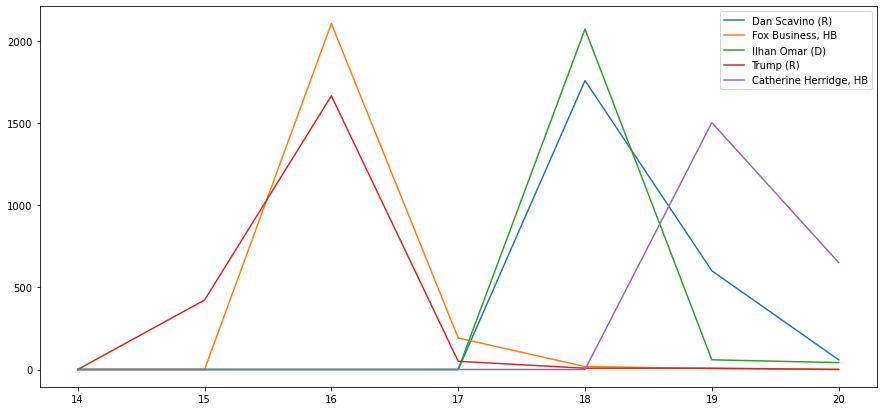

In [335]:
plt.figure(figsize=(15, 7))
for url, _ in sorted_oct_week3_urls_mean_dict[0:5]:
    week_vals = oct_week3_urls_joined_dict[url]
    plt.plot(np.arange(14, 21, 1), week_vals)
    
plt.legend(['Dan Scavino (R)', 'Fox Business, HB', 'Ilhan Omar (D)', 'Trump (R)', 'Catherine Herridge, HB'])
    
plt.show()

1 https://twitter.com/i/web/status/1316397024745488384
2 https://twitter.com/QAnalyst45/status/1315818183190810630/video/1
3 https://twitter.com/i/web/status/1316439344090157058
4 https://twitter.com/i/web/status/1316223349719216128
5 https://twitter.com/faceasshoe/status/1315867313472667648/photo/1


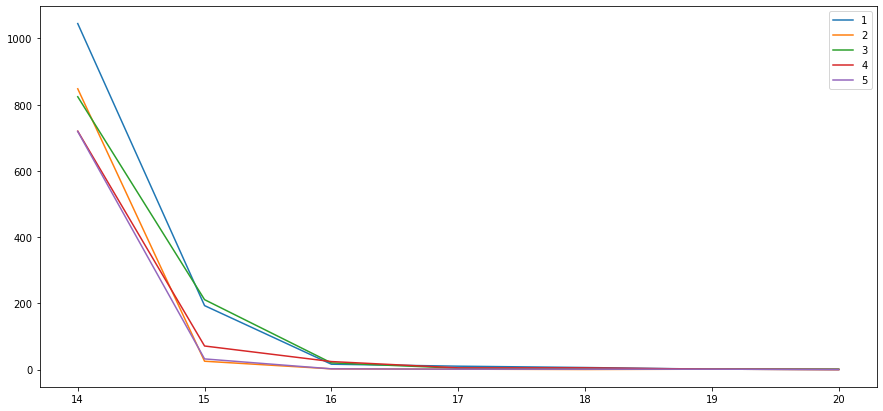

1 https://twitter.com/i/web/status/1316599946469011456
2 https://twitter.com/realDonaldTrump/status/1316789583518953473/video/1
3 https://twitter.com/i/web/status/1316762092263833600
4 https://twitter.com/i/web/status/1316728942523547653
5 https://twitter.com/i/web/status/1316684659087085568


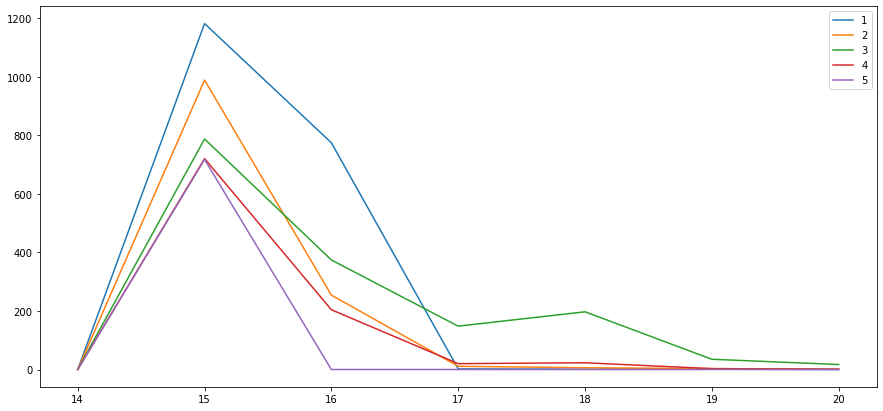

1 http://ow.ly/__CONNECTIONPOOL_ERROR__
2 https://twitter.com/i/web/status/1316961857031327746
3 https://twitter.com/i/web/status/1316842630404280322
4 https://twitter.com/i/web/status/1316986296276013056
5 https://twitter.com/i/web/status/1317188482251608066


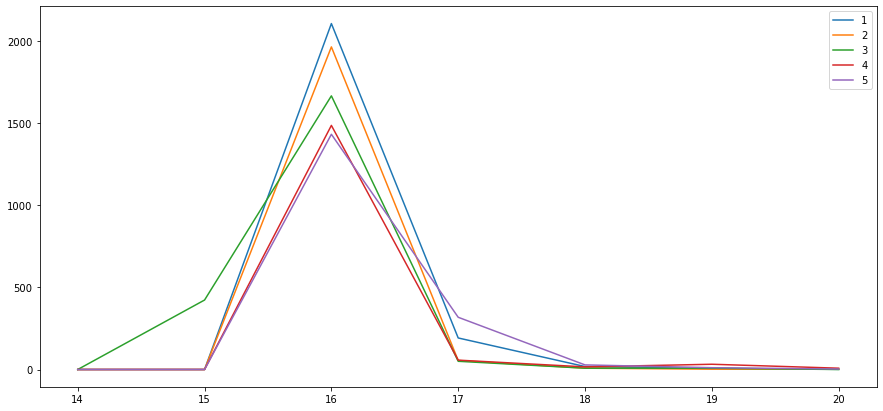

1 https://twitter.com/PopCulture2000s/status/1316893606259675136/photo/1
2 https://twitter.com/i/web/status/1317534671337447424
3 https://twitter.com/i/web/status/1317460178246291462
4 https://twitter.com/i/web/status/1317273232295198722
5 https://twitter.com/i/web/status/1317424144544313349


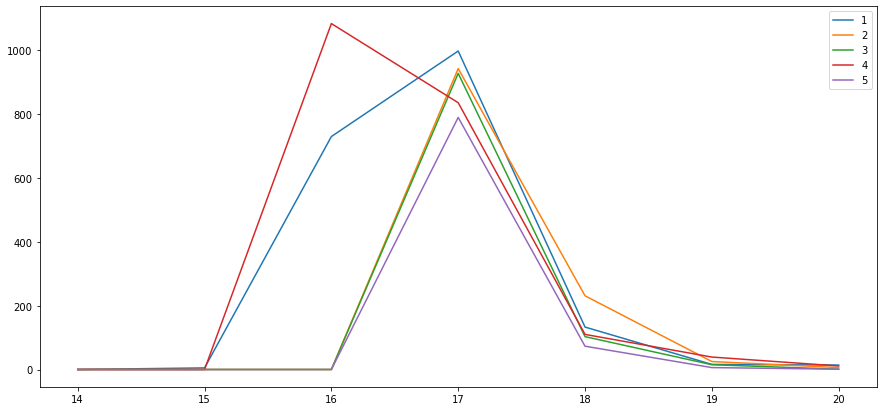

1 https://www.foxbusiness.com/technology/twitter-has-refused-to-unlock-new-york-posts-account
2 https://twitter.com/DanScavino/status/1317936275815452673/video/1
3 https://twitter.com/i/web/status/1317732155213008898
4 https://twitter.com/i/web/status/1317693685002162182
5 https://twitter.com/DanScavino/status/1317637370548727809/video/1


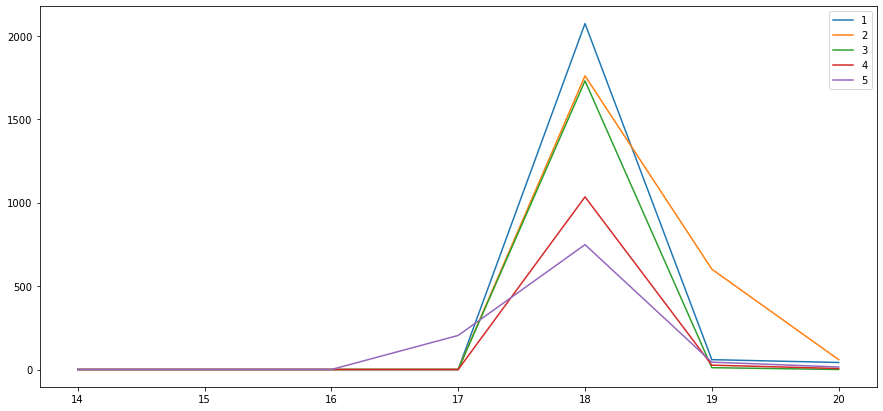

1 https://twitter.com/i/web/status/1318242343850373120
2 https://twitter.com/i/web/status/1318168690093903872
3 https://twitter.com/i/web/status/1318167261744713728
4 https://twitter.com/i/web/status/1318346633747247105
5 https://twitter.com/i/web/status/1318176127261749248


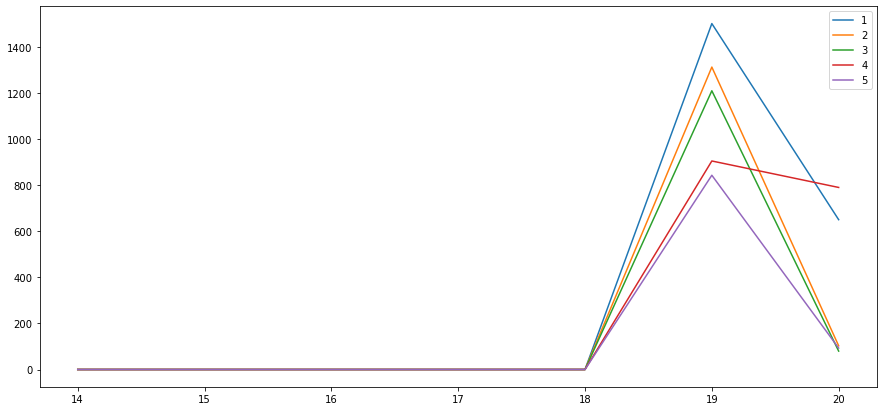

1 https://twitter.com/i/web/status/1318395263271272448
2 https://twitter.com/i/web/status/1318262136016076800
3 https://twitter.com/i/web/status/1318558313093730305
4 https://twitter.com/KirkWrites79/status/1318408454197956610/video/1
5 https://twitter.com/i/web/status/1318346633747247105


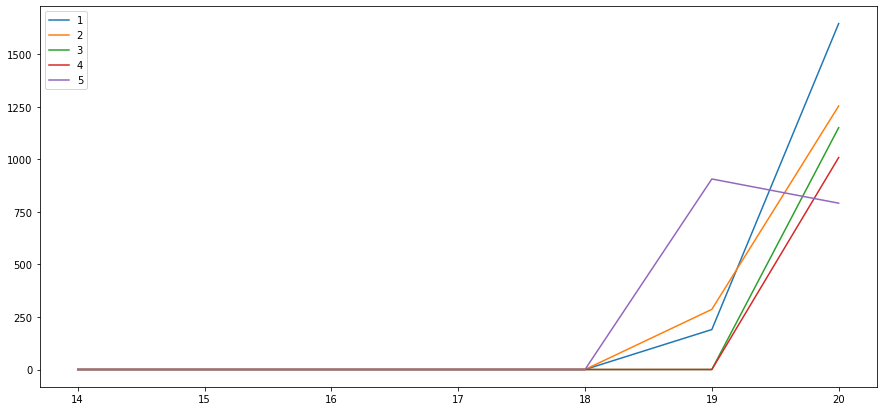

In [342]:
for sorted_lst in url_lsts:
    plt.figure(figsize=(15, 7))
    for i, lst_item in enumerate(sorted_lst[0:5]):
        url = lst_item[0]
        print(i + 1, urlexpander.expand(url))
        week_vals = oct_week3_urls_joined_dict[url]
        plt.plot(np.arange(14, 21, 1), week_vals)
    plt.legend(['1', '2', '3', '4', '5'])
    plt.show()

In [339]:
url_lsts[0][0:5]

[('https://t.co/VNucDVyNKy', 1045),
 ('https://t.co/2bgAdkMFJv', 848),
 ('https://t.co/pC1zAvjYpa', 824),
 ('https://t.co/faDibmXNVW', 720),
 ('https://t.co/pVYvzyULlS', 719)]

In [157]:
from bs4 import BeautifulSoup
import urllib.request, sys, time
import requests
from urllib.request import urlopen

In [159]:
URL = 'https://twitter.com/i/web/status/1315106212543975425'
# page = requests.get(URL)
# soup = BeautifulSoup(page.text,'html.parser')
html = urlopen(URL)
BeautifulSoup(html,'html.parser')

<!DOCTYPE html>

<html dir="ltr" lang="en">
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
<link href="//abs.twimg.com" rel="preconnect"/>
<link href="//api.twitter.com" rel="preconnect"/>
<link href="//pbs.twimg.com" rel="preconnect"/>
<link href="//t.co" rel="preconnect"/>
<link href="//video.twimg.com" rel="preconnect"/>
<link href="//abs.twimg.com" rel="dns-prefetch"/>
<link href="//api.twitter.com" rel="dns-prefetch"/>
<link href="//pbs.twimg.com" rel="dns-prefetch"/>
<link href="//t.co" rel="dns-prefetch"/>
<link href="//video.twimg.com" rel="dns-prefetch"/>
<link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.18e394f5.js" nonce="MWE1MWNkYmItYTA3MC00ZWRhLTg0MzItNWUyZjk2ZTc2ZDY0" rel="preload"/>
<link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/vendors~main.45e01195.js" nonc

In [143]:
tweets_1018[1].retweet.__dict__

{'tweet_id': '1317639012484583425',
 'text': 'Dang. You’re lying to voters &amp; bragging about it on social media now.\nHere’s the truth about your voting record wit… https://t.co/EjBuIpISkB',
 'hashtags': [],
 'mentions': [],
 'user': <thinned_tweet_obj.tweet_user at 0x7fe623150c90>,
 'retweet': '',
 'in_reply': '',
 'quote': None,
 'quote_status': True,
 'favorited': False,
 'favorite_count': 2070}

Retweet depth in our data is maxed out at 1

In [141]:
rt_ids = {}
for thin_obj in tweets_1018:
    while thin_obj.retweet:
        thin_obj = thin_obj.retweet
    
    tweet_id = thin_obj.tweet_id
    if tweet_id in rt_ids:
        rt_ids[tweet_id] += 1
    else:
        rt_ids[tweet_id] = 1
    
rt_popularity = sort_based_on_dict_value(rt_ids)
rt_popularity

[('1317691324171087872', 2072),
 ('1317952428759678976', 1759),
 ('1317732155213008898', 1729),
 ('1317538812428312576', 1077),
 ('1317693685002162182', 1034),
 ('1317938446606819328', 763),
 ('1317637483832770561', 753),
 ('1317637370548727809', 748),
 ('1317936275815452673', 673),
 ('1317919814900277249', 660),
 ('1317918373972307968', 635),
 ('1317937671629492224', 607),
 ('1317858660941443073', 587),
 ('1317762298904301569', 553),
 ('1317872810694385665', 508),
 ('1317696709749886976', 497),
 ('1317856473280618497', 496),
 ('1317645019810025473', 487),
 ('1317504966521688064', 483),
 ('1317907100861911041', 461),
 ('1317604759113707520', 430),
 ('1317643487223992322', 423),
 ('1317631083228385280', 421),
 ('1317819333637189632', 421),
 ('1317629573694181376', 404),
 ('1317597677446680577', 398),
 ('1317936205938479104', 383),
 ('1317861761735942145', 380),
 ('1317534971331006465', 380),
 ('1317656259856719873', 377),
 ('1317822270568599553', 376),
 ('1317806894853943296', 367),
 ('

## Google Trends

In [268]:
from pytrends.request import TrendReq
import pandas as pd
import time
import matplotlib
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

In [270]:
pytrend.build_payload(kw_list=keywords, cat=0, timeframe='2020-10-01 2020-10-18', geo='US')
data = pytrend.interest_over_time()

<AxesSubplot:xlabel='date'>

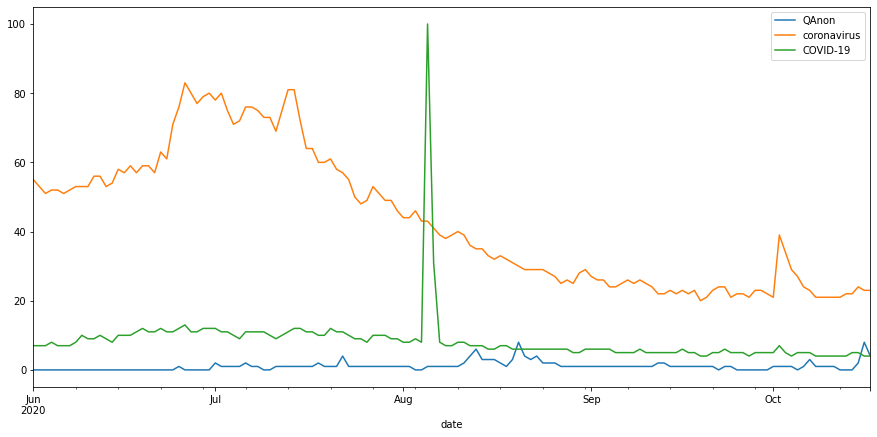

In [172]:
keywords = ['QAnon', 'coronavirus', 'COVID-19']
pytrend.build_payload(kw_list=keywords, cat=0, timeframe='2020-06-01 2020-10-18', geo='US')
data = pytrend.interest_over_time()
data = data.drop(labels=['isPartial'],axis='columns')

data.plot(figsize=(15, 7))

In [200]:
def get_word_counter_rate(obj_lst):
    word_counter = {'qanon' : 0, 'coronavirus' : 0, 'covid' : 0, 'biden' : 0, 'trump' : 0}
    for thin_obj in obj_lst:
        while thin_obj.retweet:
            thin_obj = thin_obj.retweet
            
        tweet_text = thin_obj.text.lower()
        for word in word_counter:
            if word in tweet_text:
                word_counter[word] += 1
                
    for word in word_counter:
        word_counter[word] = word_counter[word] / len(obj_lst)
        
    return word_counter

In [187]:
df = pd.DataFrame.from_dict(word_counter, orient='index').T
word_counter2 = {'qanon' : 10, 'coronavirus' : 10, 'covid' : 10, 'biden' : 10, 'trump' : 10}
df.append(word_counter2, ignore_index=True)

,qanon,coronavirus,covid,biden,trump
0,0,0,0,0,0
1,10,10,10,10,10


In [196]:
file_objs_lst[0:18].reverse()

{'qanon': 0.0010258620689655173,
 'coronavirus': 0.013568965517241379,
 'covid': 0.021482758620689654,
 'biden': 0.07123275862068966,
 'trump': 0.15712931034482758}

TODO - write a function to reverse the file objs list

In [210]:
# Look at October's trends so far for the same words being compared with Google Trends
word_counter = {'qanon' : 0, 'coronavirus' : 0, 'covid' : 0, 'biden' : 0, 'trump' : 0}
oct_word_data = pd.DataFrame.from_dict(word_counter, orient='index').T
october_files = file_objs_lst[0:18]
october_files.reverse()
for i, file_obj in enumerate(october_files):
    tweets = gdrive_quickstart.download_pkl_file(DRIVE, file_obj, print_status=False)
    wc = get_word_counter_rate(tweets)
    
    if i == 0:
        oct_word_data = pd.DataFrame.from_dict(wc, orient='index').T
    else:
        oct_word_data = oct_word_data.append(wc, ignore_index=True)

In [237]:
oct_word_data

,qanon,coronavirus,covid,biden,trump
0,0.000571,0.003077,0.009879,0.058238,0.154974
1,0.003637,0.018107,0.061011,0.044063,0.224856
2,0.002120,0.023654,0.062784,0.045040,0.213070
3,0.001329,0.017207,0.053712,0.045919,0.208471
4,0.000928,0.016792,0.059893,0.048412,0.206097
5,0.001556,0.019894,0.048672,0.058318,0.196344
6,0.001708,0.016199,0.027410,0.069872,0.209417
7,0.000883,0.012276,0.021746,0.074403,0.176927
8,0.001460,0.014102,0.025352,0.054200,0.183349
9,0.000994,0.013275,0.025990,0.080107,0.173243


In [278]:
def rescale(df):
    max_val = max(df.max())
    return 100 * (df / max_val)


def plot_columns(columns, df):
    df = rescale(df[columns])
    df.plot(figsize=(15, 7), ylim=(0, 100), title="Twitter Trends")
    plt.show()

    
def plot_trends(columns, df):
    '''
    columns: list of strings that are keywords / column names
    '''
    # Twitter trends
    plot_columns(columns, df)
    # Google trends
    pytrend.build_payload(kw_list=columns, cat=0, timeframe='2020-10-01 2020-10-18', geo='US')
    data = pytrend.interest_over_time()
    data = data.drop(labels=['isPartial'],axis='columns')

    data.plot(figsize=(15, 7), ylim=(0, 100), title="Google Trends")
    plt.show()

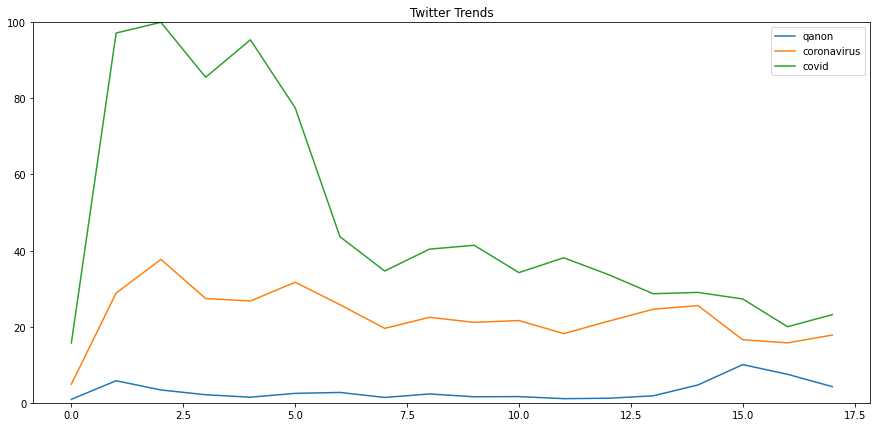

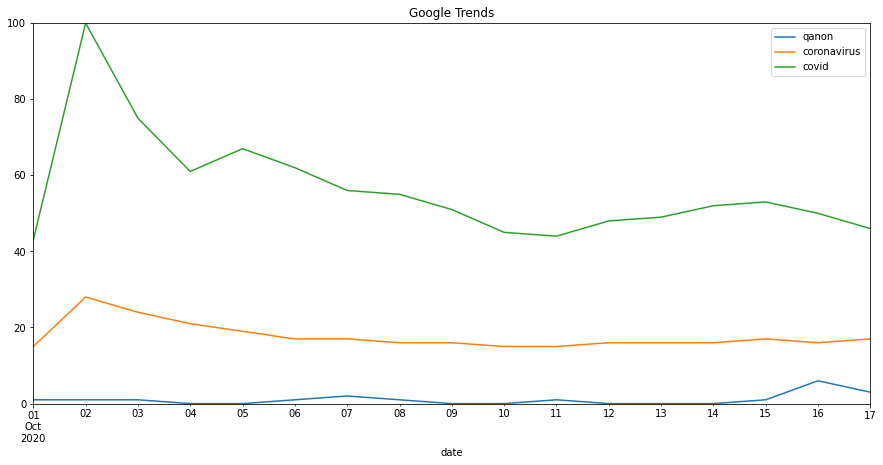

In [279]:
plot_trends(['qanon', 'coronavirus', 'covid'], oct_word_data)

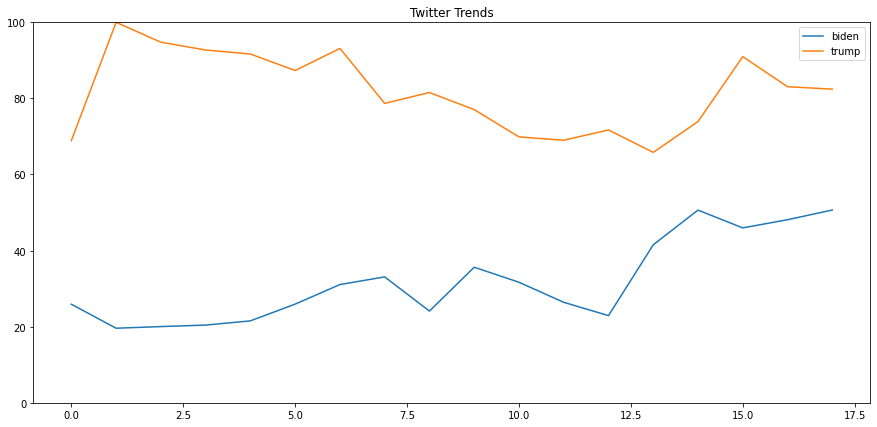

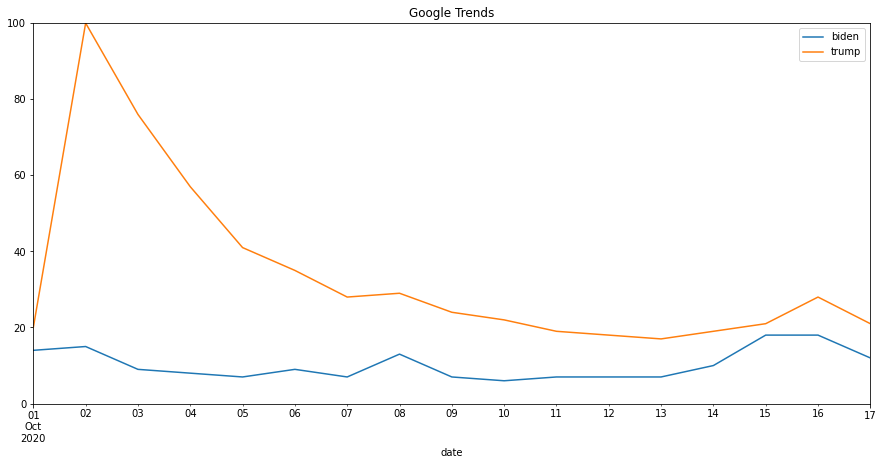

In [280]:
plot_trends(['biden', 'trump'], oct_word_data)

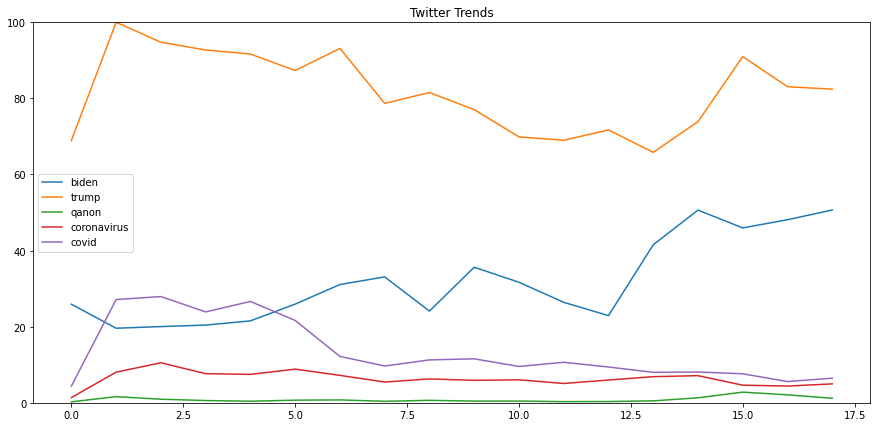

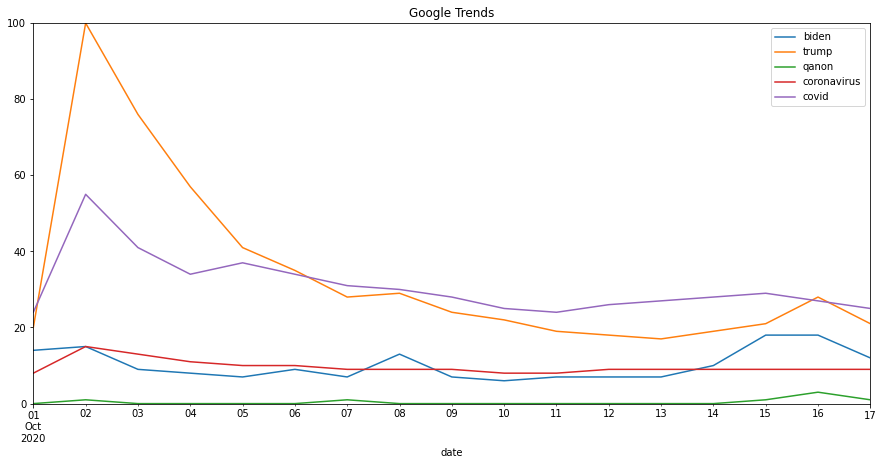

In [281]:
plot_trends(['biden', 'trump', 'qanon', 'coronavirus', 'covid'], oct_word_data)

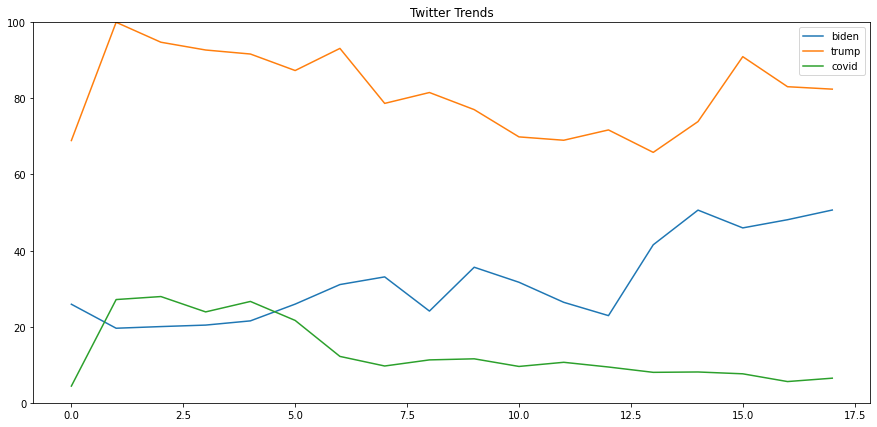

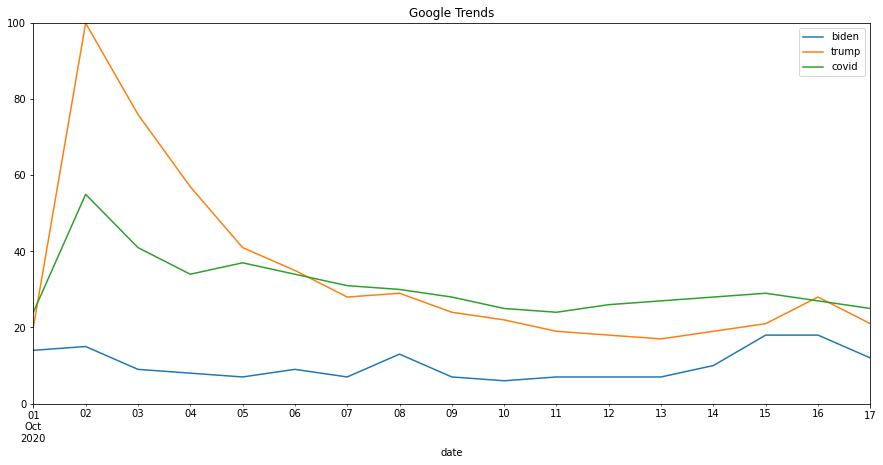

In [282]:
plot_trends(['biden', 'trump', 'covid'], oct_word_data)